# 1. Introduction

# Libraries and Data importation

In [3]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Import full dataframe
df = pd.read_parquet(r"C:\Users\mirko\Desktop\Curso Data Science DL\EDAHospDischarges_Chile2001-2024\data\processed\Discharges_2001-2024_bivariate_final.parquet")

# 2. Data Overview

In [6]:
# Shape of the dataset (rows, columns).

In [7]:
df.head()

sex     age health insurance healthcare facility type  \
0  Male   60-69           Fonasa                  Private   
1  Male   70-79           Fonasa                   Public   
2  Male   70-79           Fonasa                   Public   
3  Male     1-9           Fonasa                   Public   
4  Male  80-120           Fonasa                   Public   

                        healthcare facility name  length of stay  \
0                                Clínica Familia               2   
1  Hospital Del Salvador (Santiago, Providencia)              58   
2  Hospital Del Salvador (Santiago, Providencia)              12   
3   Instituto de Neurocirugía Dr. Alfonso Asenjo               1   
4     Hospital Dr. Leonardo Guzmán (Antofagasta)               7   

  discharge condition primary diagnosis code  \
0            Deceased                   C780   
1            Deceased                   E145   
2            Deceased                   J189   
3            Deceased                   S065   
4               Alive                   K830   

                              primary diagnosis name  year chapter codes  \
0                tumor maligno secundario del pulmon  2001       C00-D48   
1  diabetes mellitus no especificada, con complic...  2001       E00-E90   
2                          neumonia, no especificada  2001       J00-J99   
3                     hemorragia subdural traumatica  2001       S00-T98   
4                                         colangitis  2001       K00-K93   

                                       chapter names  LOS_capped group codes  \
0                               tumores [neoplasias]           2     C76-C80   
1  enfermedades endocrinas, nutricionales y metab...          58     E10-E14   
2              enfermedades del sistema respiratorio          12     J09-J18   
3  traumatismos, envenenamientos y algunas otras ...           1     S00-S09   
4                 enfermedades del sistema digestivo           7     K80-K87   

                                         group names  
0  tumores [neoplasias] malignos de sitios mal de...  
1                                  diabetes mellitus  
2                       influenza [gripe] y neumonía  
3                          traumatismos de la cabeza  
4  trastornos de la vesícula biliar, de las vías ...

In [8]:
df.shape

(25758741, 15)

# Data dictionary / main variables (categorical, numerical).

In [10]:
# Data type customization really helped to reduce memory usage, increasing speed and capacity to create new columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25758741 entries, 0 to 25758740
Data columns (total 15 columns):
 #   Column                    Dtype   
---  ------                    -----   
 0   sex                       category
 1   age                       category
 2   health insurance          category
 3   healthcare facility type  category
 4   healthcare facility name  object  
 5   length of stay            int32   
 6   discharge condition       category
 7   primary diagnosis code    category
 8   primary diagnosis name    category
 9   year                      int32   
 10  chapter codes             category
 11  chapter names             object  
 12  LOS_capped                int32   
 13  group codes               category
 14  group names               category
dtypes: category(10), int32(3), object(2)
memory usage: 1.0+ GB


# ACTUALIZAR VARIABLES

# Missing values / NA treatment summary.

In [13]:
# Dataframe is cleaned from previous steps
df.isna().sum()

sex                         0
age                         0
health insurance            0
healthcare facility type    0
healthcare facility name    0
length of stay              0
discharge condition         0
primary diagnosis code      0
primary diagnosis name      0
year                        0
chapter codes               0
chapter names               0
LOS_capped                  0
group codes                 0
group names                 0
dtype: int64

# First impressions after bivariate analysis (anything noteworthy?). HACERLO

# List of pairs of variables to perform bivariate analysis (CHECK CHAT GPT CONVERSATION TO HAVE MORE GUIDANCE). POR HACER

# 3. Multivariate analysis (RECUERDA SIEMPRE RELACIONAR CON PREGUNTAS GUIA)

# 2. Purpose / Guiding Question


# 3. Exploratory Multivariate Visualization (Descriptive Level)

# 5. Insights and Synthesis

# Structure

# Estructura opción 2:

# 1. Group 1: [Diagnosis] x [Age] x [Sex] x [Insurance]

# 1. Objective & Variables

# 2. Descriptive Overview (Base Tables)

In [25]:
# Count diagnoses
diagnosis_counts = df['group names'].value_counts()

# Select top 15
top15_diagnoses = diagnosis_counts.head(15).index.tolist()

# Create a copy of the column
diag_grouped = df['group names'].copy()

# Convert to categorical if not already
diag_grouped = diag_grouped.astype('category')

# Add 'Other' as a category
if 'Other' not in diag_grouped.cat.categories:
    diag_grouped = diag_grouped.cat.add_categories('Other')

# Replace all diagnoses not in top 15 with 'Other'
diag_grouped = diag_grouped.where(diag_grouped.isin(top15_diagnoses), 'Other')

# Optional: attach it back to the dataframe
df['Diagnosis_grouped'] = diag_grouped

# Check the result
df['Diagnosis_grouped'].value_counts().head(16)


Diagnosis_grouped
Other                                                                    15817408
trastornos de la vesícula biliar, de las vías biliares y del páncreas     1508792
influenza [gripe] y neumonía                                              1302182
enfermedades del apéndice                                                  810863
otras formas de enfermedad del corazón                                     687480
hernia                                                                     647833
otras enfermedades de las vías respiratorias superiores                    611966
enfermedades cerebrovasculares                                             563953
trastornos no inflamatorios de los órganos genitales femeninos             549860
enfermedades de los órganos genitales masculinos                           516349
enfermedades isquémicas del corazón                                        504071
tumores [neoplasias] benignos                                              48774

In [26]:
df['Diagnosis_grouped'].value_counts().head(16).sum()

25758741

In [27]:
# Total proportion of top 15 most frequent diagnoses is 38.59%
100-(15817408*100/25758741)

38.59401746381937

In [28]:
# Counts

In [29]:
ct_g_1 = pd.crosstab(index=[df['age'], df['sex'], df["health insurance"]], columns=df['Diagnosis_grouped'])

In [30]:
ct_g_1

Diagnosis_grouped               enfermedades cerebrovasculares  \
age    sex    health insurance                                   
0-1    Male   Fonasa                                       377   
              Isapre                                        95   
       Female Fonasa                                       194   
              Isapre                                        58   
1-9    Male   Fonasa                                       688   
              Isapre                                       112   
       Female Fonasa                                       433   
              Isapre                                       104   
10-19  Male   Fonasa                                      1443   
              Isapre                                       281   
       Female Fonasa                                       964   
              Isapre                                       242   
20-29  Male   Fonasa                                      2633   
              Isapre                                       769   
       Female Fonasa                                      2667   
              Isapre                                       790   
30-39  Male   Fonasa                                      6179   
              Isapre                                      1970   
       Female Fonasa                                      6268   
              Isapre                                      2065   
40-49  Male   Fonasa                                     18148   
              Isapre                                      3522   
       Female Fonasa                                     16795   
              Isapre                                      3305   
50-59  Male   Fonasa                                     44794   
              Isapre                                      5742   
       Female Fonasa                                     30132   
              Isapre                                      4027   
60-69  Male   Fonasa                                     76752   
              Isapre                                      6772   
       Female Fonasa                                     45486   
              Isapre                                      3789   
70-79  Male   Fonasa                                     82152   
              Isapre                                      5452   
       Female Fonasa                                     61067   
              Isapre                                      3373   
80-120 Male   Fonasa                                     51655   
              Isapre                                      3518   
       Female Fonasa                                     65575   
              Isapre                                      3565   

Diagnosis_grouped               enfermedades crónicas de las vías respiratorias inferiores   \
age    sex    health insurance                                                                
0-1    Male   Fonasa                                                        35779             
              Isapre                                                         2133             
       Female Fonasa                                                        17880             
              Isapre                                                         1060             
1-9    Male   Fonasa                                                        35329             
              Isapre                                                         5893             
       Female Fonasa                                                        22960             
              Isapre                                                         3640             
10-19  Male   Fonasa                                                         8688             
              Isapre                                                         1829             
       Female Fonasa                                                         6636      

In [31]:
# Proportions

In [32]:
# Proportions with "other" included
ct_g_1_norm = pd.crosstab(index=[df['age'], df['sex'], df["health insurance"]], columns=df['Diagnosis_grouped'], normalize = 'index')

In [33]:
ct_g_1_norm.index = [
    f"{sex} | {insurance} | {age}" 
    for sex, insurance, age in ct_g_1_norm.index
]


In [34]:
ct_g_1_norm

Diagnosis_grouped         enfermedades cerebrovasculares  \
0-1 | Male | Fonasa                             0.000336   
0-1 | Male | Isapre                             0.000589   
0-1 | Female | Fonasa                           0.000254   
0-1 | Female | Isapre                           0.000515   
1-9 | Male | Fonasa                             0.000662   
1-9 | Male | Isapre                             0.000415   
1-9 | Female | Fonasa                           0.000657   
1-9 | Female | Isapre                           0.000654   
10-19 | Male | Fonasa                           0.001687   
10-19 | Male | Isapre                           0.001277   
10-19 | Female | Fonasa                         0.001403   
10-19 | Female | Isapre                         0.001414   
20-29 | Male | Fonasa                           0.003476   
20-29 | Male | Isapre                           0.002593   
20-29 | Female | Fonasa                         0.003420   
20-29 | Female | Isapre                         0.003134   
30-39 | Male | Fonasa                           0.007643   
30-39 | Male | Isapre                           0.004719   
30-39 | Female | Fonasa                         0.006141   
30-39 | Female | Isapre                         0.005011   
40-49 | Male | Fonasa                           0.018521   
40-49 | Male | Isapre                           0.008720   
40-49 | Female | Fonasa                         0.012906   
40-49 | Female | Isapre                         0.007363   
50-59 | Male | Fonasa                           0.035206   
50-59 | Male | Isapre                           0.015585   
50-59 | Female | Fonasa                         0.023236   
50-59 | Female | Isapre                         0.010973   
60-69 | Male | Fonasa                           0.049871   
60-69 | Male | Isapre                           0.022328   
60-69 | Female | Fonasa                         0.034575   
60-69 | Female | Isapre                         0.015649   
70-79 | Male | Fonasa                           0.058892   
70-79 | Male | Isapre                           0.031857   
70-79 | Female | Fonasa                         0.049295   
70-79 | Female | Isapre                         0.025317   
80-120 | Male | Fonasa                          0.062327   
80-120 | Male | Isapre                          0.042820   
80-120 | Female | Fonasa                        0.063752   
80-120 | Female | Isapre                        0.045456   

Diagnosis_grouped         enfermedades crónicas de las vías respiratorias inferiores   \
0-1 | Male | Fonasa                                                0.031906             
0-1 | Male | Isapre                                                0.013216             
0-1 | Female | Fonasa                                              0.023415             
0-1 | Female | Isapre                                              0.009416             
1-9 | Male | Fonasa                                                0.034001             
1-9 | Male | Isapre                                                0.021855             
1-9 | Female | Fonasa                                              0.034818             
1-9 | Female | Isapre                                              0.022885             
10-19 | Male | Fonasa                                              0.010158             
10-19 | Male | Isapre                                              0.008314             
10-19 | Female | Fonasa                                            0.009661             
10-19 | Female | Isapre                                            0.007839             
20-29 | Male | Fonasa                                              0.003556             
20-29 | Male | Isapre                                              0.001946             
20-29 | Female | Fonasa                                            0.005330             
20-29 | Female | Isapre                                            0.003082             
30-39 | Male | Fonasa     

In [35]:
# Drop 'Other' column before normalizing
crosstab_top15_g1 = ct_g_1.drop(columns='Other')

# Normalize by row (proportions within top 15)
crosstab_top15_g1 = crosstab_top15_g1.div(crosstab_top15_g1.sum(axis=1), axis=0)

# Flatten MultiIndex for plotting
crosstab_top15_g1.index = [
    f"{sex} | {insurance} | {age}" 
    for sex, insurance, age in crosstab_top15_g1.index]

In [36]:
crosstab_top15_g1

Diagnosis_grouped         enfermedades cerebrovasculares  \
0-1 | Male | Fonasa                             0.001162   
0-1 | Male | Isapre                             0.002179   
0-1 | Female | Fonasa                           0.001011   
0-1 | Female | Isapre                           0.002218   
1-9 | Male | Fonasa                             0.001336   
1-9 | Male | Isapre                             0.000715   
1-9 | Female | Fonasa                           0.001440   
1-9 | Female | Isapre                           0.001284   
10-19 | Male | Fonasa                           0.004530   
10-19 | Male | Isapre                           0.003140   
10-19 | Female | Fonasa                         0.004216   
10-19 | Female | Isapre                         0.003803   
20-29 | Male | Fonasa                           0.011842   
20-29 | Male | Isapre                           0.007789   
20-29 | Female | Fonasa                         0.009201   
20-29 | Female | Isapre                         0.008139   
30-39 | Male | Fonasa                           0.024770   
30-39 | Male | Isapre                           0.014304   
30-39 | Female | Fonasa                         0.015554   
30-39 | Female | Isapre                         0.012603   
40-49 | Male | Fonasa                           0.053976   
40-49 | Male | Isapre                           0.026058   
40-49 | Female | Fonasa                         0.029003   
40-49 | Female | Isapre                         0.018670   
50-59 | Male | Fonasa                           0.092060   
50-59 | Male | Isapre                           0.042896   
50-59 | Female | Fonasa                         0.060321   
50-59 | Female | Isapre                         0.034681   
60-69 | Male | Fonasa                           0.117780   
60-69 | Male | Isapre                           0.058397   
60-69 | Female | Fonasa                         0.091713   
60-69 | Female | Isapre                         0.055063   
70-79 | Male | Fonasa                           0.129708   
70-79 | Male | Isapre                           0.082337   
70-79 | Female | Fonasa                         0.123991   
70-79 | Female | Isapre                         0.085707   
80-120 | Male | Fonasa                          0.128810   
80-120 | Male | Isapre                          0.105926   
80-120 | Female | Fonasa                        0.145685   
80-120 | Female | Isapre                        0.127108   

Diagnosis_grouped         enfermedades crónicas de las vías respiratorias inferiores   \
0-1 | Male | Fonasa                                                0.110292             
0-1 | Male | Isapre                                                0.048934             
0-1 | Female | Fonasa                                              0.093157             
0-1 | Female | Isapre                                              0.040537             
1-9 | Male | Fonasa                                                0.068626             
1-9 | Male | Isapre                                                0.037630             
1-9 | Female | Fonasa                                              0.076336             
1-9 | Female | Isapre                                              0.044934             
10-19 | Male | Fonasa                                              0.027277             
10-19 | Male | Isapre                                              0.020438             
10-19 | Female | Fonasa                                            0.029025             
10-19 | Female | Isapre                                            0.021088             
20-29 | Male | Fonasa                                              0.012116             
20-29 | Male | Isapre                                              0.005844             
20-29 | Female | Fonasa                                            0.014341             
20-29 | Female | Isapre                                            0.008005             
30-39 | Male | Fonasa     

# Summary stats for numeric variables by categories (mean, median, count, IQR).

Variables are all categorical in this case

# 3. Visual Exploration (Core Plots)

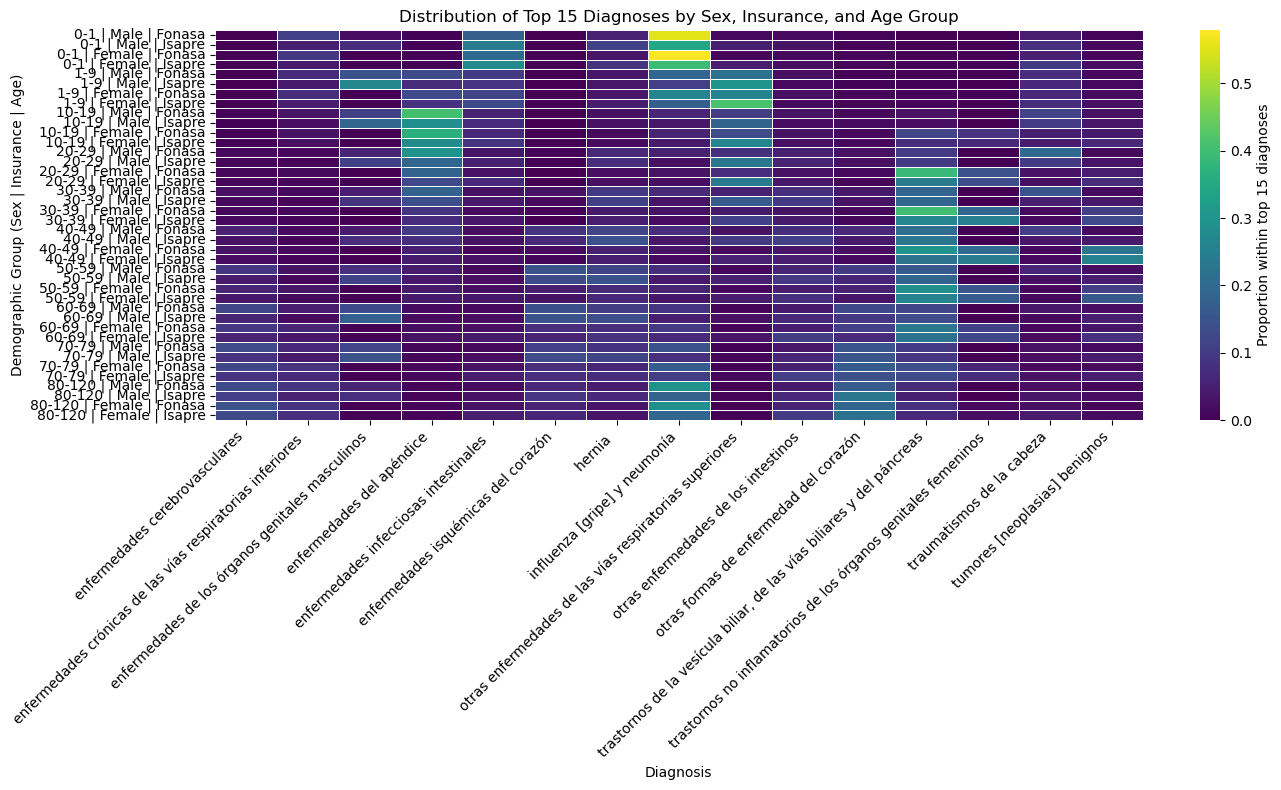

In [39]:

# 5️⃣ Plot the heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(
    crosstab_top15_g1, 
    cmap='viridis', 
    linewidths=0.5,
    cbar_kws={'label': 'Proportion within top 15 diagnoses'}
)
plt.title('Distribution of Top 15 Diagnoses by Sex, Insurance, and Age Group')
plt.xlabel('Diagnosis')
plt.ylabel('Demographic Group (Sex | Insurance | Age)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [40]:
crosstab_top15_g1.reset_index()

Diagnosis_grouped                     index  enfermedades cerebrovasculares  \
0                       0-1 | Male | Fonasa                        0.001162   
1                       0-1 | Male | Isapre                        0.002179   
2                     0-1 | Female | Fonasa                        0.001011   
3                     0-1 | Female | Isapre                        0.002218   
4                       1-9 | Male | Fonasa                        0.001336   
5                       1-9 | Male | Isapre                        0.000715   
6                     1-9 | Female | Fonasa                        0.001440   
7                     1-9 | Female | Isapre                        0.001284   
8                     10-19 | Male | Fonasa                        0.004530   
9                     10-19 | Male | Isapre                        0.003140   
10                  10-19 | Female | Fonasa                        0.004216   
11                  10-19 | Female | Isapre                        0.003803   
12                    20-29 | Male | Fonasa                        0.011842   
13                    20-29 | Male | Isapre                        0.007789   
14                  20-29 | Female | Fonasa                        0.009201   
15                  20-29 | Female | Isapre                        0.008139   
16                    30-39 | Male | Fonasa                        0.024770   
17                    30-39 | Male | Isapre                        0.014304   
18                  30-39 | Female | Fonasa                        0.015554   
19                  30-39 | Female | Isapre                        0.012603   
20                    40-49 | Male | Fonasa                        0.053976   
21                    40-49 | Male | Isapre                        0.026058   
22                  40-49 | Female | Fonasa                        0.029003   
23                  40-49 | Female | Isapre                        0.018670   
24                    50-59 | Male | Fonasa                        0.092060   
25                    50-59 | Male | Isapre                        0.042896   
26                  50-59 | Female | Fonasa                        0.060321   
27                  50-59 | Female | Isapre                        0.034681   
28                    60-69 | Male | Fonasa                        0.117780   
29                    60-69 | Male | Isapre                        0.058397   
30                  60-69 | Female | Fonasa                        0.091713   
31                  60-69 | Female | Isapre                        0.055063   
32                    70-79 | Male | Fonasa                        0.129708   
33                    70-79 | Male | Isapre                        0.082337   
34                  70-79 | Female | Fonasa                        0.123991   
35                  70-79 | Female | Isapre                        0.085707   
36                   80-120 | Male | Fonasa                        0.128810   
37                   80-120 | Male | Isapre                        0.105926   
38                 80-120 | Female | Fonasa                        0.145685   
39                 80-120 | Female | Isapre                        0.127108   

Diagnosis_grouped  enfermedades crónicas de las vías respiratorias inferiores   \
0                                                           0.110292             
1                                                           0.048934             
2                                                           0.093157             
3                                                           0.040537             
4                                                           0.068626             
5                                                           0.037630             
6                                                           0.076336             
7                                                           0.044934             
8                     

In [41]:
df_reset_g1 = crosstab_top15_g1.reset_index().rename(columns={'index': 'demographic'})

In [42]:
# split the single demographic string into 3 columns
df_reset_g1[['age', 'sex', 'health insurance']] = (
    df_reset_g1['demographic']
    .str.split(r'\s*\|\s*', expand=True)   # splits on " | " allowing variable spaces
)

In [43]:
# now melt, using the new columns as id_vars
long_df_g1 = df_reset_g1.drop(columns=['demographic']).melt(
    id_vars=['age', 'sex', 'health insurance'],
    var_name='Diagnosis_grouped',
    value_name='proportion'
)

In [44]:
long_df_g1

age     sex health insurance               Diagnosis_grouped  \
0       0-1    Male           Fonasa  enfermedades cerebrovasculares   
1       0-1    Male           Isapre  enfermedades cerebrovasculares   
2       0-1  Female           Fonasa  enfermedades cerebrovasculares   
3       0-1  Female           Isapre  enfermedades cerebrovasculares   
4       1-9    Male           Fonasa  enfermedades cerebrovasculares   
..      ...     ...              ...                             ...   
595   70-79  Female           Isapre   tumores [neoplasias] benignos   
596  80-120    Male           Fonasa   tumores [neoplasias] benignos   
597  80-120    Male           Isapre   tumores [neoplasias] benignos   
598  80-120  Female           Fonasa   tumores [neoplasias] benignos   
599  80-120  Female           Isapre   tumores [neoplasias] benignos   

     proportion  
0      0.001162  
1      0.002179  
2      0.001011  
3      0.002218  
4      0.001336  
..          ...  
595    0.047618  
596    0.008708  
597    0.019330  
598    0.005361  
599    0.016080  

[600 rows x 5 columns]

In [45]:
# With sex

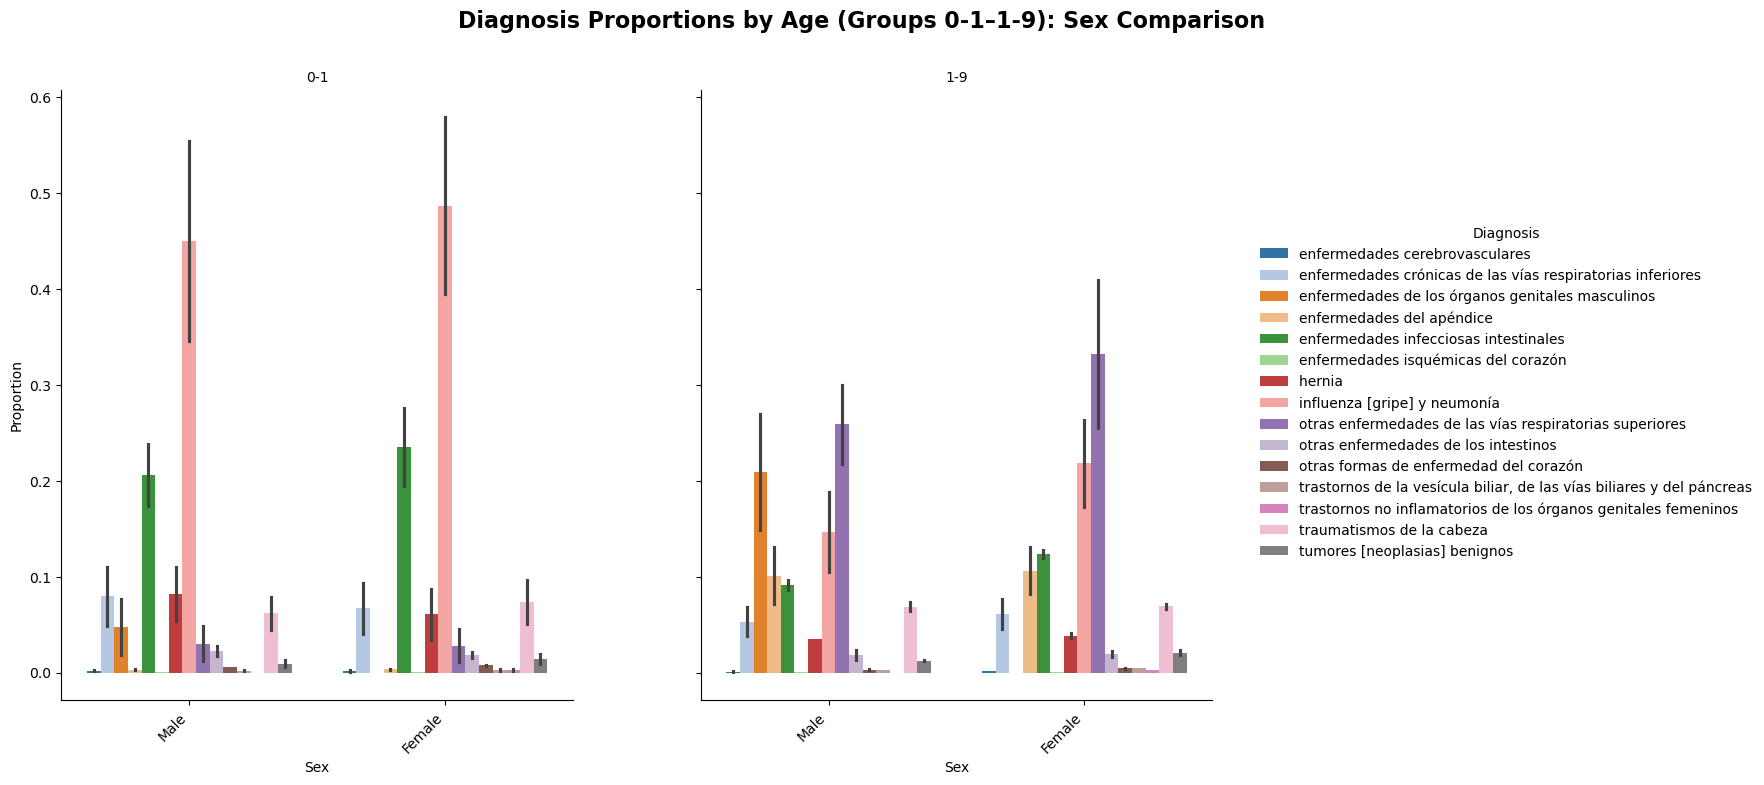

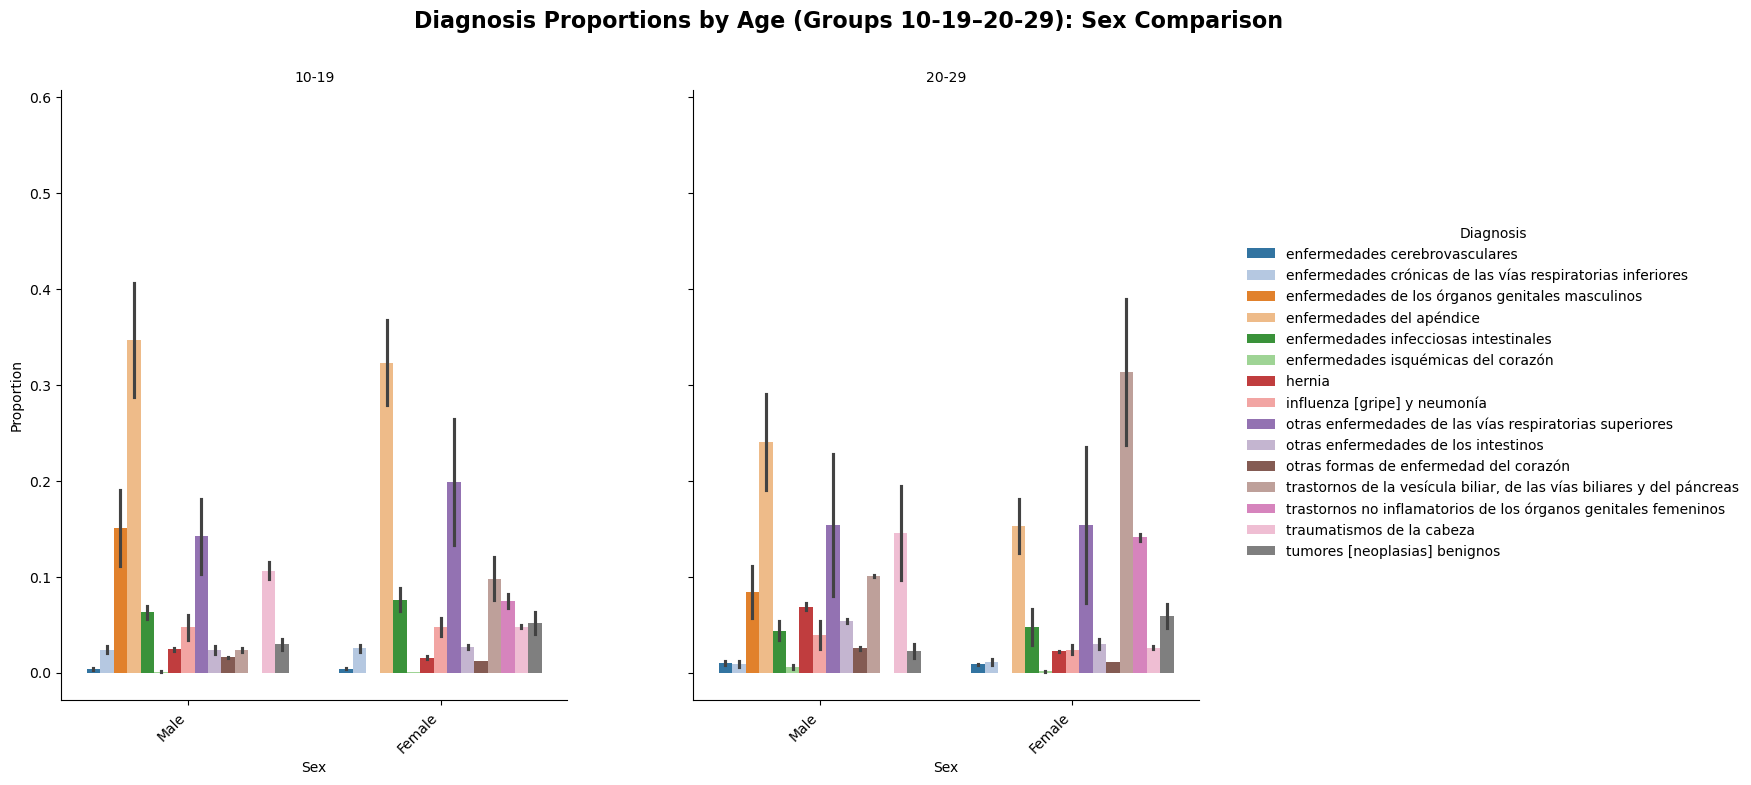

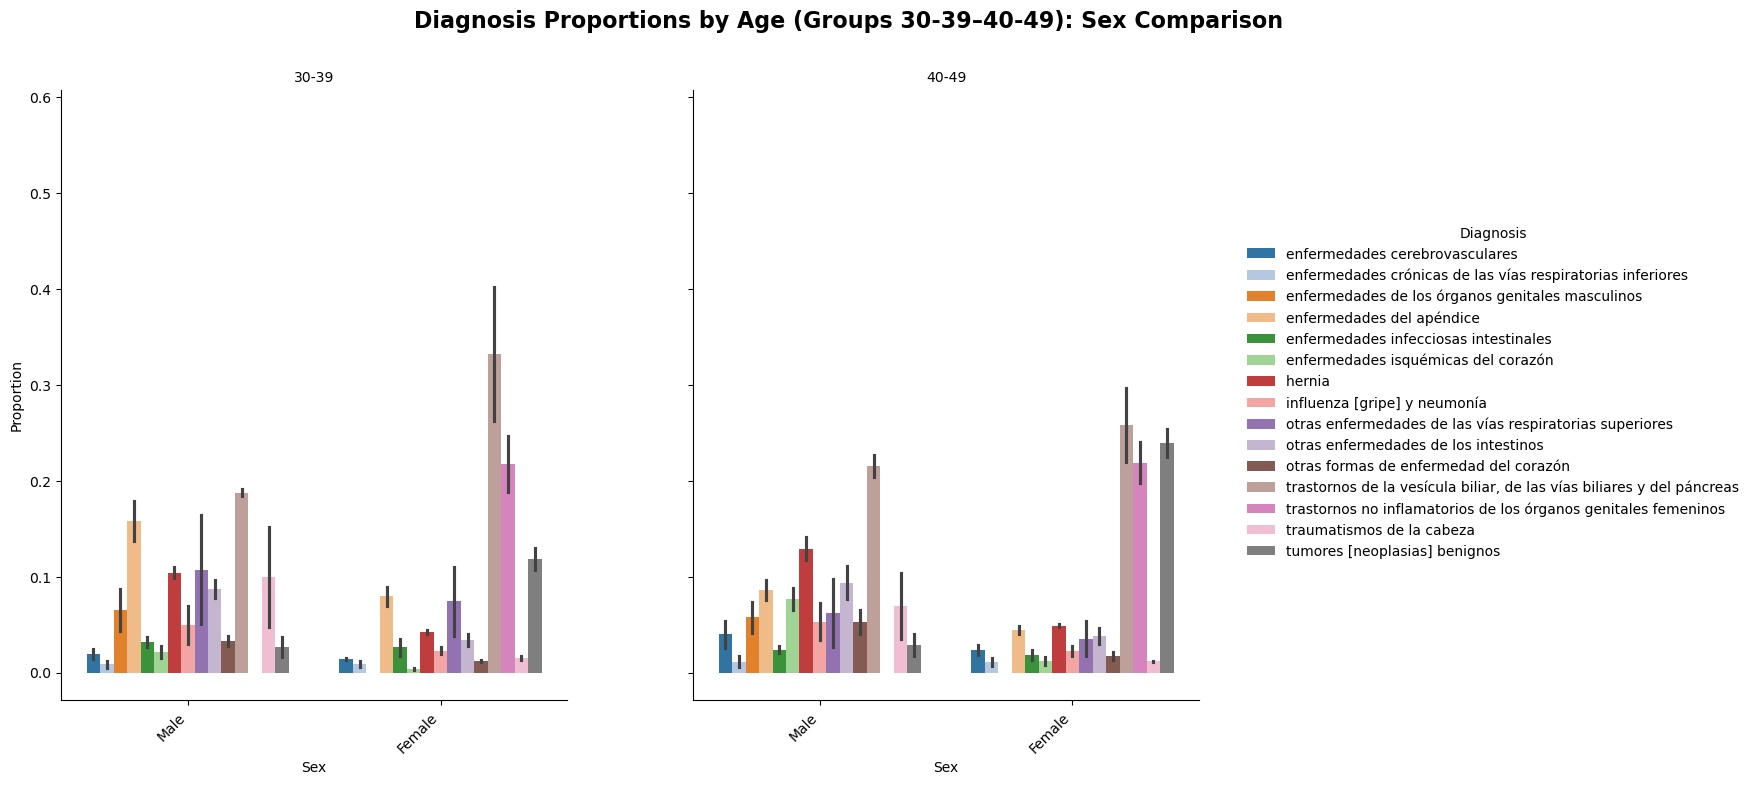

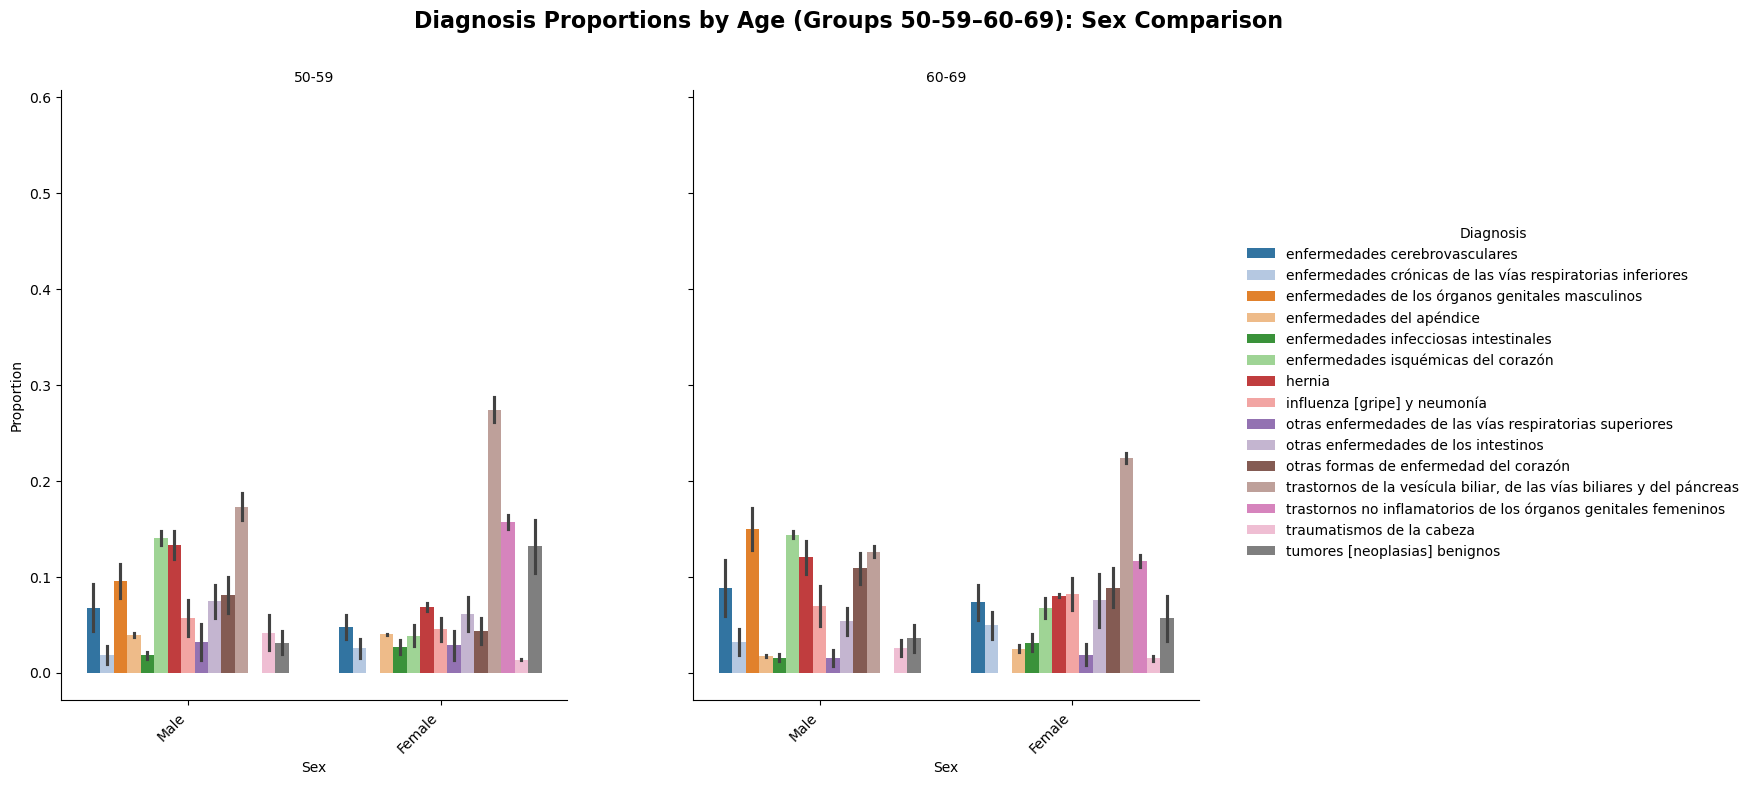

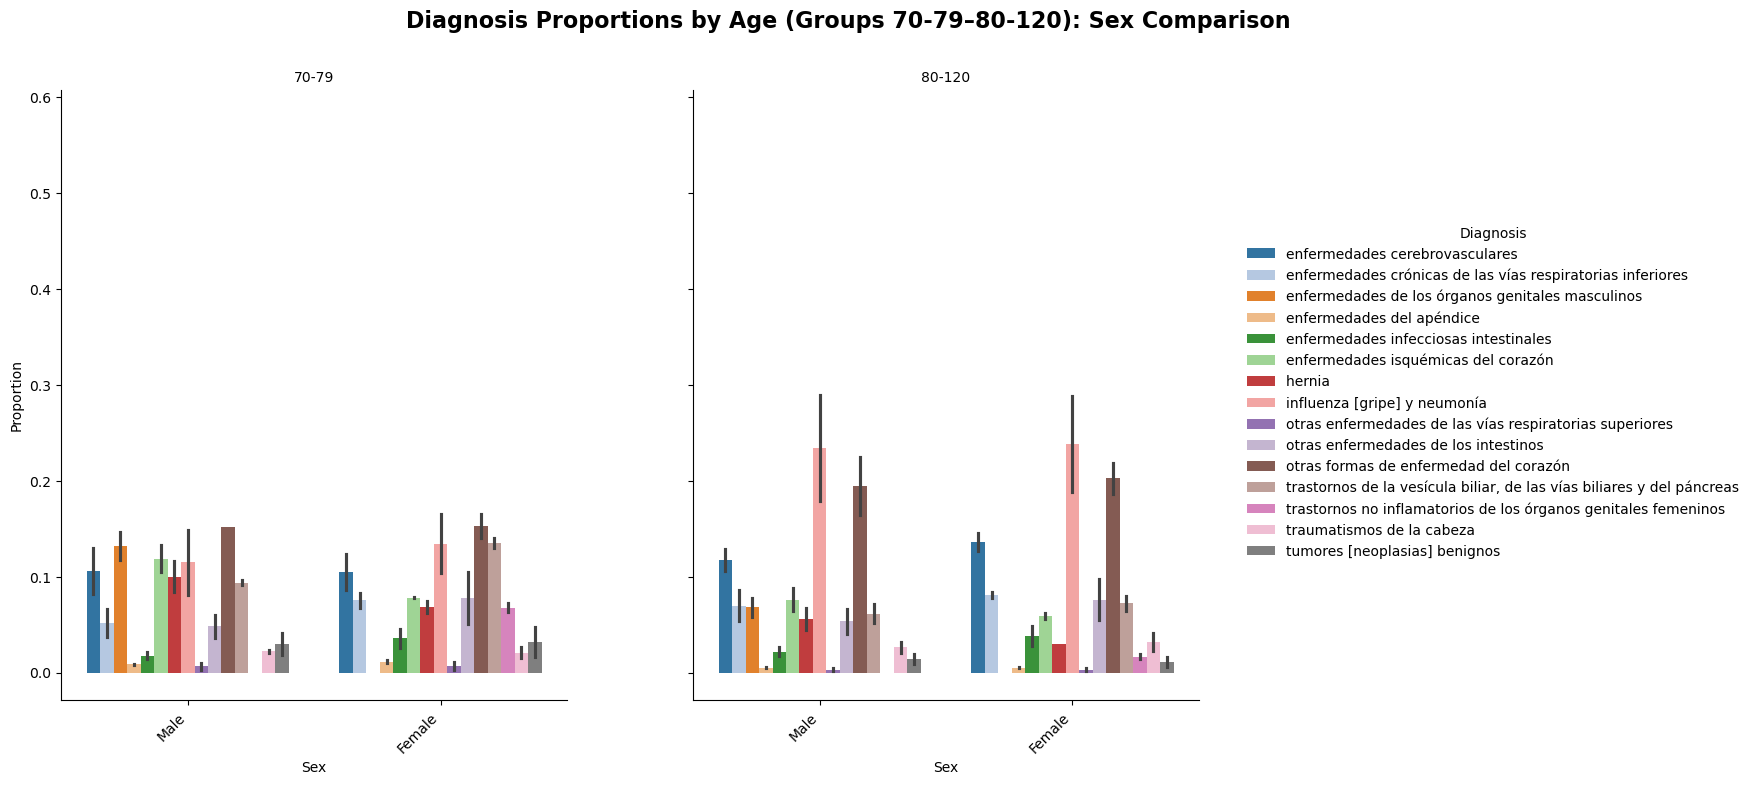

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# === Sort unique ages to keep them ordered ===
age_groups = sorted(long_df_g1['age'].unique())

# === Split the list into chunks of 2 ===
def chunk_list(lst, n):
    """Yield successive n-sized chunks from lst."""
    for i in range(0, len(lst), n):
        yield lst[i:i + n]

# === Find global y-axis range ===
y_min = long_df_g1['proportion'].min()
y_max = long_df_g1['proportion'].max()
y_buffer = (y_max - y_min) * 0.05
y_min -= y_buffer
y_max += y_buffer

# === Fix color order (palette) across all figures ===
diagnosis_order = sorted(long_df_g1['Diagnosis_grouped'].unique())

# Use a categorical palette with clearly distinct colors (up to 20)
palette = sns.color_palette("tab20", n_colors=len(diagnosis_order))

# === Loop over age group chunks (2 per figure) ===
for i, age_chunk in enumerate(chunk_list(age_groups, 2), start=1):
    df_subset = long_df_g1[long_df_g1['age'].isin(age_chunk)]

    g = sns.catplot(
        data=df_subset,
        kind='bar',
        x='sex',
        y='proportion',
        hue='Diagnosis_grouped',
        hue_order=diagnosis_order,    # consistent color mapping
        col='age',                    # one subplot per age group
        height=5,
        aspect=1.2,
        palette=palette,
        legend_out=True
    )

    # === Styling ===
    g.set_axis_labels("Sex", "Proportion")
    g.set_titles("{col_name}")
    g._legend.set_title("Diagnosis")
    g.set_xticklabels(rotation=45, ha='right')

    # Consistent y-axis limits
    for ax in g.axes.flatten():
        ax.set_ylim(y_min, y_max)

    # Layout and title
    g.fig.subplots_adjust(top=0.88, wspace=0.25)
    g.fig.set_size_inches(18, 8)
    g.fig.suptitle(
        f"Diagnosis Proportions by Age (Groups {age_chunk[0]}–{age_chunk[-1]}): Sex Comparison",
        fontsize=16,
        fontweight='bold'
    )

    plt.show()


In [47]:
# With insurance

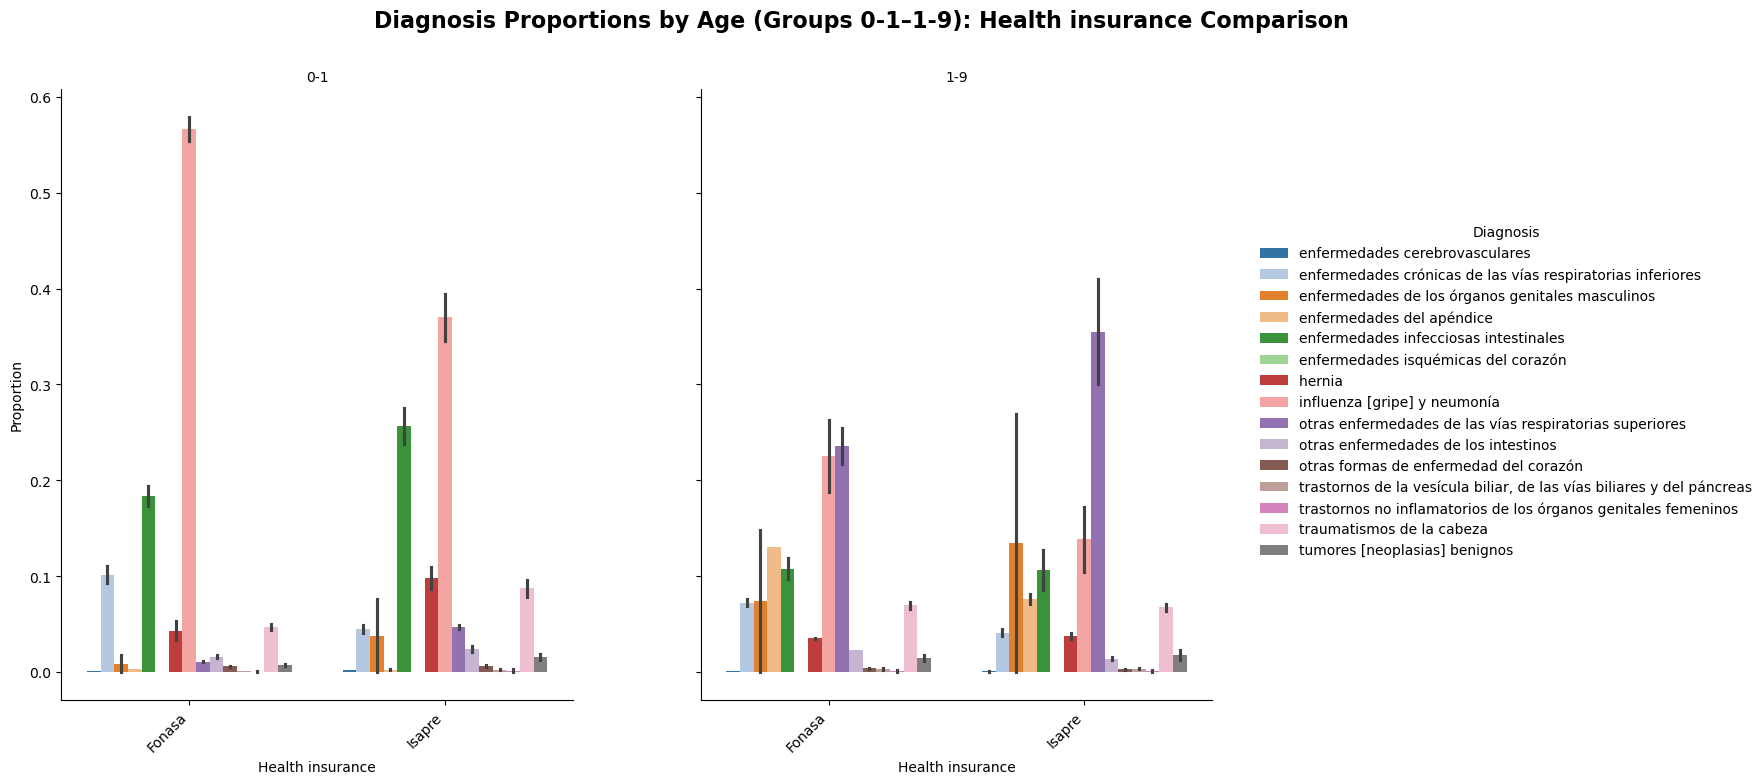

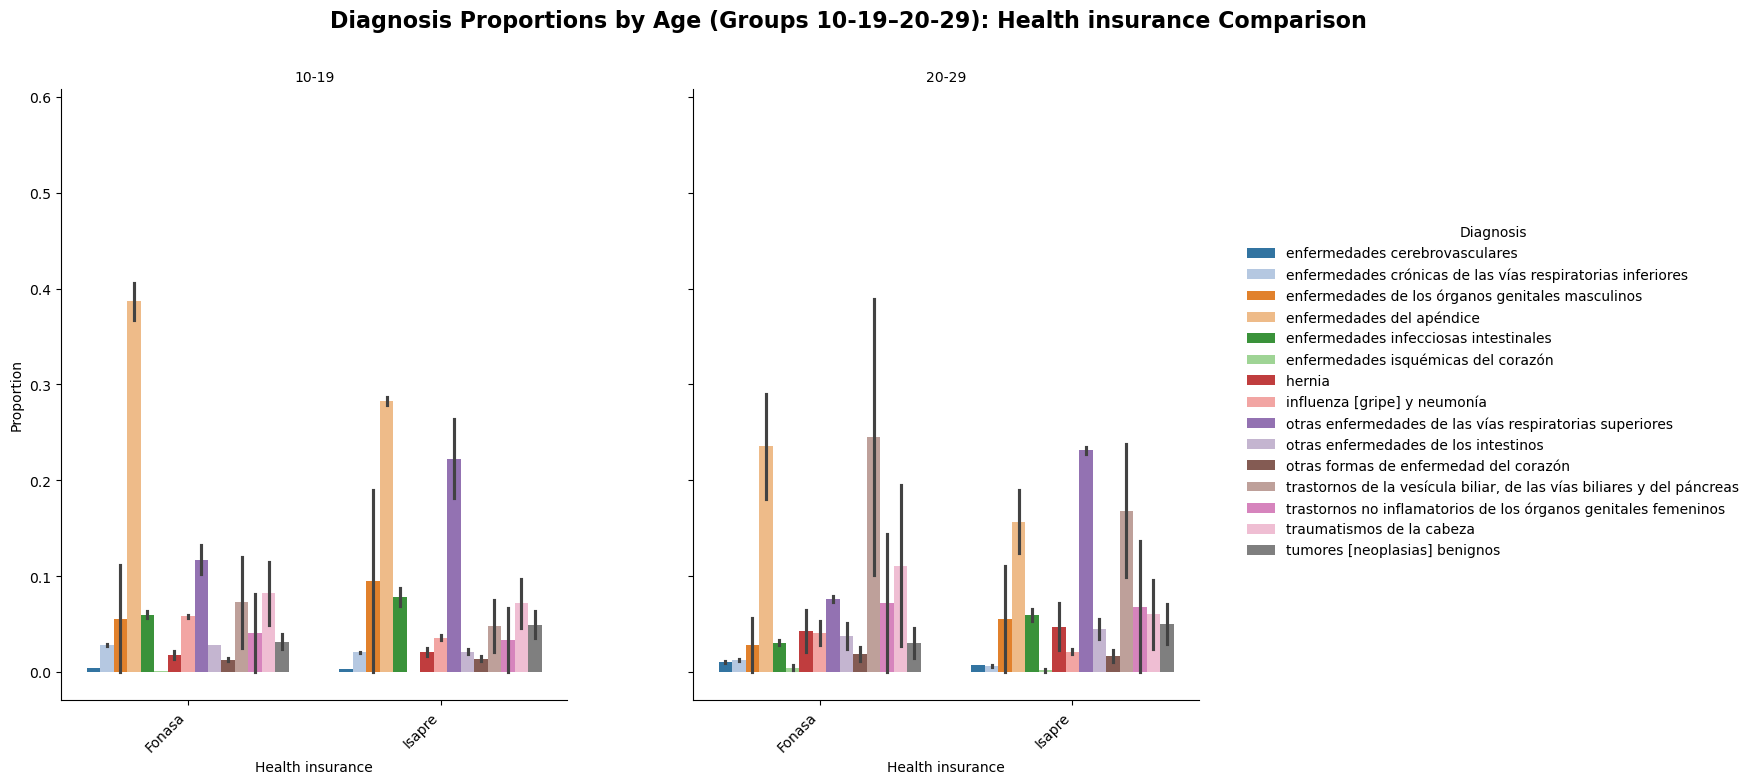

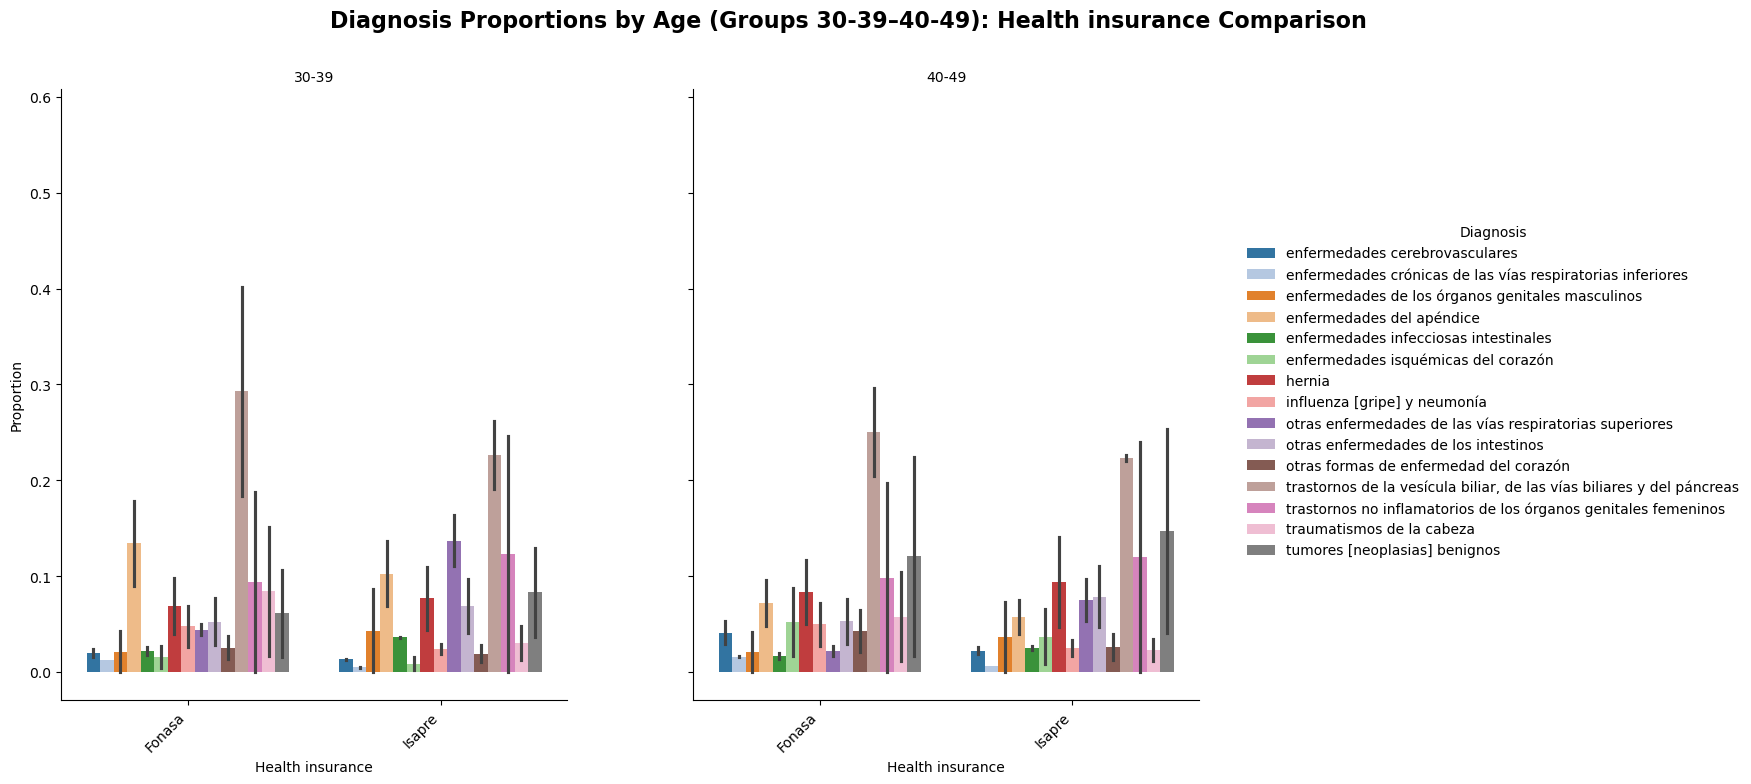

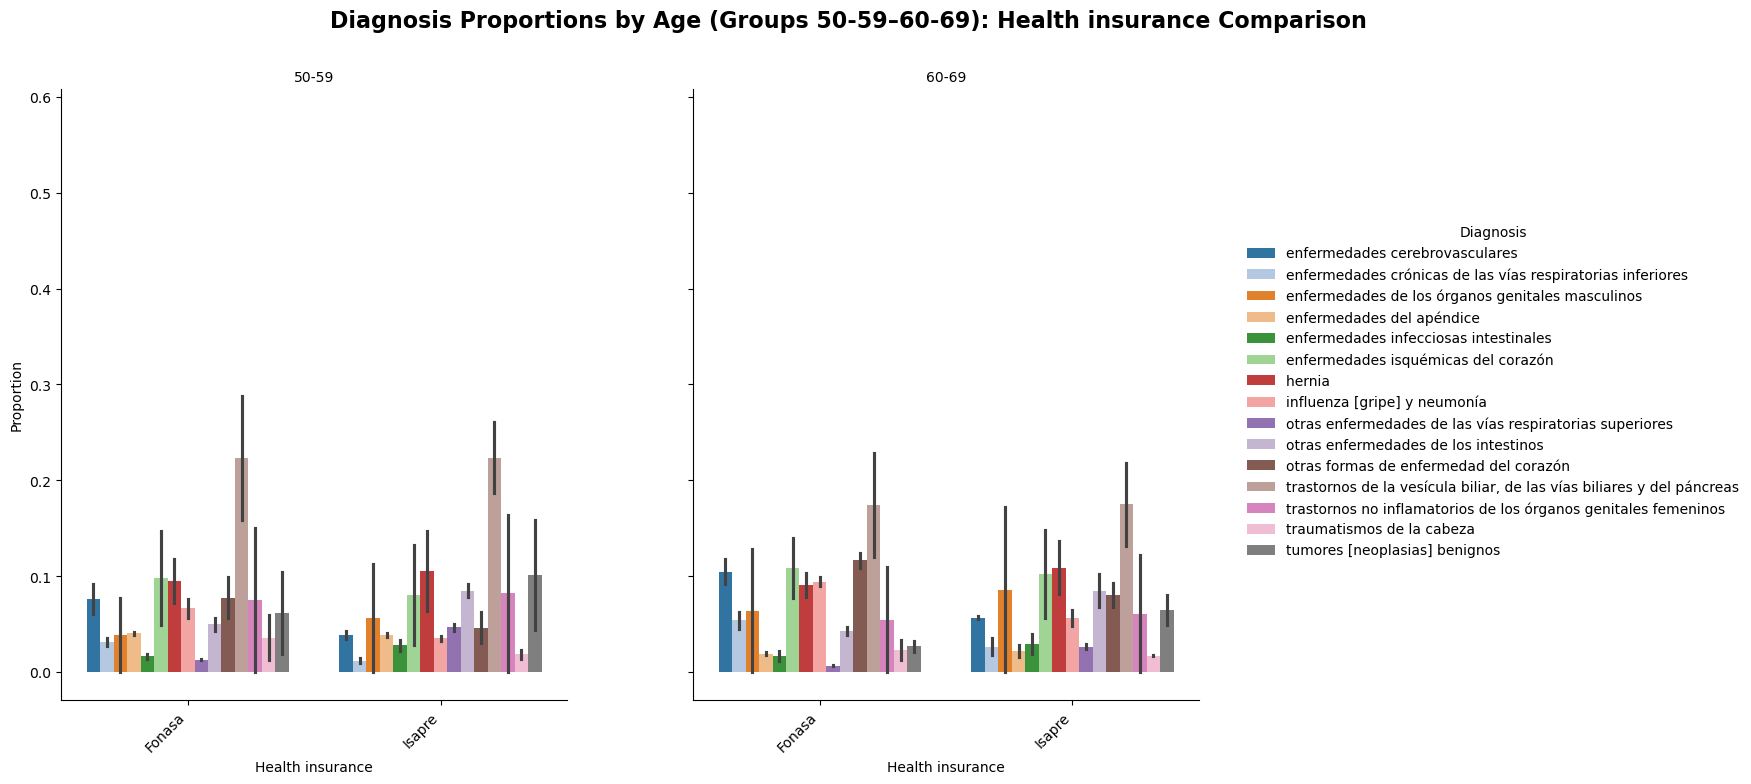

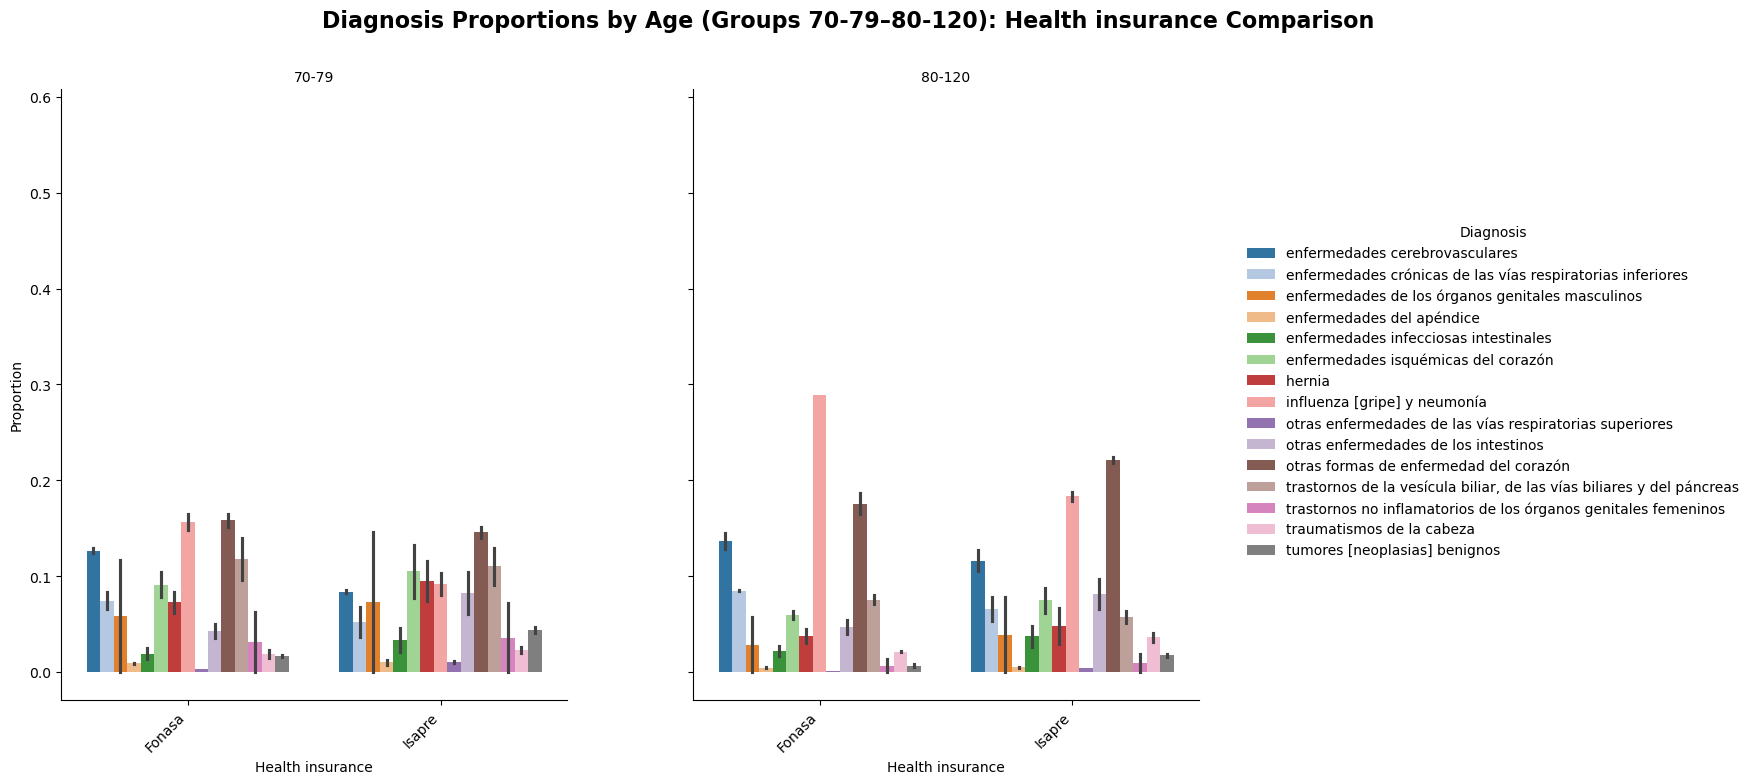

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# === Sort unique ages to keep them ordered ===
age_groups = sorted(long_df_g1['age'].unique())

# === Split the list into chunks of 2 ===
def chunk_list(lst, n):
    """Yield successive n-sized chunks from lst."""
    for i in range(0, len(lst), n):
        yield lst[i:i + n]

# === Find global y-axis range ===
y_min = long_df_g1['proportion'].min()
y_max = long_df_g1['proportion'].max()
y_buffer = (y_max - y_min) * 0.05
y_min -= y_buffer
y_max += y_buffer

# === Fix color order (palette) across all figures ===
diagnosis_order = sorted(long_df_g1['Diagnosis_grouped'].unique())

# Use a categorical palette with clearly distinct colors (up to 20)
palette = sns.color_palette("tab20", n_colors=len(diagnosis_order))

# === Loop over age group chunks (2 per figure) ===
for i, age_chunk in enumerate(chunk_list(age_groups, 2), start=1):
    df_subset = long_df_g1[long_df_g1['age'].isin(age_chunk)]

    g = sns.catplot(
        data=df_subset,
        kind='bar',
        x='health insurance',
        y='proportion',
        hue='Diagnosis_grouped',
        hue_order=diagnosis_order,    # consistent color mapping
        col='age',                    # one subplot per age group
        height=5,
        aspect=1.2,
        palette=palette,
        legend_out=True
    )

    # === Styling ===
    g.set_axis_labels("Health insurance", "Proportion")
    g.set_titles("{col_name}")
    g._legend.set_title("Diagnosis")
    g.set_xticklabels(rotation=45, ha='right')

    # Consistent y-axis limits
    for ax in g.axes.flatten():
        ax.set_ylim(y_min, y_max)

    # Layout and title
    g.fig.subplots_adjust(top=0.88, wspace=0.25)
    g.fig.set_size_inches(18, 8)
    g.fig.suptitle(
        f"Diagnosis Proportions by Age (Groups {age_chunk[0]}–{age_chunk[-1]}): Health insurance Comparison",
        fontsize=16,
        fontweight='bold'
    )

    plt.show()


# 4. Concentration & Distribution Insights

In [50]:
# Count occurrences
diag_freq = df['group names'].value_counts(normalize=False).reset_index()
diag_freq.columns = ['group names', 'count']

# Add relative share and cumulative share
diag_freq['share'] = diag_freq['count'] / diag_freq['count'].sum()
diag_freq['cum_share'] = diag_freq['share'].cumsum()


In [51]:
diag_freq.head()

group names    count     share  \
0  trastornos de la vesícula biliar, de las vías ...  1508792  0.058574   
1                       influenza [gripe] y neumonía  1302182  0.050553   
2                          enfermedades del apéndice   810863  0.031479   
3             otras formas de enfermedad del corazón   687480  0.026689   
4                                            hernia    647833  0.025150   

   cum_share  
0   0.058574  
1   0.109127  
2   0.140606  
3   0.167295  
4   0.192445

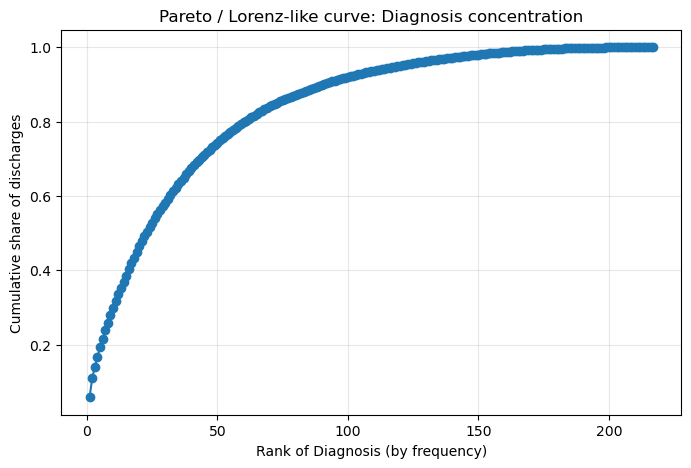

In [52]:
diag_freq_sorted = diag_freq.sort_values('share', ascending=False).reset_index(drop=True)

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(diag_freq_sorted)+1), diag_freq_sorted['cum_share'], marker='o')
plt.xlabel('Rank of Diagnosis (by frequency)')
plt.ylabel('Cumulative share of discharges')
plt.title('Pareto / Lorenz-like curve: Diagnosis concentration')
plt.grid(True, alpha=0.3)
plt.show()

In [53]:
H = (diag_freq['share'] ** 2).sum()

In [54]:
H

0.016876083575632663

In [55]:
for x in [5, 10, 15, 30, 50, 100]:
    top_share = diag_freq_sorted['share'].iloc[:x].sum()
    print(f"Top {x} diagnoses = {top_share:.1%} of all discharges")


Top 5 diagnoses = 19.2% of all discharges
Top 10 diagnoses = 29.9% of all discharges
Top 15 diagnoses = 38.6% of all discharges
Top 30 diagnoses = 58.2% of all discharges
Top 50 diagnoses = 74.3% of all discharges
Top 100 diagnoses = 92.0% of all discharges


In [56]:
sub_concentration = (
    df.groupby(['age', 'health insurance', 'group names'], observed=True)
      .size()
      .groupby(level=[0,1])
      .apply(lambda x: ((x / x.sum()) ** 2).sum())
      .reset_index(name='HHI')
)


C:\Users\mirko\AppData\Local\Temp\ipykernel_19400\3622326724.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(level=[0,1])


In [57]:
sub_concentration

age health insurance       HHI
0      0-1           Fonasa  0.065228
1      0-1           Isapre  0.051445
2      1-9           Fonasa  0.040694
3      1-9           Isapre  0.061781
4    10-19           Fonasa  0.031298
5    10-19           Isapre  0.031869
6    20-29           Fonasa  0.025409
7    20-29           Isapre  0.026383
8    30-39           Fonasa  0.027264
9    30-39           Isapre  0.026581
10   40-49           Fonasa  0.026375
11   40-49           Isapre  0.026012
12   50-59           Fonasa  0.021712
13   50-59           Isapre  0.021475
14   60-69           Fonasa  0.022834
15   60-69           Isapre  0.019577
16   70-79           Fonasa  0.026312
17   70-79           Isapre  0.019800
18  80-120           Fonasa  0.040631
19  80-120           Isapre  0.025608

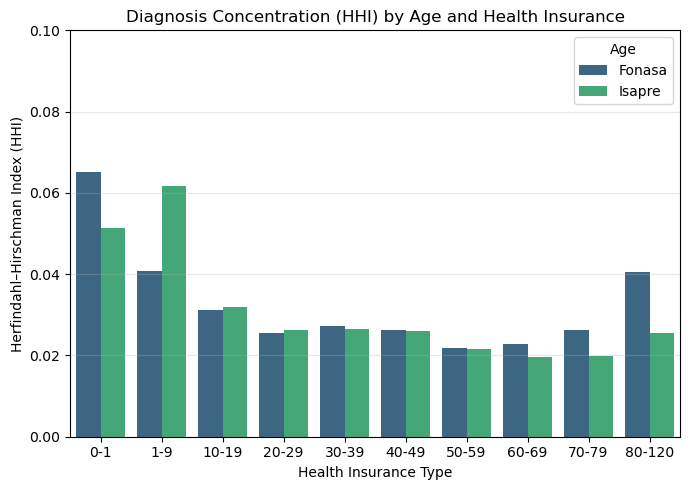

In [58]:
plt.figure(figsize=(7,5))
sns.barplot(
    data=sub_concentration,
    x='age',
    y='HHI',
    hue='health insurance',
    palette='viridis'
)
plt.title('Diagnosis Concentration (HHI) by Age and Health Insurance')
plt.ylabel('Herfindahl–Hirschman Index (HHI)')
plt.xlabel('Health Insurance Type')
plt.ylim(0,0.1)
plt.legend(title='Age')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


# 5. Conditional Relationships (3D Exploration)

In [60]:
# This will be done when LOS is analyzed, considering is the only continous variable and most important one

# 6. Normalized Profiles (Share-of-Group vs. Share-of-Total)

# 7. Outlier & Exception Analysis

In [63]:
# This will be done when LOS is included in the group of variables to analyze

# 8. Effect Size Indicators (Descriptive)

In [65]:
# This will be done when LOS is included in the group of variables to analyze

# 9. Interpretation & Contextualization

# 10. Insight Blocks (Mini Stories)

# 11. Optional: Synthesis Dashboard (for the Report) --> One-pager structure. Fill it usign univariate an bivariate stages as well

# Group 2: [Healthcare Facility type] x [Diagnosis group] x [LOS_capped]

# 1. Objective & Variables





# 2. Case-Mix Overview (Facility × Diagnosis)

In [72]:
# Crosstab of Diagnosis counts per Facility
pd.crosstab(index = df["Diagnosis_grouped"], columns = df['healthcare facility type'])

healthcare facility type                            Private    Public  Unknown
Diagnosis_grouped                                                             
enfermedades cerebrovasculares                        77193    455235    31525
enfermedades crónicas de las vías respiratorias...    47654    376573    17341
enfermedades de los órganos genitales masculinos     224811    267463    24075
enfermedades del apéndice                            170857    611422    28584
enfermedades infecciosas intestinales                115056    303794    13689
enfermedades isquémicas del corazón                   96984    376653    30434
hernia                                               250301    368802    28730
influenza [gripe] y neumonía                         157979   1093435    50768
otras enfermedades de las vías respiratorias su...   336917    251721    23328
otras enfermedades de los intestinos                 144601    261514    24720
otras formas de enfermedad del corazón               111345    539778    36357
trastornos de la vesícula biliar, de las vías b...   489028    939703    80061
trastornos no inflamatorios de los órganos geni...   178109    345011    26740
traumatismos de la cabeza                             94702    336874    13719
tumores [neoplasias] benignos                        197700    266323    23724
Other                                               4357363  10695054   764991

In [73]:
# Crosstab of top 15 Diagnosis groups proportions per Facility: “Row % distribution of diagnosis by facility type”

In [74]:
# Filter out "Other" diagnosis groups out of the top 15 most frequent
top15_df = df[df["Diagnosis_grouped"] != "Other"]

In [75]:
# Higher proportion means that facility type specialize in that diagnosis group
crosstab_1_g2 = pd.crosstab(index = top15_df["Diagnosis_grouped"], columns = top15_df['healthcare facility type'], normalize = "index")

In [76]:
crosstab_1_g2

healthcare facility type                             Private    Public  \
Diagnosis_grouped                                                        
enfermedades cerebrovasculares                      0.136878  0.807222   
enfermedades crónicas de las vías respiratorias...  0.107920  0.852809   
enfermedades de los órganos genitales masculinos    0.435386  0.517989   
enfermedades del apéndice                           0.210710  0.754039   
enfermedades infecciosas intestinales               0.266001  0.702351   
enfermedades isquémicas del corazón                 0.192401  0.747222   
hernia                                              0.386367  0.569286   
influenza [gripe] y neumonía                        0.121319  0.839694   
otras enfermedades de las vías respiratorias su...  0.550549  0.411332   
otras enfermedades de los intestinos                0.335630  0.606993   
otras formas de enfermedad del corazón              0.161961  0.785154   
trastornos de la vesícula biliar, de las vías b...  0.324119  0.622818   
trastornos no inflamatorios de los órganos geni...  0.323917  0.627452   
traumatismos de la cabeza                           0.212672  0.756519   
tumores [neoplasias] benignos                       0.405333  0.546027   

healthcare facility type                             Unknown  
Diagnosis_grouped                                             
enfermedades cerebrovasculares                      0.055900  
enfermedades crónicas de las vías respiratorias...  0.039271  
enfermedades de los órganos genitales masculinos    0.046625  
enfermedades del apéndice                           0.035251  
enfermedades infecciosas intestinales               0.031648  
enfermedades isquémicas del corazón                 0.060376  
hernia                                              0.044348  
influenza [gripe] y neumonía                        0.038987  
otras enfermedades de las vías respiratorias su...  0.038120  
otras enfermedades de los intestinos                0.057377  
otras formas de enfermedad del corazón              0.052884  
trastornos de la vesícula biliar, de las vías b...  0.053063  
trastornos no inflamatorios de los órganos geni...  0.048631  
traumatismos de la cabeza                           0.030809  
tumores [neoplasias] benignos                       0.048640

In [77]:
# On the same facility type, which diagnosis groups are over/under represented.
crosstab_2_g2 = pd.crosstab(index = top15_df["Diagnosis_grouped"], columns = top15_df['healthcare facility type'], normalize = "columns")

In [78]:
crosstab_2_g2

healthcare facility type                             Private    Public  \
Diagnosis_grouped                                                        
enfermedades cerebrovasculares                      0.028662  0.067002   
enfermedades crónicas de las vías respiratorias...  0.017694  0.055425   
enfermedades de los órganos genitales masculinos    0.083472  0.039366   
enfermedades del apéndice                           0.063439  0.089990   
enfermedades infecciosas intestinales               0.042720  0.044713   
enfermedades isquémicas del corazón                 0.036010  0.055437   
hernia                                              0.092937  0.054281   
influenza [gripe] y neumonía                        0.058658  0.160934   
otras enfermedades de las vías respiratorias su...  0.125097  0.037049   
otras enfermedades de los intestinos                0.053690  0.038490   
otras formas de enfermedad del corazón              0.041342  0.079446   
trastornos de la vesícula biliar, de las vías b...  0.181576  0.138308   
trastornos no inflamatorios de los órganos geni...  0.066132  0.050779   
traumatismos de la cabeza                           0.035163  0.049582   
tumores [neoplasias] benignos                       0.073406  0.039198   

healthcare facility type                             Unknown  
Diagnosis_grouped                                             
enfermedades cerebrovasculares                      0.069470  
enfermedades crónicas de las vías respiratorias...  0.038213  
enfermedades de los órganos genitales masculinos    0.053053  
enfermedades del apéndice                           0.062989  
enfermedades infecciosas intestinales               0.030166  
enfermedades isquémicas del corazón                 0.067066  
hernia                                              0.063311  
influenza [gripe] y neumonía                        0.111874  
otras enfermedades de las vías respiratorias su...  0.051406  
otras enfermedades de los intestinos                0.054474  
otras formas de enfermedad del corazón              0.080118  
trastornos de la vesícula biliar, de las vías b...  0.176425  
trastornos no inflamatorios de los órganos geni...  0.058925  
traumatismos de la cabeza                           0.030232  
tumores [neoplasias] benignos                       0.052279

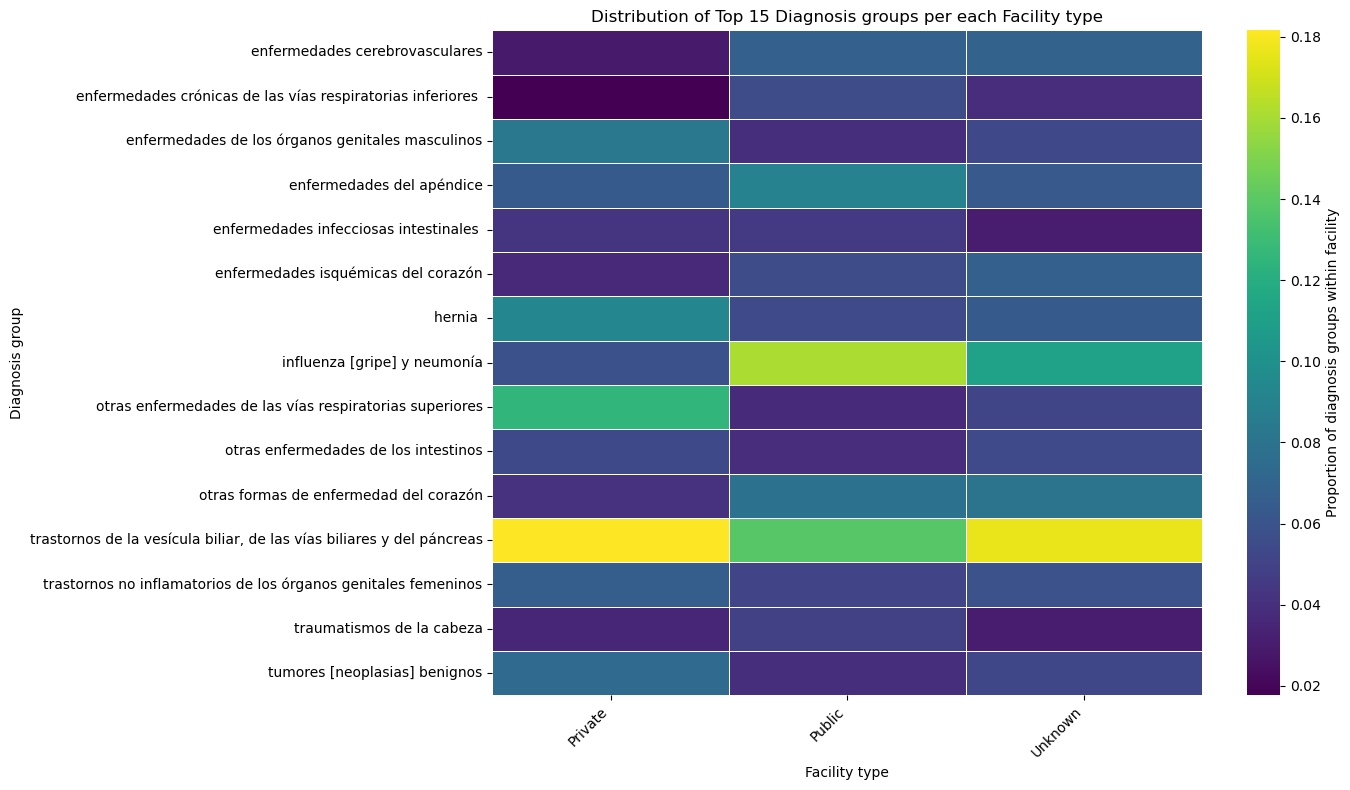

In [79]:
plt.figure(figsize=(14, 8))
sns.heatmap(
    crosstab_2_g2, 
    cmap='viridis', 
    linewidths=0.5,
    cbar_kws={'label': 'Proportion of diagnosis groups within facility'}
)
plt.title('Distribution of Top 15 Diagnosis groups per each Facility type')
plt.xlabel('Facility type')
plt.ylabel('Diagnosis group')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [80]:
pivot1_g2 = pd.pivot_table(
    top15_df,
    values='LOS_capped',         # column to aggregate
    index='Diagnosis_grouped',          # first dimension
    columns='healthcare facility type',        # second dimension
    aggfunc='median'    # aggregation function
)

C:\Users\mirko\AppData\Local\Temp\ipykernel_19400\3175847760.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot1_g2 = pd.pivot_table(


In [81]:
pivot1_g2

healthcare facility type                            Private  Public  Unknown
Diagnosis_grouped                                                           
enfermedades cerebrovasculares                          5.0     7.0      6.0
enfermedades crónicas de las vías respiratorias...      4.0     5.0      4.0
enfermedades de los órganos genitales masculinos        1.0     3.0      2.0
enfermedades del apéndice                               2.0     2.0      1.0
enfermedades infecciosas intestinales                   2.0     2.0      3.0
enfermedades isquémicas del corazón                     3.0     5.0      4.0
hernia                                                  1.0     2.0      1.0
influenza [gripe] y neumonía                            4.0     5.0      5.0
otras enfermedades de las vías respiratorias su...      1.0     1.0      1.0
otras enfermedades de los intestinos                    2.0     4.0      3.0
otras formas de enfermedad del corazón                  3.0     5.0      5.0
trastornos de la vesícula biliar, de las vías b...      1.0     3.0      1.0
trastornos no inflamatorios de los órganos geni...      1.0     2.0      1.0
traumatismos de la cabeza                               1.0     2.0      3.0
tumores [neoplasias] benignos                           2.0     3.0      2.0

In [82]:
pivot2_g2 = pd.pivot_table(
    top15_df,
    values='LOS_capped',         # column to aggregate
    index='Diagnosis_grouped',          # first dimension
    columns='healthcare facility type',        # second dimension
    aggfunc=lambda x: np.percentile(x, 75)    # aggregation function
)

C:\Users\mirko\AppData\Local\Temp\ipykernel_19400\2459095275.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot2_g2 = pd.pivot_table(


In [83]:
# 75% of the data in that group is below or equal to that number, and 25% is above it.
pivot2_g2

healthcare facility type                            Private  Public  Unknown
Diagnosis_grouped                                                           
enfermedades cerebrovasculares                         11.0    13.0     12.0
enfermedades crónicas de las vías respiratorias...      6.0     8.0      7.0
enfermedades de los órganos genitales masculinos        3.0     6.0      4.0
enfermedades del apéndice                               2.0     4.0      3.0
enfermedades infecciosas intestinales                   3.0     4.0      5.0
enfermedades isquémicas del corazón                     6.0     9.0      8.0
hernia                                                  2.0     3.0      2.0
influenza [gripe] y neumonía                            7.0     9.0      8.0
otras enfermedades de las vías respiratorias su...      1.0     2.0      1.0
otras enfermedades de los intestinos                    4.0     7.0      6.0
otras formas de enfermedad del corazón                  6.0    10.0      9.0
trastornos de la vesícula biliar, de las vías b...      2.0     7.0      5.0
trastornos no inflamatorios de los órganos geni...      2.0     3.0      2.0
traumatismos de la cabeza                               3.0     5.0      7.0
tumores [neoplasias] benignos                           3.0     4.0      3.0

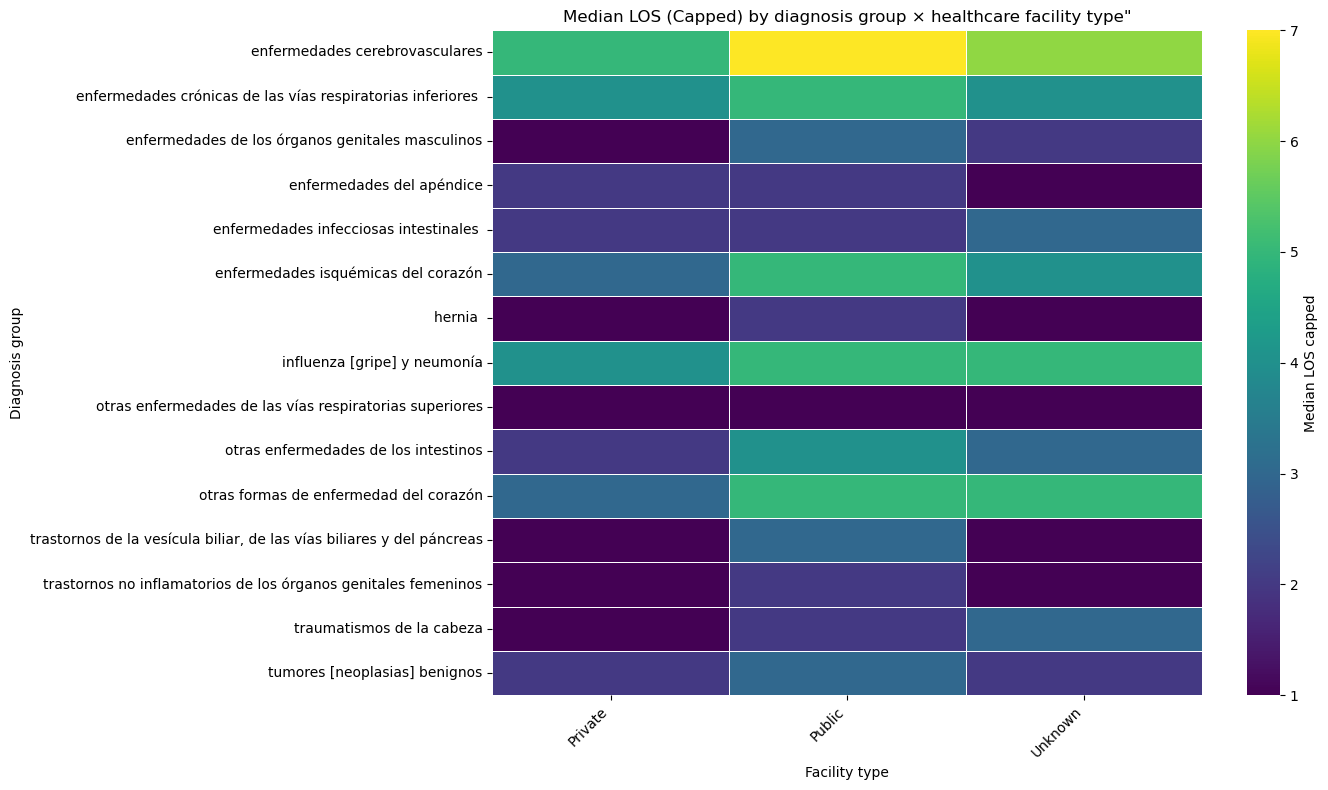

In [84]:
plt.figure(figsize=(14, 8))
sns.heatmap(
    pivot1_g2, 
    cmap='viridis', 
    linewidths=0.5,
    cbar_kws={'label': "Median LOS capped"}
)
plt.title('Median LOS (Capped) by diagnosis group × healthcare facility type"')
plt.xlabel('Facility type')
plt.ylabel('Diagnosis group')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [85]:
top15_df["healthcare facility type"].value_counts(normalize=True) * 100

healthcare facility type
Public     68.343964
Private    27.091307
Unknown     4.564730
Name: proportion, dtype: float64

In [86]:
df[df["healthcare facility type"] == "Unknown"].year.value_counts()

year
2023    1218786
Name: count, dtype: int64

In [87]:
top15_df = top15_df[top15_df["healthcare facility type"] != "Unknown"]

In [88]:
top15_df["Diagnosis_grouped"] = top15_df["Diagnosis_grouped"].cat.remove_unused_categories()



In [89]:
top15_df["Diagnosis_grouped"].value_counts()

Diagnosis_grouped
trastornos de la vesícula biliar, de las vías biliares y del páncreas    1428731
influenza [gripe] y neumonía                                             1251414
enfermedades del apéndice                                                 782279
otras formas de enfermedad del corazón                                    651123
hernia                                                                    619103
otras enfermedades de las vías respiratorias superiores                   588638
enfermedades cerebrovasculares                                            532428
trastornos no inflamatorios de los órganos genitales femeninos            523120
enfermedades de los órganos genitales masculinos                          492274
enfermedades isquémicas del corazón                                       473637
tumores [neoplasias] benignos                                             464023
traumatismos de la cabeza                                                 431576
enfermedad

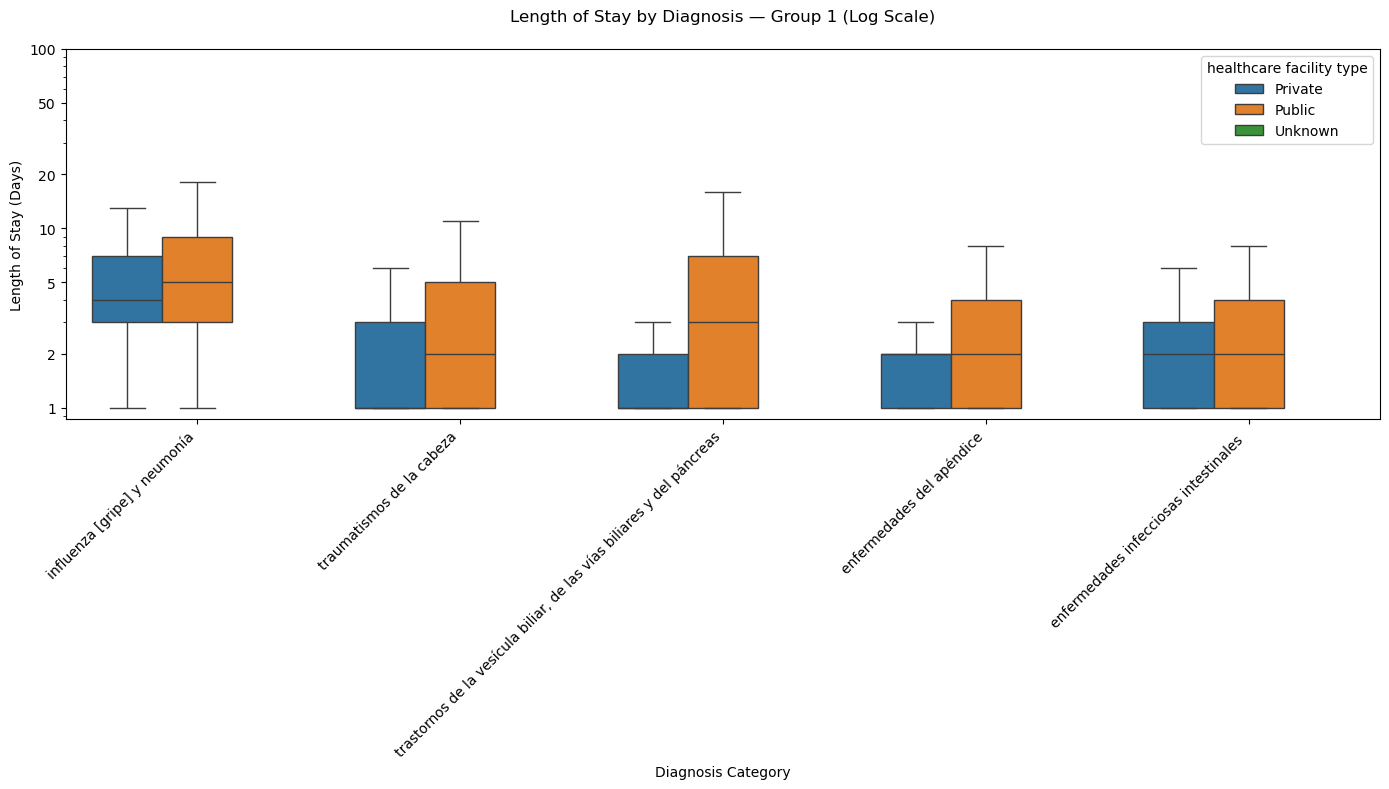

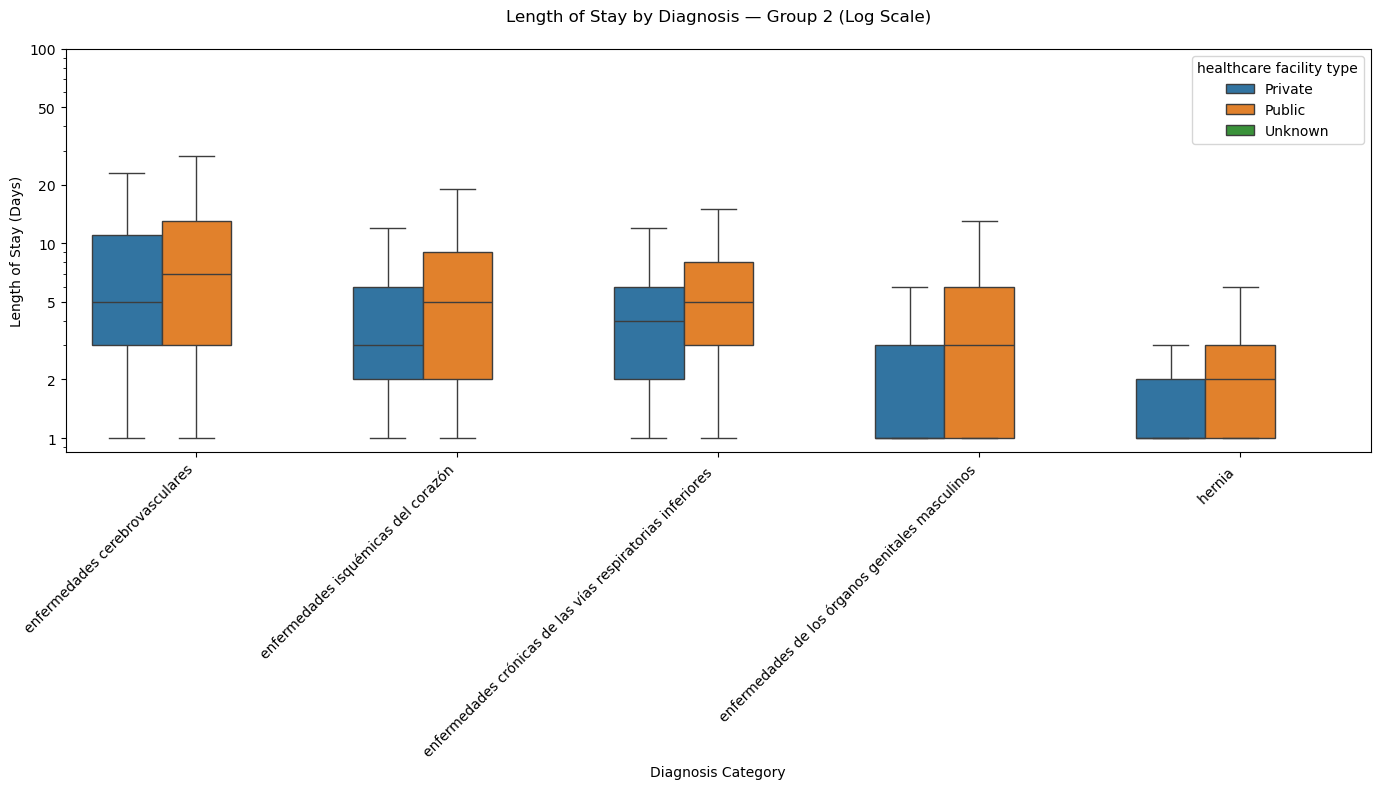

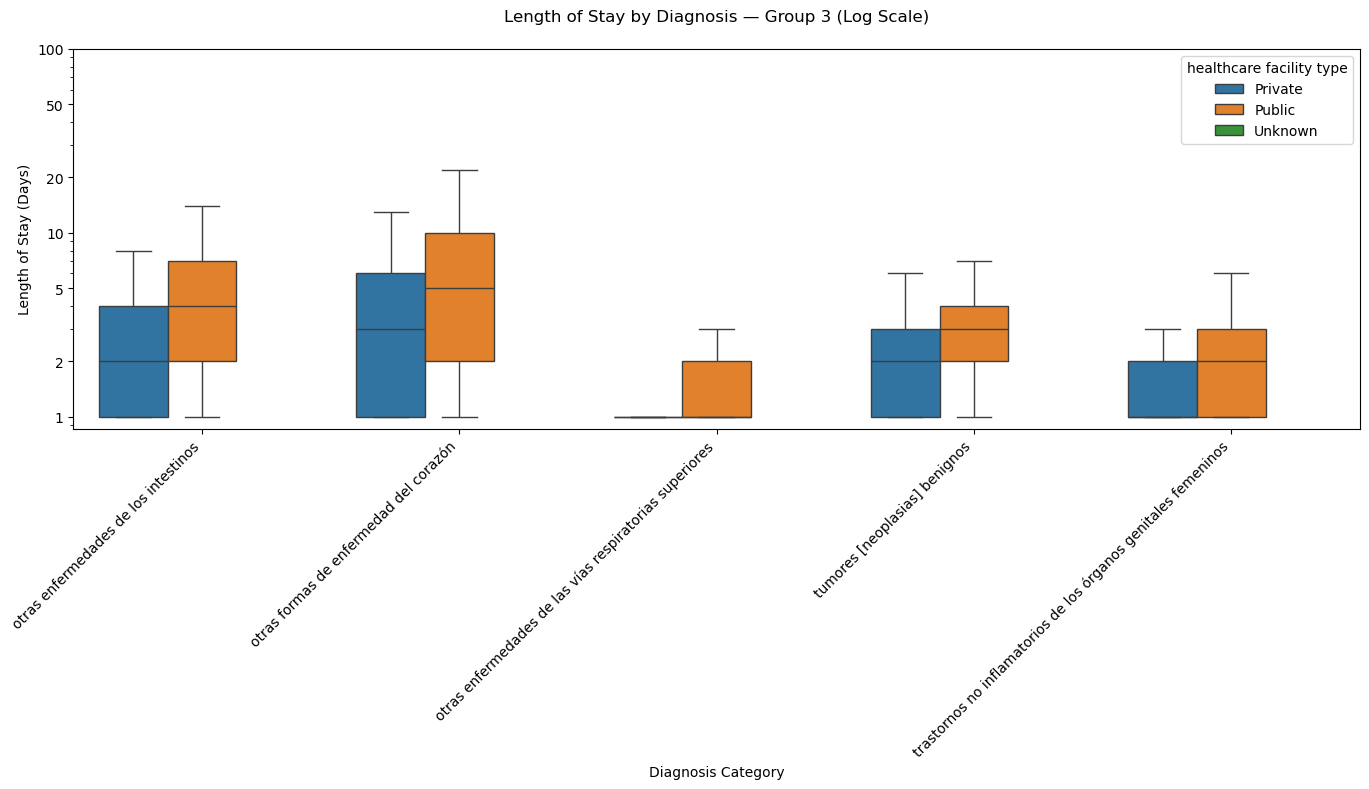

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Keep only Public and Private (remove "Unknown")
df_clean = top15_df[top15_df["healthcare facility type"] != "Unknown"]

# Get all diagnosis categories
all_categories = df_clean["Diagnosis_grouped"].unique()

# Split categories into groups of 5 to avoid overcrowded plots
category_groups = [all_categories[i:i+5] for i in range(0, len(all_categories), 5)]

for i, group in enumerate(category_groups):

    # Filter the data for the current group of 5 diagnoses
    df_group = df_clean[df_clean["Diagnosis_grouped"].isin(group)]

    plt.figure(figsize=(14, 8))

    # Boxplot comparing LOS between Public and Private for each diagnosis
    sns.boxplot(
        data=df_group,
        x="Diagnosis_grouped",
        y="LOS_capped",
        hue="healthcare facility type",
        order=group,
        showfliers=False          # hide extreme outliers
    )

    # Use a log scale to better visualize skewed LOS values
    plt.yscale("log")

    # Cleaner tick marks on the log axis
    log_ticks = [1, 2, 5, 10, 20, 50, 100]
    plt.yticks(log_ticks)
    plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda v, pos: f"{int(v)}"))

    # Make x-labels readable
    plt.xticks(rotation=45, ha="right")

    # Titles and labels
    plt.title(f"Length of Stay by Diagnosis — Group {i+1} (Log Scale)", pad=20)
    plt.xlabel("Diagnosis Category")
    plt.ylabel("Length of Stay (Days)")

    plt.tight_layout()
    plt.show()


In [91]:
4. Concentration & Distribution Insights

“Plot cumulative shares of total [count or numeric_var] by [variable1] for each [variable2].”
→ Shows which subgroups account for most of the total.




SyntaxError: invalid character '“' (U+201C) (4190458425.py, line 3)

In [ ]:
5. Conditional Relationships (3D Exploration)

“Within each [variable2] group, compare mean [numeric_var] across [variable1].”
“Then rank combinations by difference or ratio of means.”

→ Reveals interactions rather than isolated effects.



In [ ]:
6. Normalized Profiles (Share-of-Group vs. Share-of-Total)

“Compare each [variable2] group’s internal distribution of [variable1] to the total distribution.”
→ Identify which categories are over- or underrepresented in each group.



In [ ]:
7. Outlier & Exception Analysis

“Highlight combinations where [numeric_var] is unusually high or low relative to others.”
“Plot scatter: x = mean [numeric_var] for [group A], y = mean for [group B].”



In [ ]:
8. Effect Size Indicators

“Compute ratios or gaps between groups (e.g., mean [numeric_var] of A / B).”
“Sort and interpret which gaps are large or meaningful.”



In [ ]:
9. Interpretation & Contextualization
“Summarize what the patterns suggest about how [variable1] and [variable2] jointly shape [numeric_var].”
“Discuss whether these differences might reflect population structure, system differences, or other confounding factors.”



In [ ]:
10. Insight Blocks

Insight #1:

[Short, direct finding — e.g., One group dominates in X and shows higher Y.]

Insight #2:

[Contrasting observation — e.g., Another group shows opposite pattern.]

Insight #3:

[Interpretive insight — e.g., Differences might reflect behavioral, demographic, or institutional effects.]



In [ ]:
1. Which diagnoses are most common overall (frequency tables)

Identify high-burden conditions in the hospital system.

Supports prioritizing diagnoses with large patient loads.

2. Public vs Private differences in patient volume (normalized crosstab)

Which diagnoses are concentrated in public vs private facilities?

Reveals differences in:

access

insurance coverage

referral pathways

3. Diagnoses with the largest proportion differences (heatmap of proportions)

Quickly spot conditions that one system handles disproportionately.

E.g., public hospitals might handle most trauma; private facilities more elective surgeries.

4. Typical LOS for each diagnosis (median heatmap / summary table)

Which diagnoses have:

the shortest median LOS?

the longest median LOS?

Easy identification of complex vs simple conditions.

5. Differences in LOS between public and private (boxplots + medians)

For each diagnosis:

is LOS longer in public?

shorter in private?

no difference?

Shows where each system is more efficient.

6. Diagnoses with the largest LOS gap between public and private (median heatmap)

Reveals potential:

inefficiencies

resource limitations

case-mix differences

differing clinical protocols

7. Diagnoses with high LOS variability (IQR from boxplots)

A wide boxplot → larger differences in patient trajectories.

Indicates diagnoses with:

variable severity

complications

inconsistent care pathways

8. Diagnoses with many extreme LOS outliers (shape of the boxplot)

Outlier presence suggests:

chronic care

long rehab

discharge delays

severe complications

9. Public vs Private differences in LOS variability, not just medians

High variability in public may reflect:

broader patient mix or more complex cases

Lower variability in private:

standardized procedures

more controlled case selection

10. Diagnoses where public and private LOS patterns are “almost identical”

Suggest standardized care protocols or similar case mix.

Important for highlighting fairness and equity across systems.

In [ ]:
11. Optional Dashboard Summary

Combine key visuals:

Distribution plot ([variable1] × [variable2])

Boxplot ([numeric_var] × [variable1], colored by [variable2])

Concentration curve (cumulative share)

3 concise insight bullets

# Group 3: Facility Type × Diagnosis Group × Age

In [93]:
# IMPORTANTE VER COMO PARA LA MISMA EDAD AMBOS SSITEMAS DE SALUD (PUB/PRIV) MANEJAN MISMOS DIAGNOSTICOS (DA LUCES SOBRE EFICIENCIA)

In [95]:
# SACAR ESTRUCTURA DE CHAT GPT

In [97]:
# revisar conclusiones grupo 1, para que sea entendible la relacion entre caractersiticas individuales y que tan frecuente es "X" diagnostico

# 1. Scope

# 2. TABLE 1: Volume Overview

In [101]:
# Crosstab of Diagnosis counts per Facility
pd.crosstab(index = df["Diagnosis_grouped"], columns = df['healthcare facility type'])

healthcare facility type                            Private    Public  Unknown
Diagnosis_grouped                                                             
enfermedades cerebrovasculares                        77193    455235    31525
enfermedades crónicas de las vías respiratorias...    47654    376573    17341
enfermedades de los órganos genitales masculinos     224811    267463    24075
enfermedades del apéndice                            170857    611422    28584
enfermedades infecciosas intestinales                115056    303794    13689
enfermedades isquémicas del corazón                   96984    376653    30434
hernia                                               250301    368802    28730
influenza [gripe] y neumonía                         157979   1093435    50768
otras enfermedades de las vías respiratorias su...   336917    251721    23328
otras enfermedades de los intestinos                 144601    261514    24720
otras formas de enfermedad del corazón               111345    539778    36357
trastornos de la vesícula biliar, de las vías b...   489028    939703    80061
trastornos no inflamatorios de los órganos geni...   178109    345011    26740
traumatismos de la cabeza                             94702    336874    13719
tumores [neoplasias] benignos                        197700    266323    23724
Other                                               4357363  10695054   764991

In [102]:
# Higher proportion means that facility type specialize in that diagnosis group
crosstab_1_g3 = pd.crosstab(index = top15_df["Diagnosis_grouped"], columns = top15_df['healthcare facility type'], normalize = "columns")

In [103]:
crosstab_1_g3

healthcare facility type                             Private    Public
Diagnosis_grouped                                                     
enfermedades cerebrovasculares                      0.028662  0.067002
enfermedades crónicas de las vías respiratorias...  0.017694  0.055425
enfermedades de los órganos genitales masculinos    0.083472  0.039366
enfermedades del apéndice                           0.063439  0.089990
enfermedades infecciosas intestinales               0.042720  0.044713
enfermedades isquémicas del corazón                 0.036010  0.055437
hernia                                              0.092937  0.054281
influenza [gripe] y neumonía                        0.058658  0.160934
otras enfermedades de las vías respiratorias su...  0.125097  0.037049
otras enfermedades de los intestinos                0.053690  0.038490
otras formas de enfermedad del corazón              0.041342  0.079446
trastornos de la vesícula biliar, de las vías b...  0.181576  0.138308
trastornos no inflamatorios de los órganos geni...  0.066132  0.050779
traumatismos de la cabeza                           0.035163  0.049582
tumores [neoplasias] benignos                       0.073406  0.039198

# 3. TABLE 2 — Age Distribution by Facility Type

In [105]:
crosstab_2_g3 = pd.crosstab(index = top15_df["age"], columns = top15_df['healthcare facility type'], normalize = "columns")

In [106]:
crosstab_2_g3

healthcare facility type   Private    Public
age                                         
0-1                       0.030960  0.072769
1-9                       0.122689  0.100010
10-19                     0.069363  0.072338
20-29                     0.098779  0.060813
30-39                     0.144730  0.076154
40-49                     0.154248  0.111313
50-59                     0.135296  0.119285
60-69                     0.115186  0.139279
70-79                     0.078122  0.140664
80-120                    0.050628  0.107375

# Filtering case-mix and efficiency overall differences based on age bins and diagnosis groups thresholds

In [288]:
# Lists for diagnosis groups
dx_comparable = set()
dx_caution = set()
dx_not_comparable = set()

# Lists for age bins
age_comparable = set()
age_caution = set()
age_not_comparable = set()


In [290]:
def classify_item(diff, thresholds, lists, item_name):
    """
    thresholds: {"comparable": x, "caution": y}
    lists: (list_comparable, list_caution, list_not_comparable)
    item_name: the diagnosis or age bin label
    """
    comp, caut, notcomp = lists

    if diff <= thresholds["comparable"]:
        comp.add(item_name)
    elif diff <= thresholds["caution"]:
        caut.add(item_name)
    else:
        notcomp.add(item_name)


In [292]:
DX_THRESHOLDS = {"comparable": 0.10, "caution": 0.15}

for dx in crosstab_1_g3.index:
    diff = abs(crosstab_1_g3.loc[dx, "Public"] - crosstab_1_g3.loc[dx, "Private"])
    
    classify_item(
        diff=diff,
        thresholds=DX_THRESHOLDS,
        lists=(dx_comparable, dx_caution, dx_not_comparable),
        item_name=dx
    )


In [294]:
AGE_THRESHOLDS = {"comparable": 0.05, "caution": 0.07}

for age in crosstab_2_g3.index:
    diff = abs(crosstab_2_g3.loc[age, "Public"] - crosstab_2_g3.loc[age, "Private"])
    
    classify_item(
        diff=diff,
        thresholds=AGE_THRESHOLDS,
        lists=(age_comparable, age_caution, age_not_comparable),
        item_name=age)

In [320]:
age_comparable

{'0-1', '1-9', '10-19', '20-29', '40-49', '50-59', '60-69'}

In [322]:
age_caution

{'30-39', '70-79', '80-120'}

In [324]:
age_not_comparable

set()

# Tables for each diagnosis group age bin comparision for public and private facilities

In [297]:
tables = {}
for dx in top15_df["Diagnosis_grouped"].unique():
    df_dx = top15_df[top15_df["Diagnosis_grouped"] == dx]
    tables[dx] = pd.crosstab(
        index=df_dx["age"],
        columns=df_dx["healthcare facility type"],
        normalize="columns"
    )

In [298]:
for dx, tb in tables.items():
    print(f"\n===== {dx} =====")
    display(tb.style.format("{:.1%}").set_caption(dx))



===== influenza [gripe] y neumonía =====



===== traumatismos de la cabeza =====



===== trastornos de la vesícula biliar, de las vías biliares y del páncreas =====



===== enfermedades del apéndice =====



===== enfermedades infecciosas intestinales  =====



===== enfermedades cerebrovasculares =====



===== enfermedades isquémicas del corazón =====



===== enfermedades crónicas de las vías respiratorias inferiores  =====



===== enfermedades de los órganos genitales masculinos =====



===== hernia  =====



===== otras enfermedades de los intestinos =====



===== otras formas de enfermedad del corazón =====



===== otras enfermedades de las vías respiratorias superiores =====



===== tumores [neoplasias] benignos =====



===== trastornos no inflamatorios de los órganos genitales femeninos =====


# Filtering case-mix and efficiency per each diagnosis taking age bins differences between public and private facilities

In [302]:
def classify_within_dx(dx, table):
    """
    table = tables[dx] → crosstab of age × facility type (normalized)
    updates dx_comparable, dx_caution, dx_not_comparable
    """
    
    # 1. Get absolute differences across bins
    abs_diff = (table["Public"] - table["Private"]).abs()

    # ----------------------------
    # RULE 1 — Overall similarity
    # ----------------------------
    mask_overall = abs_diff <= 0.05
    overall_pass = (mask_overall.sum() / len(mask_overall)) >= 0.70

    # ----------------------------
    # RULE 2 — High-age similarity
    # ----------------------------
    high_age_bins = [b for b in table.index if ("60" in b) or ("70" in b) or ("80" in b) or ("90" in b)]
    
    if len(high_age_bins) > 0:
        abs_diff_high = abs_diff[high_age_bins]
        high_age_pass = (abs_diff_high <= 0.10).all()
    else:
        # If the diagnosis has no elderly patients, don't penalize it
        high_age_pass = True

    # ----------------------------
    # FINAL CLASSIFICATION
    # ----------------------------
    if overall_pass and high_age_pass:
        dx_comparable.add(dx)
    else:
        dx_not_comparable.add(dx)


In [304]:
for dx, table in tables.items():
    classify_within_dx(dx, table)


In [306]:
dx_comparable

{'enfermedades cerebrovasculares',
 'enfermedades crónicas de las vías respiratorias inferiores ',
 'enfermedades de los órganos genitales masculinos',
 'enfermedades del apéndice',
 'enfermedades infecciosas intestinales ',
 'enfermedades isquémicas del corazón',
 'hernia ',
 'influenza [gripe] y neumonía',
 'otras enfermedades de las vías respiratorias superiores',
 'otras enfermedades de los intestinos',
 'otras formas de enfermedad del corazón',
 'trastornos de la vesícula biliar, de las vías biliares y del páncreas',
 'trastornos no inflamatorios de los órganos genitales femeninos',
 'traumatismos de la cabeza',
 'tumores [neoplasias] benignos'}

In [308]:
dx_caution

{'influenza [gripe] y neumonía'}

In [310]:
dx_not_comparable

{'enfermedades de los órganos genitales masculinos',
 'otras enfermedades de las vías respiratorias superiores'}

In [ ]:
# Delete diagnosis that are in more than one list, following this hierachy.

In [312]:
dx_comparable = dx_comparable - dx_not_comparable
dx_caution = dx_caution - dx_not_comparable
dx_comparable = dx_comparable - dx_caution

In [314]:
dx_comparable

{'enfermedades cerebrovasculares',
 'enfermedades crónicas de las vías respiratorias inferiores ',
 'enfermedades del apéndice',
 'enfermedades infecciosas intestinales ',
 'enfermedades isquémicas del corazón',
 'hernia ',
 'otras enfermedades de los intestinos',
 'otras formas de enfermedad del corazón',
 'trastornos de la vesícula biliar, de las vías biliares y del páncreas',
 'trastornos no inflamatorios de los órganos genitales femeninos',
 'traumatismos de la cabeza',
 'tumores [neoplasias] benignos'}

In [316]:
dx_caution

{'influenza [gripe] y neumonía'}

In [318]:
dx_not_comparable

{'enfermedades de los órganos genitales masculinos',
 'otras enfermedades de las vías respiratorias superiores'}

# 4. VISUAL 1 — Bar Chart (Patient Mix)

In [170]:
crosstab_3_g3 = pd.crosstab(
    index=[top15_df["Diagnosis_grouped"], top15_df["age"]],
    columns=top15_df["healthcare facility type"])

# Normalize **within each diagnosis × facility**
crosstab_3_g3 = crosstab_3_g3.groupby(level=0).apply(lambda x: x / x.sum(axis=0))

# Reseting index and dropping duplicated multi-index
crosstab_3_g3.index = crosstab_3_g3.index.set_names([f"idx_{i}" for i in range(crosstab_3_g3.index.nlevels)])
crosstab_3_g3 = crosstab_3_g3.reset_index()

crosstab_3_g3 = crosstab_3_g3.drop(columns = "idx_0").rename(columns={
    "idx_1": "Diagnosis_grouped",
    "idx_2": "age"
})

public_df = crosstab_3_g3[["Diagnosis_grouped", "age", "Public"]]
private_df = crosstab_3_g3[["Diagnosis_grouped", "age", "Private"]]

C:\Users\mirko\AppData\Local\Temp\ipykernel_19400\3892951596.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  crosstab_3_g3 = crosstab_3_g3.groupby(level=0).apply(lambda x: x / x.sum(axis=0))


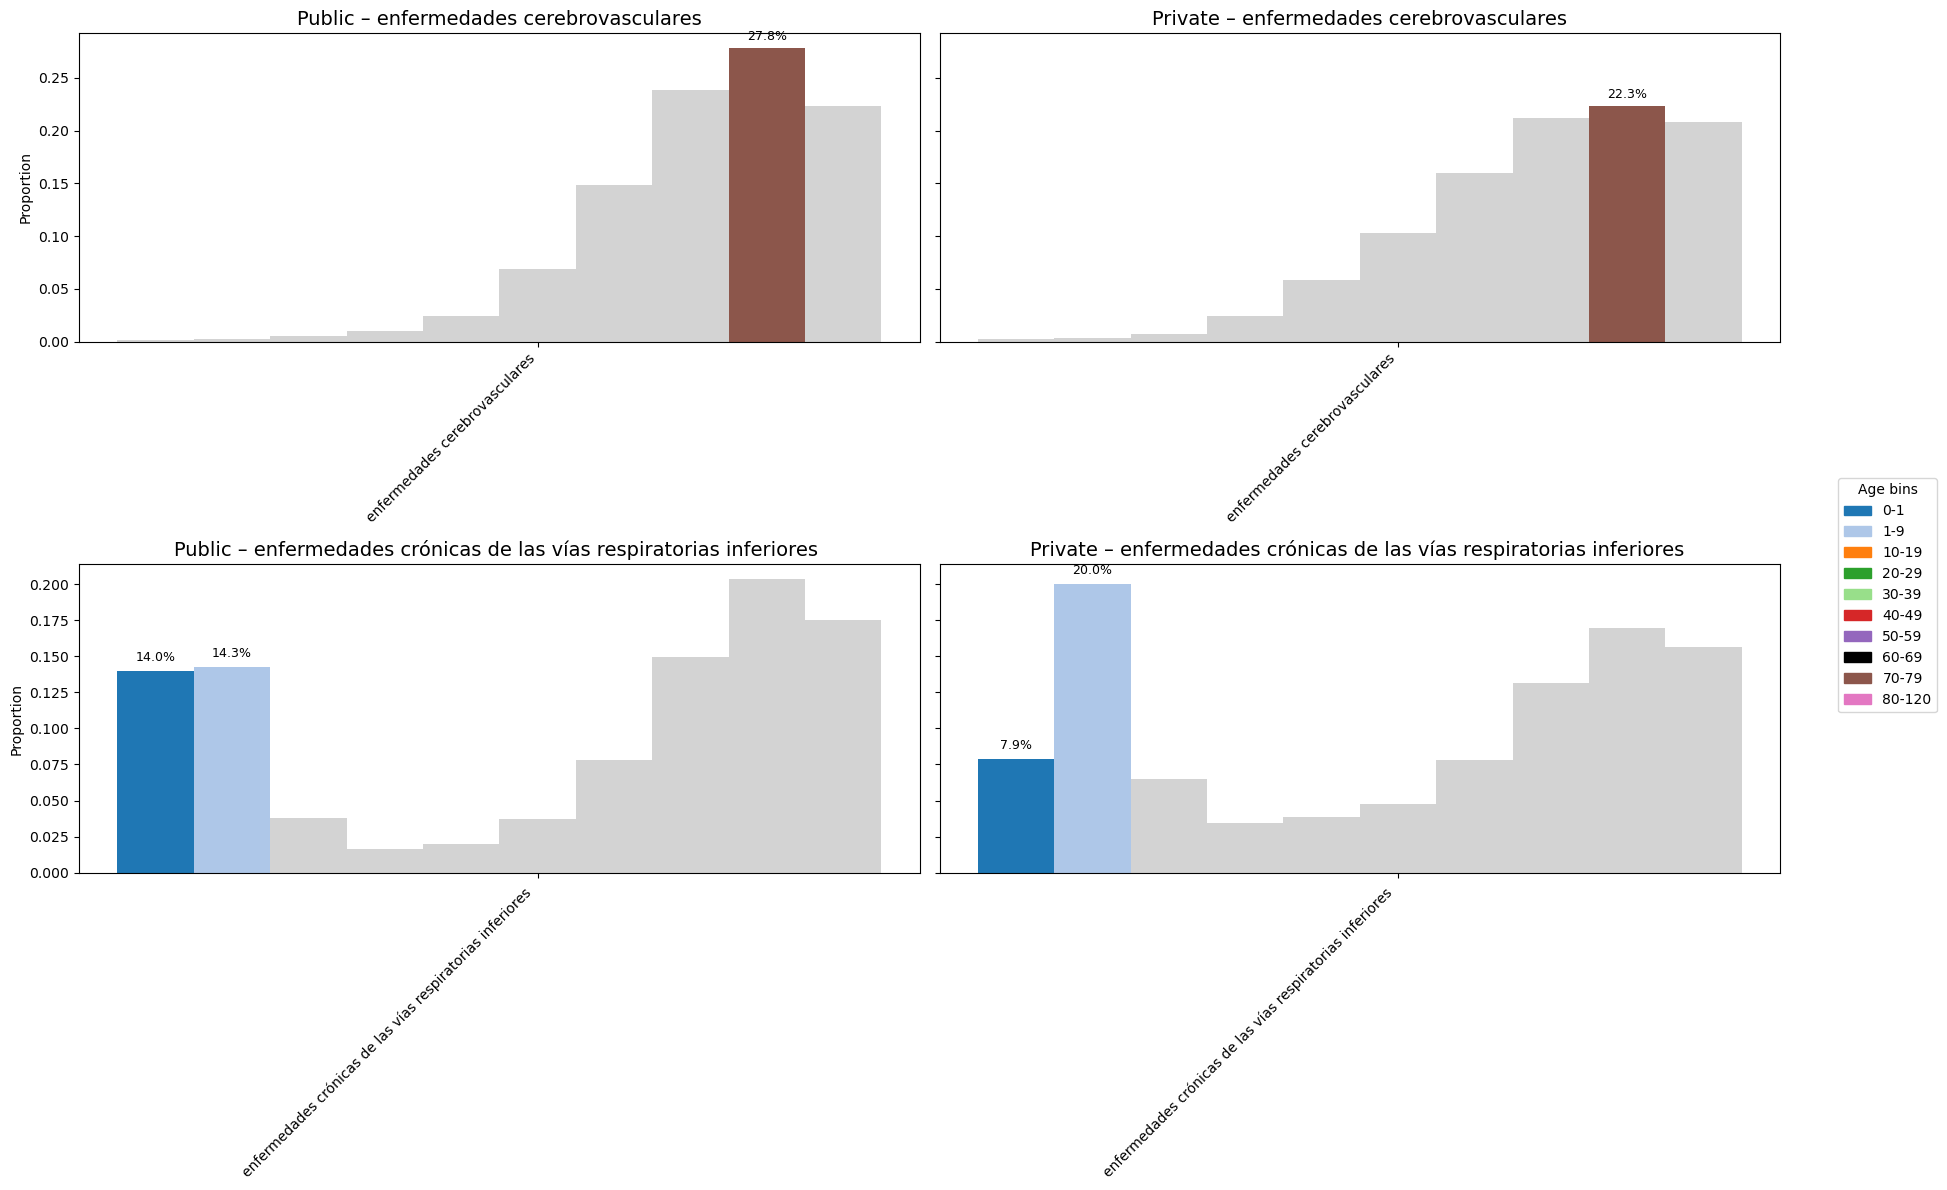

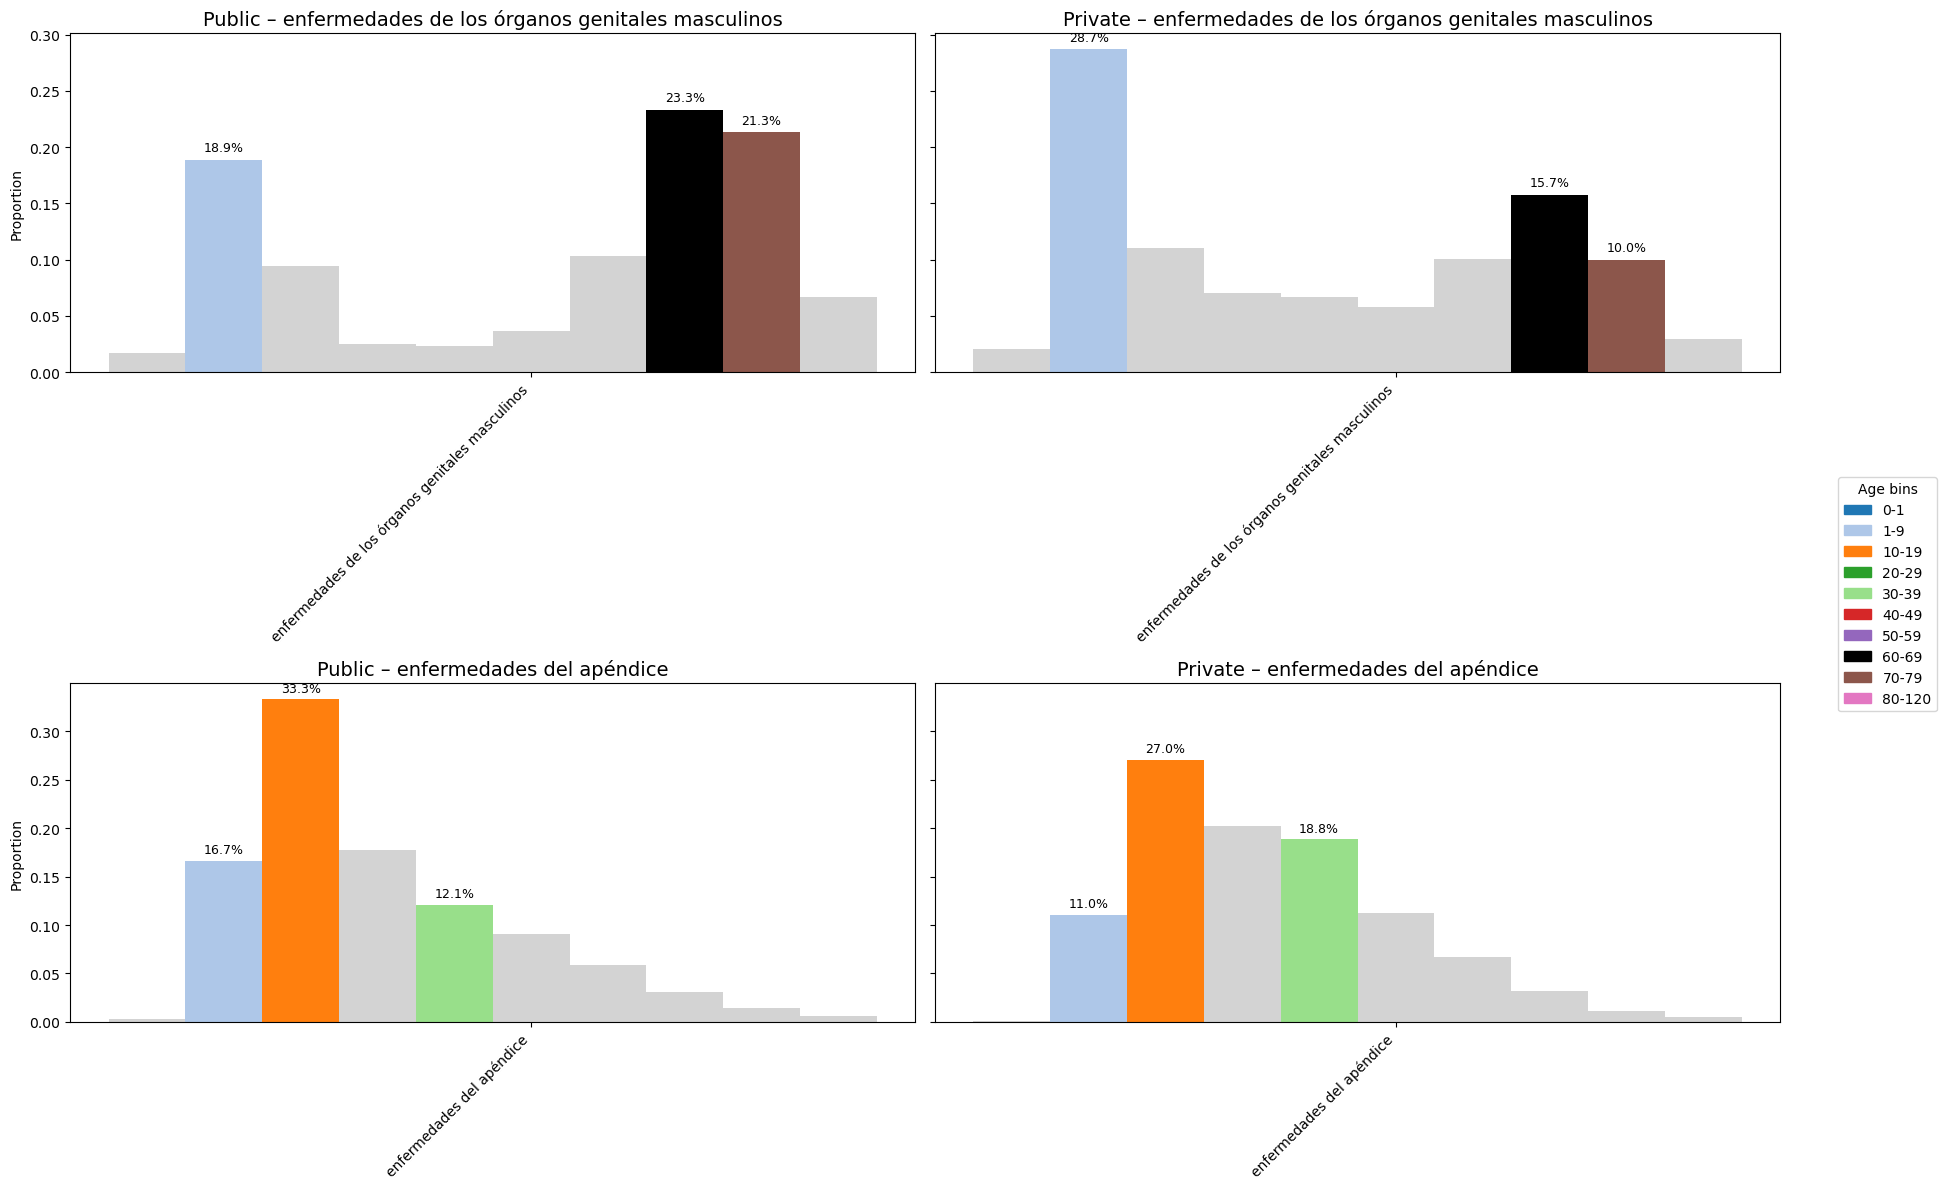

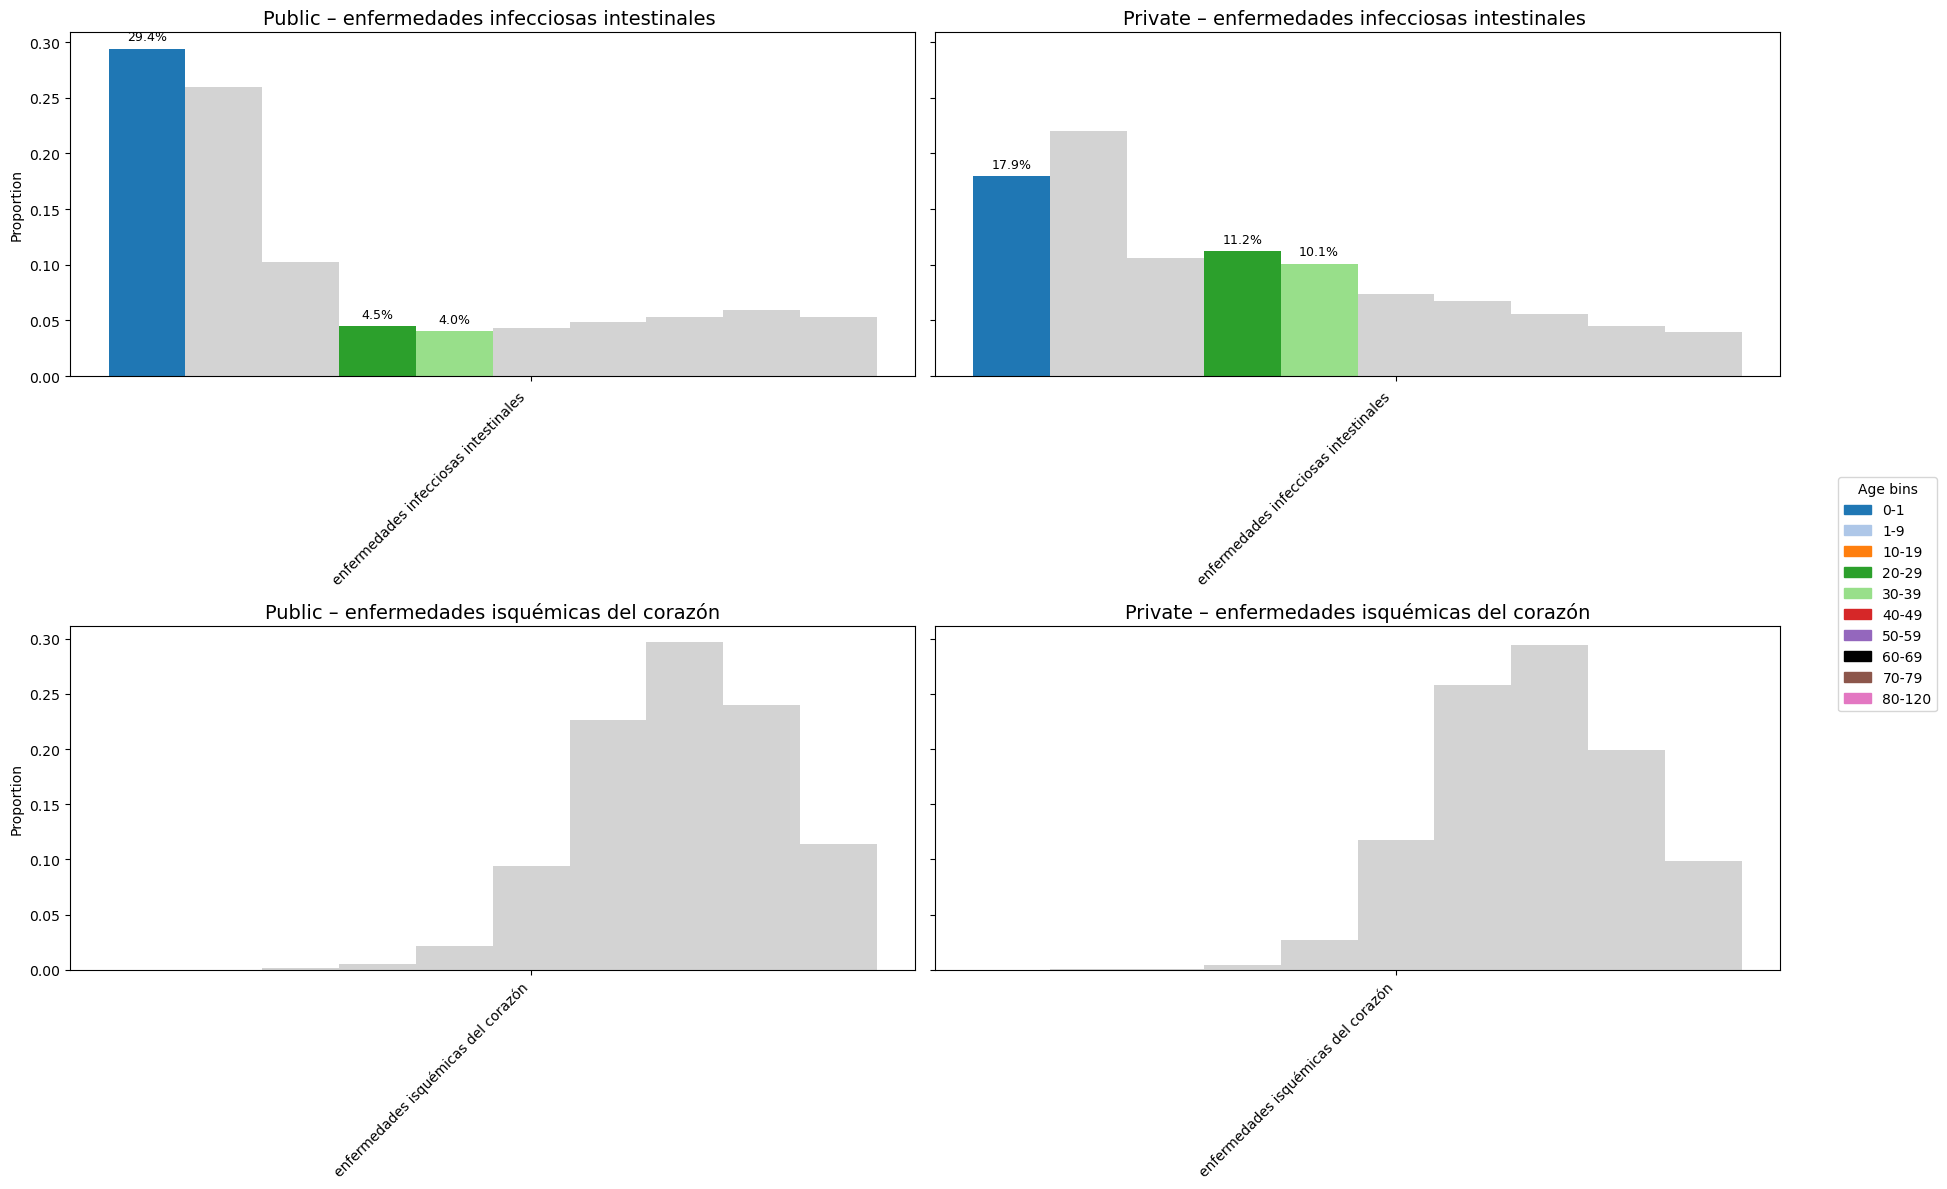

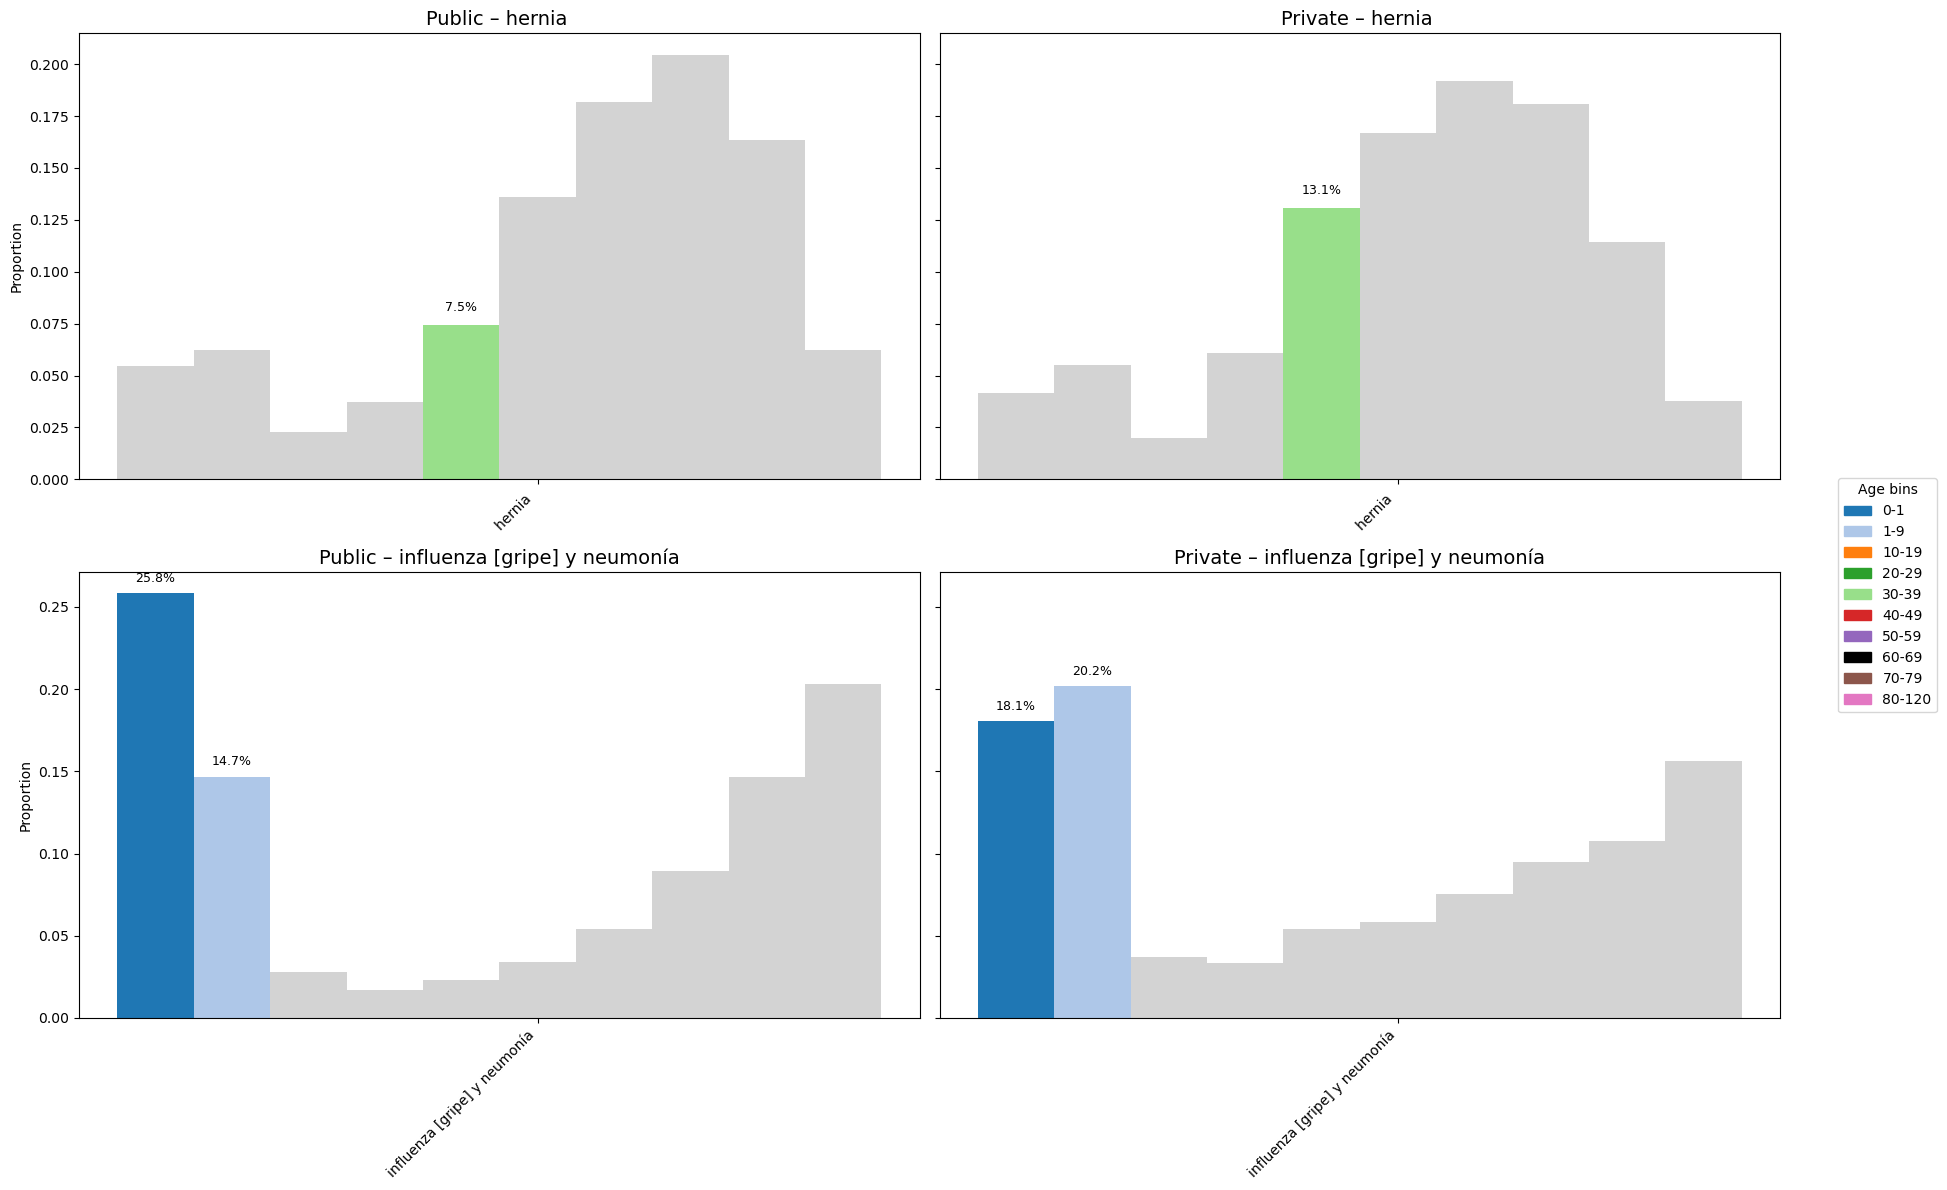

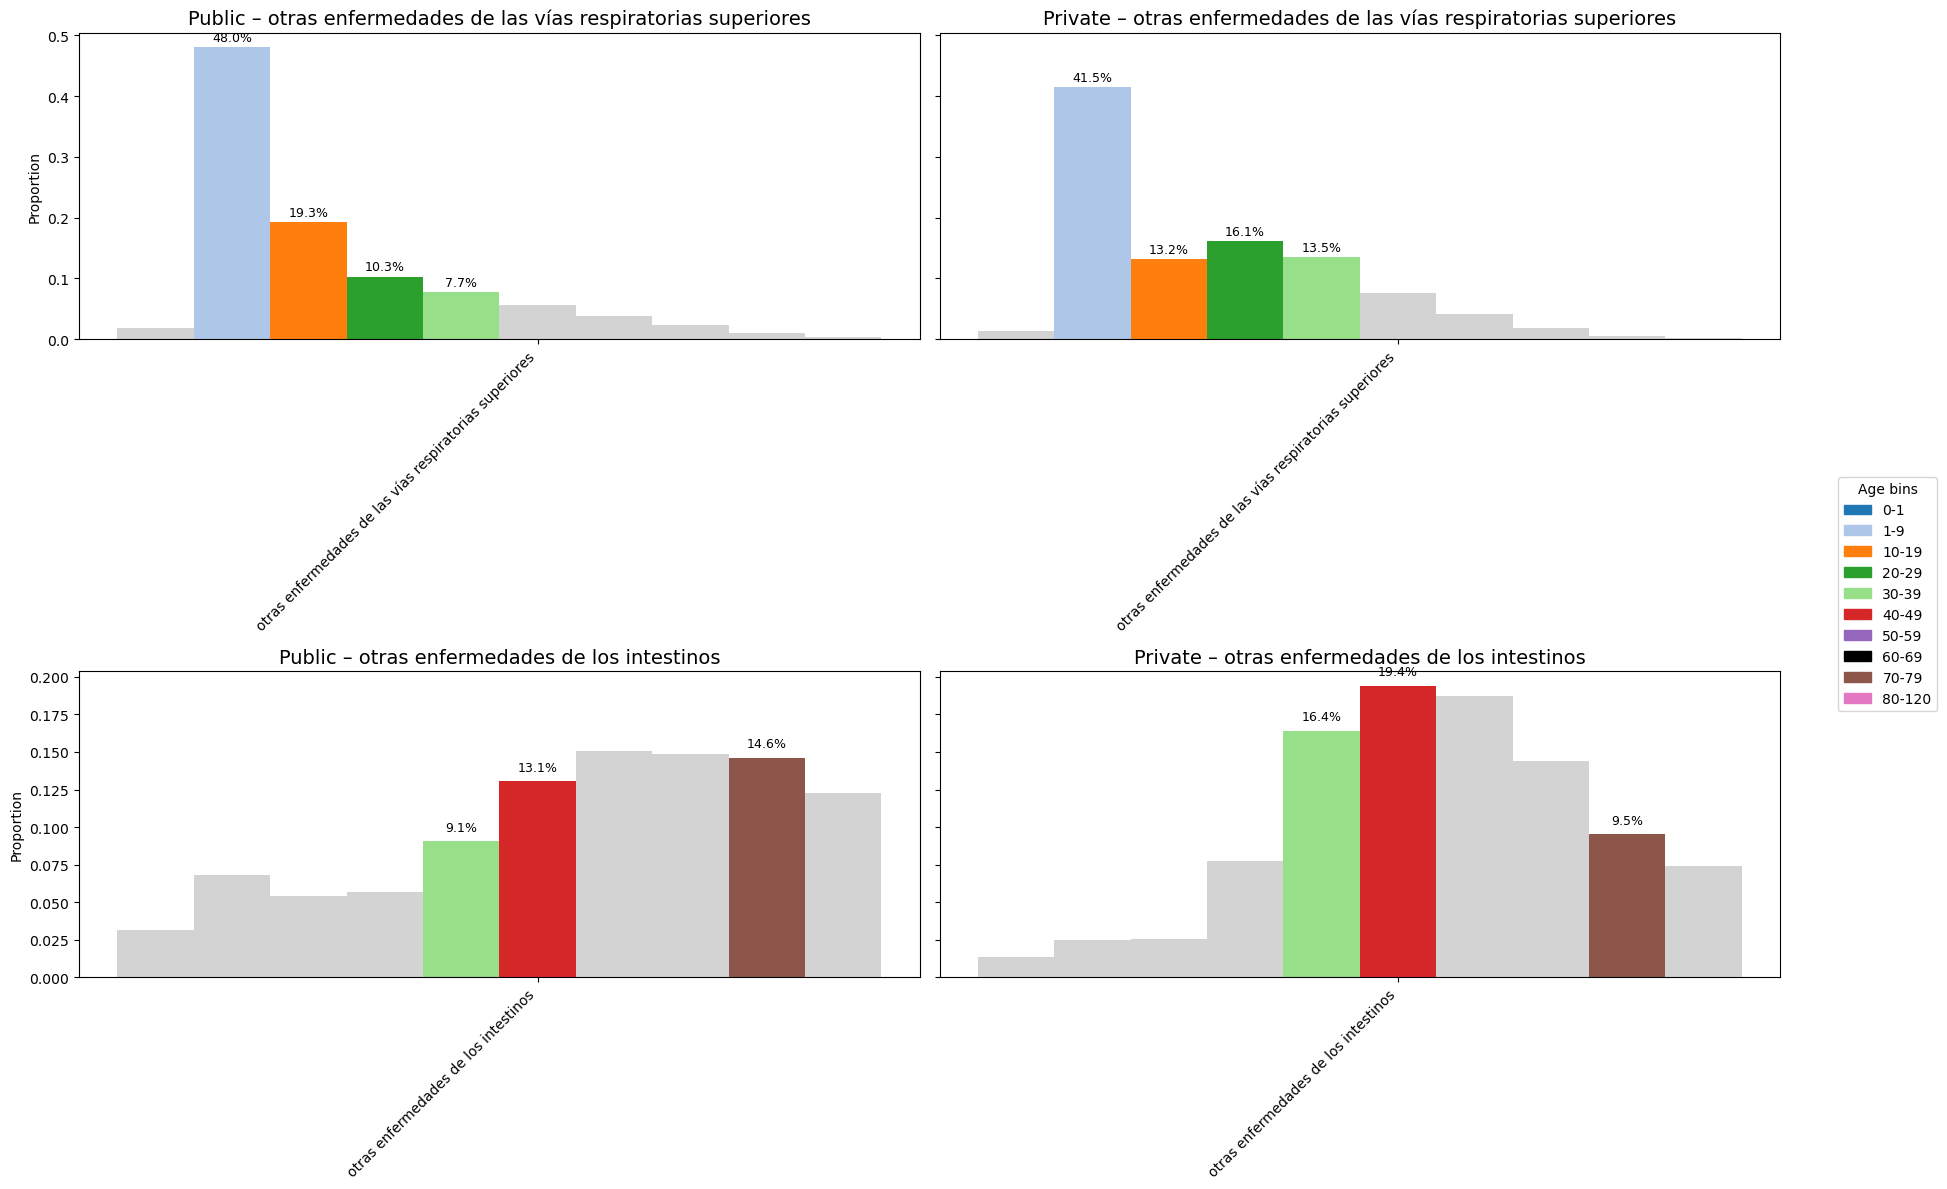

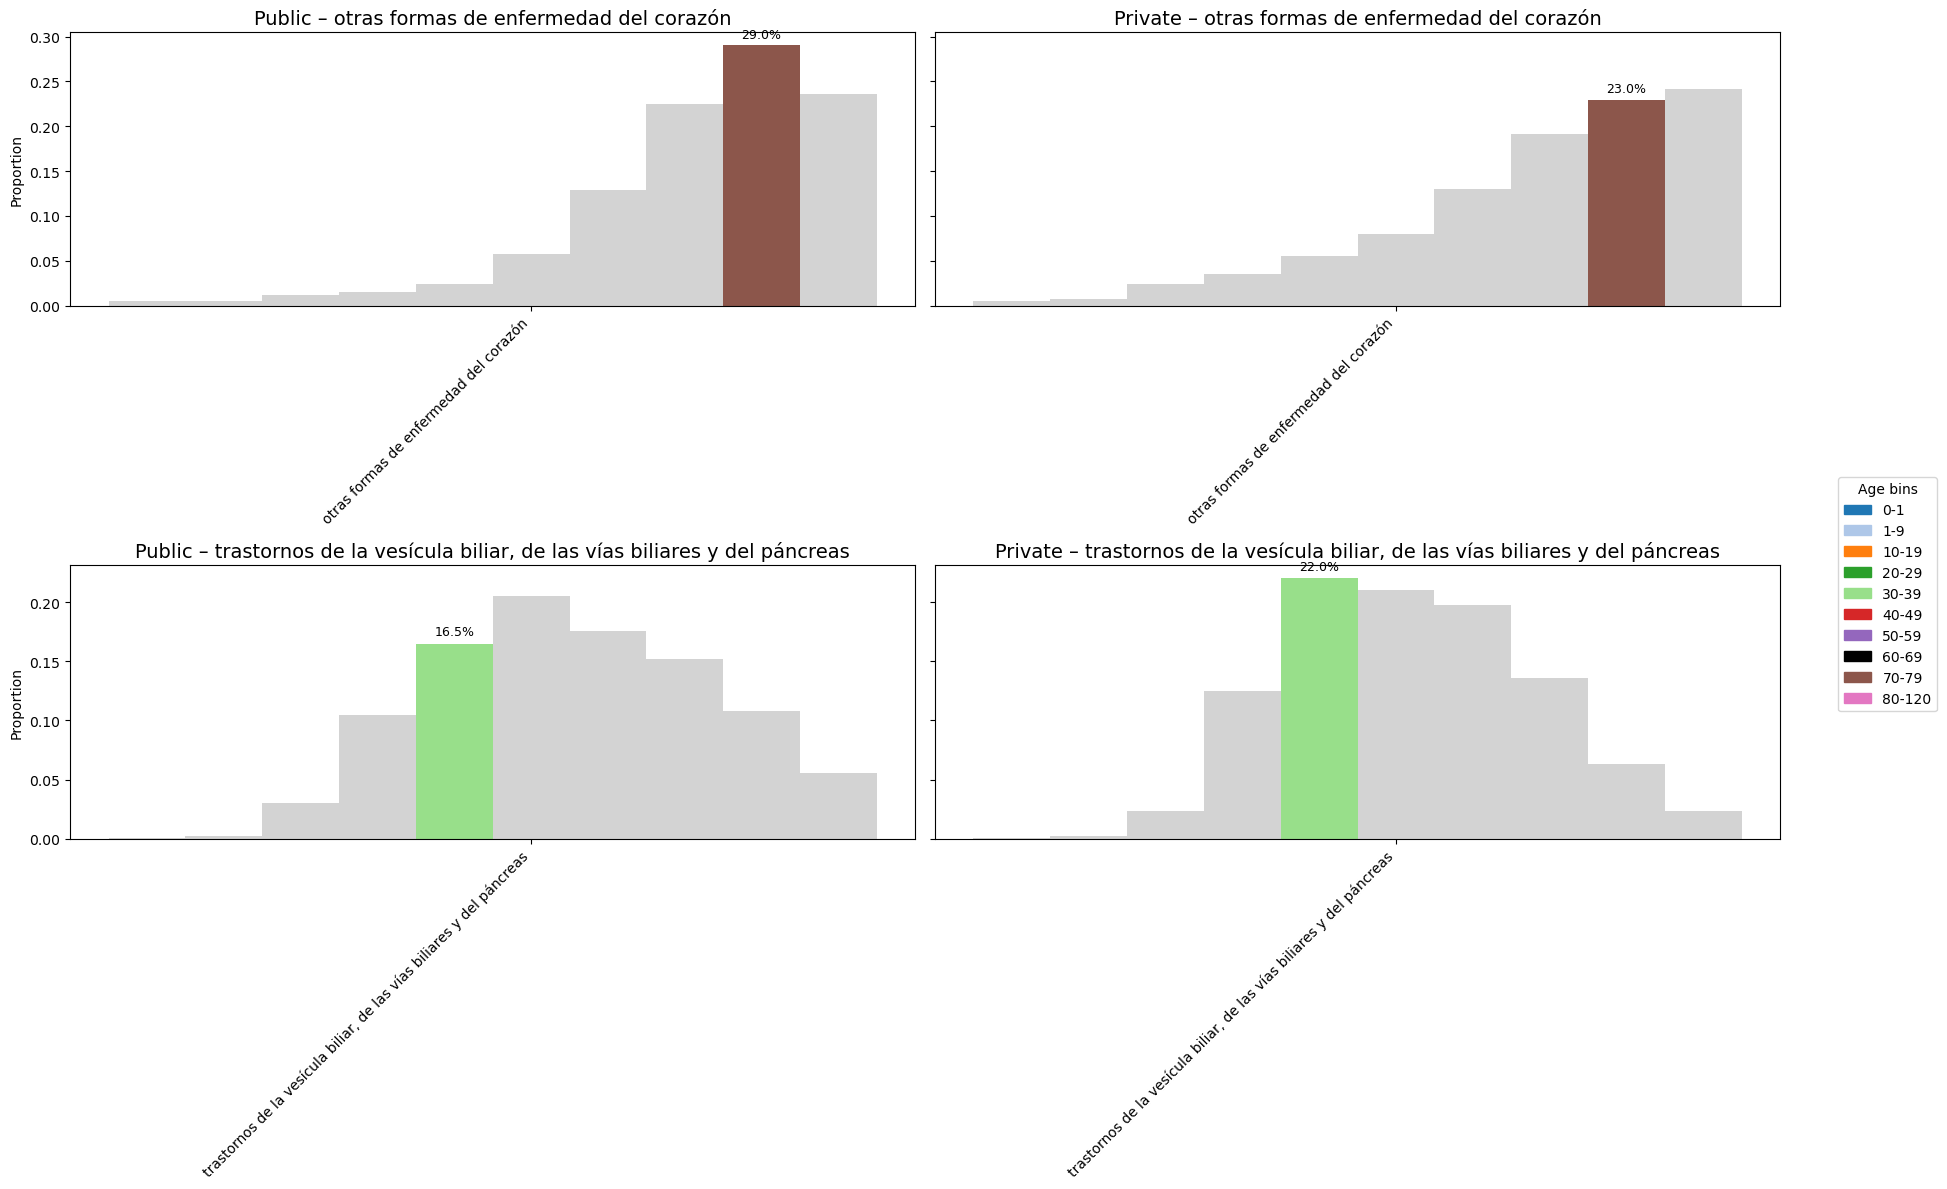

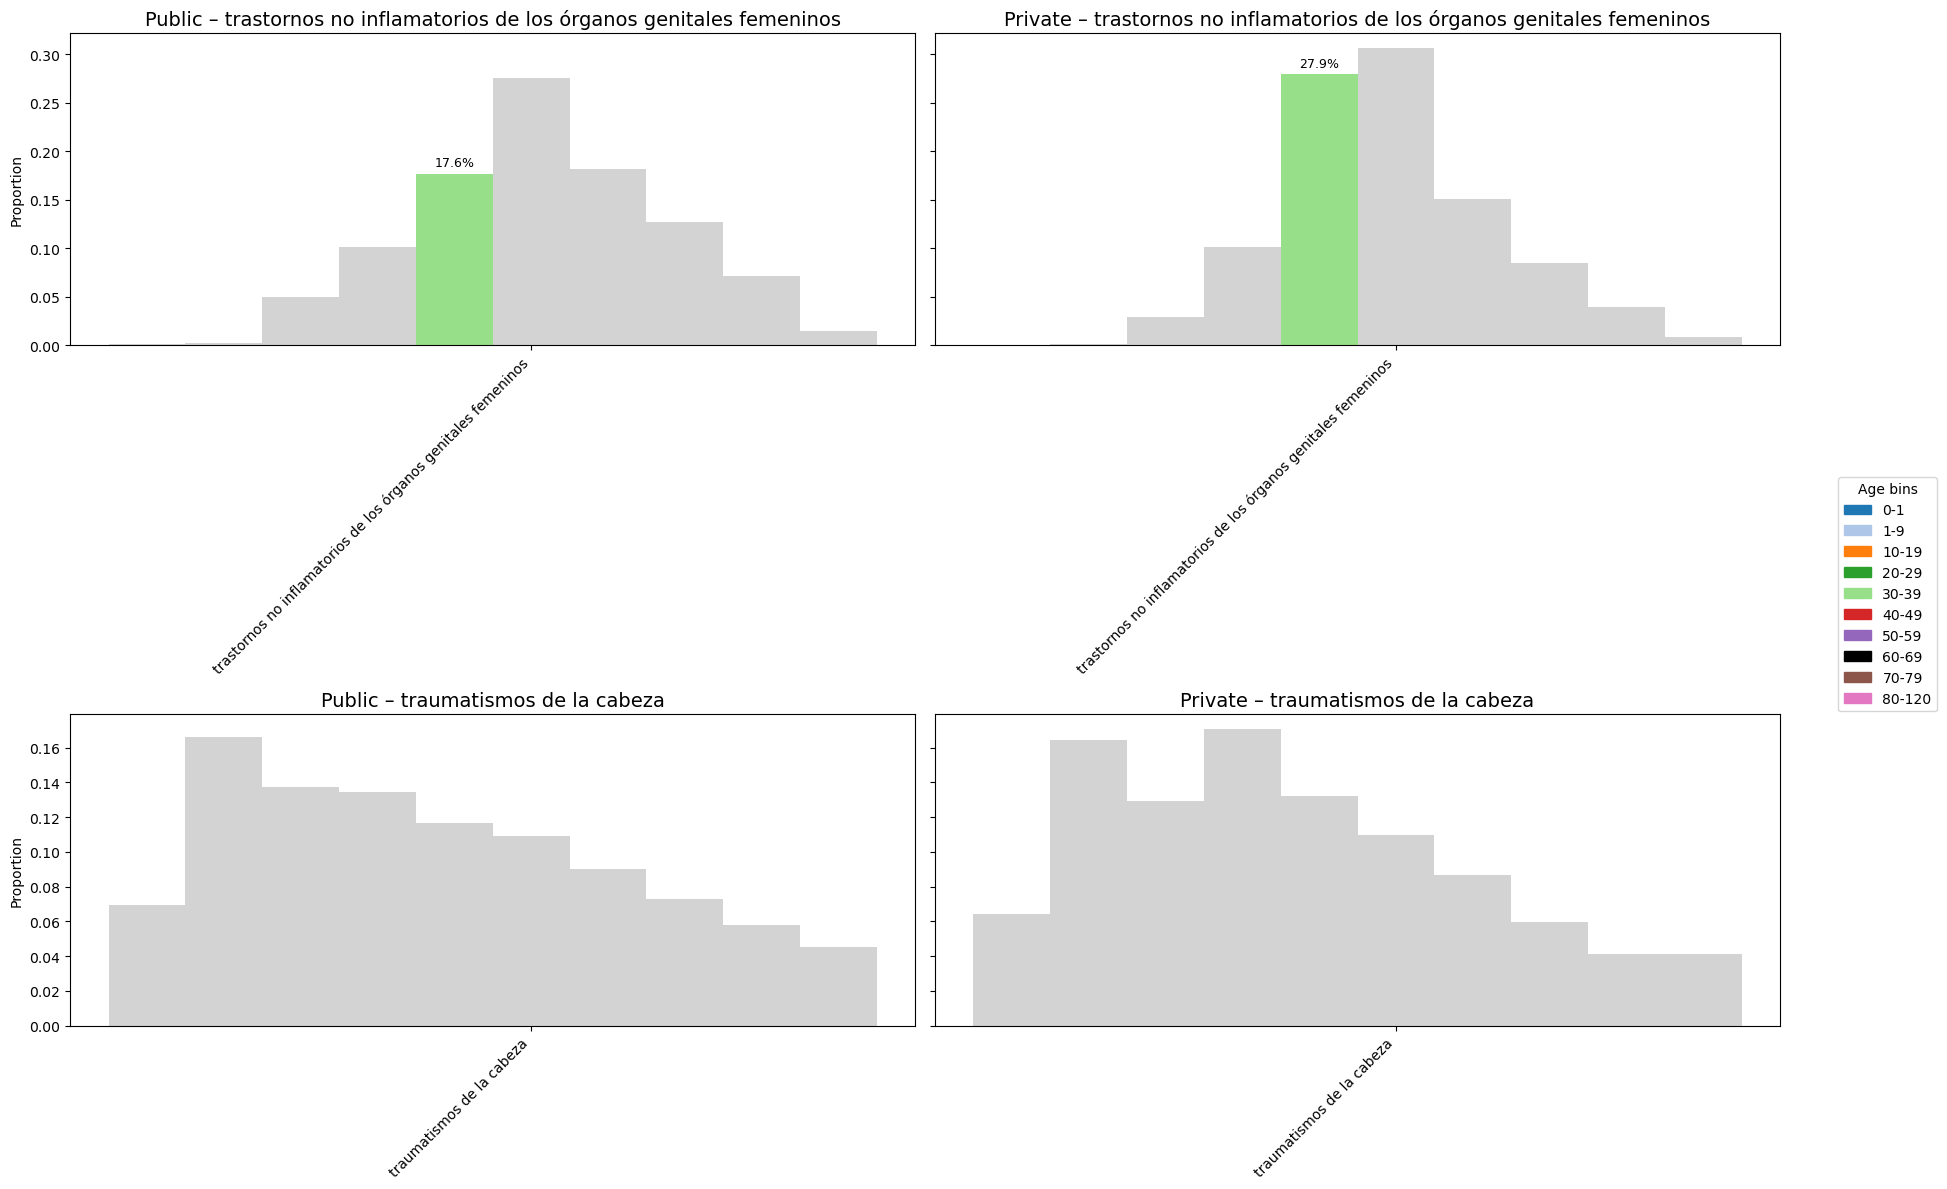

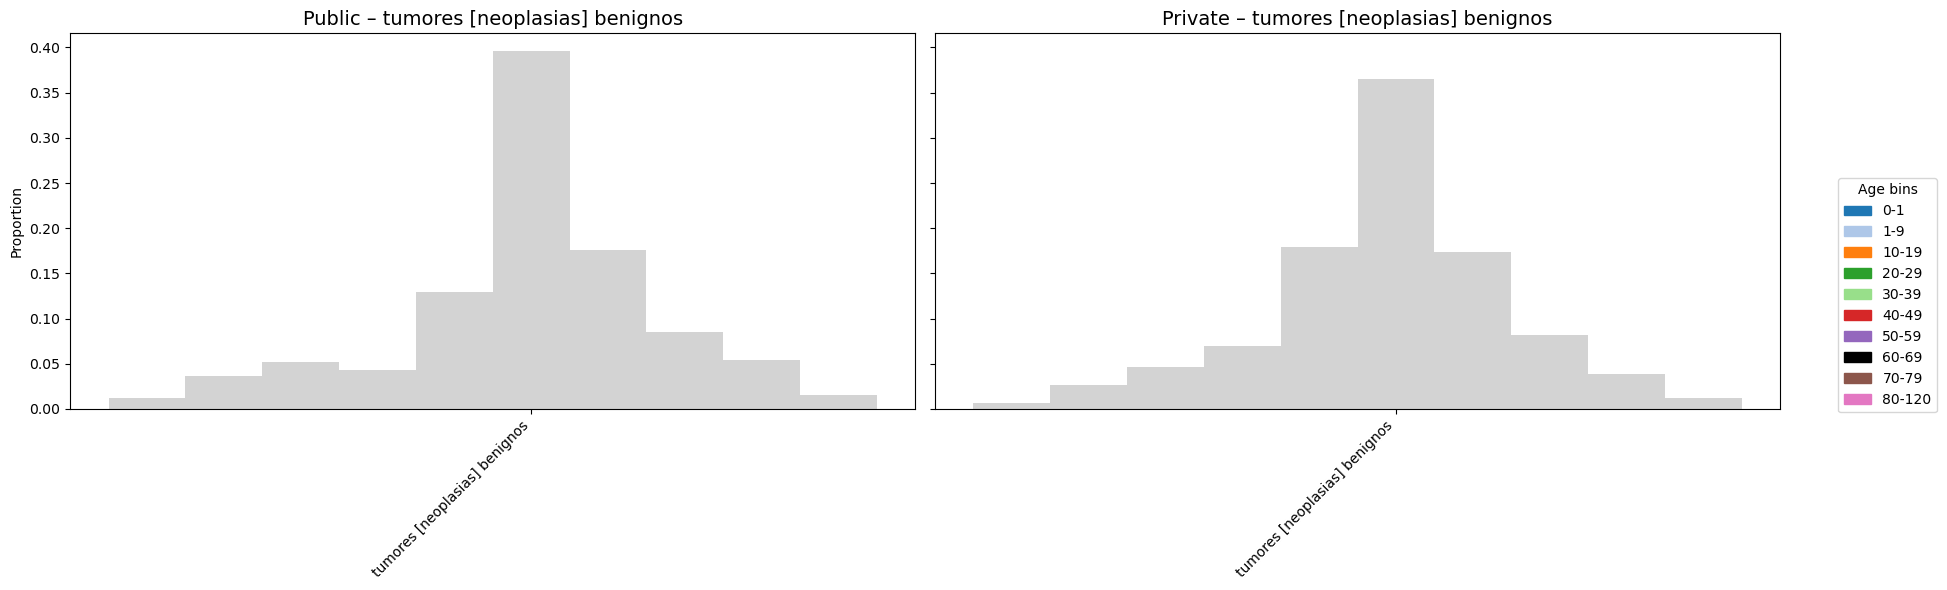

In [207]:
import matplotlib.pyplot as plt
import numpy as np

# Pivot data
public_plot = public_df.pivot(index="Diagnosis_grouped", columns="age", values="Public").fillna(0)
private_plot = private_df.pivot(index="Diagnosis_grouped", columns="age", values="Private").fillna(0)

diagnoses = list(public_plot.index)
ages = list(public_plot.columns)

# --- COLORS ---
muted_color = "lightgrey"

# Use vibrant colors from tab20 (skip grey-ish ones)
tab20 = plt.cm.tab20(np.linspace(0, 1, 20))
vibrant_indices = [i for i in range(20) if (i % 4) != 3]  # remove greys
highlight_colors = tab20[vibrant_indices][:len(ages)]

# Map: age → base highlight color
age_to_color = {age: highlight_colors[i] for i, age in enumerate(ages)}

# Force age bin 60–69 to pure black
if "60-69" in age_to_color:
    age_to_color["60-69"] = "black"

# Split diagnoses into groups of 2
pairs = [diagnoses[i:i+2] for i in range(0, len(diagnoses), 2)]

for fig_i, diag_pair in enumerate(pairs, start=1):

    n = len(diag_pair)
    fig, axes = plt.subplots(n, 2, figsize=(18, 6 * n), sharey='row')
    axes = np.atleast_2d(axes)

    for row, diag in enumerate(diag_pair):

        x = np.array([0])
        width = 0.8 / len(ages)

        pub_ax  = axes[row, 0]
        priv_ax = axes[row, 1]

        for k, age in enumerate(ages):

            pub_val  = public_plot.loc[diag, age]
            priv_val = private_plot.loc[diag, age]

            # Base highlight color for this age bin
            base_color = age_to_color[age]

            # If difference < 5 percentage points → muted grey
            diff = abs(pub_val - priv_val)
            is_highlight = diff >= 0.05
            color = base_color if is_highlight else muted_color

            # ---------------------
            #    DRAW BARS
            # ---------------------
            pub_bar = pub_ax.bar(
                x + k * width,
                pub_val,
                width=width,
                color=color
            )

            priv_bar = priv_ax.bar(
                x + k * width,
                priv_val,
                width=width,
                color=color
            )

            # ---------------------
            #   ADD ANNOTATIONS
            #   (highlight bars only)
            # ---------------------
            if is_highlight:
                # public label
                pub_ax.text(
                    x + k * width,
                    pub_val + 0.005,
                    f"{pub_val*100:.1f}%",
                    ha='center', va='bottom',
                    fontsize=9
                )

                # private label
                priv_ax.text(
                    x + k * width,
                    priv_val + 0.005,
                    f"{priv_val*100:.1f}%",
                    ha='center', va='bottom',
                    fontsize=9
                )

        # Titles, ticks
        pub_ax.set_title(f"Public – {diag}", fontsize=14)
        priv_ax.set_title(f"Private – {diag}", fontsize=14)

        pub_ax.set_xticks([0.4])
        priv_ax.set_xticks([0.4])
        pub_ax.set_xticklabels([diag], rotation=45, ha='right')
        priv_ax.set_xticklabels([diag], rotation=45, ha='right')

        pub_ax.set_ylabel("Proportion")
        priv_ax.set_ylim(pub_ax.get_ylim())

    # Legend uses highlight colors (not muted)
    legend_handles = [plt.Rectangle((0,0),1,1,color=age_to_color[age]) for age in ages]
    fig.legend(legend_handles, ages, title="Age bins", loc="center left",
               bbox_to_anchor=(1.02, 0.5))

    plt.tight_layout()
    plt.show()


# 5. TABLE 3 — LOS Summary by Age × Facility Type × Diagnosis

In [213]:
import pandas as pd

# -------------------------------------------
# REQUIRED COLUMNS IN YOUR DATA
# top15_df must contain:
#   "Diagnosis_grouped"
#   "age"
#   "healthcare facility type"  -> "Public" / "Private"
#   "LOS"
# -------------------------------------------

# Function to compute Median and IQR
def summarize_los(group):
    median = group["LOS_capped"].median()
    q1 = group["LOS_capped"].quantile(0.25)
    q3 = group["LOS_capped"].quantile(0.75)
    iqr = q3 - q1
    return pd.Series({
        "Median_LOS": median,
        "IQR": iqr
    })

# Compute summary by Dx × Age × Facility
summary = (
    top15_df
    .groupby(["Diagnosis_grouped", "age", "healthcare facility type"])
    .apply(summarize_los)
    .reset_index()
)

# Pivot so Public and Private appear as columns
table3 = summary.pivot_table(
    index=["Diagnosis_grouped", "age"],
    columns="healthcare facility type",
    values=["Median_LOS", "IQR"],
    aggfunc="first"
)

table3 = table3.reset_index()

# OPTIONAL: Flatten column names for easier reading
table3.columns = [
    f"{metric}_{facility}" if facility else metric
    for metric, facility in table3.columns
]

# Add Difference Column (Median LOS Public - Private)
table3["Difference_Median_LOS"] = (
    table3["Median_LOS_Public"] - table3["Median_LOS_Private"]
)

# Final table ready for reporting
table3


C:\Users\mirko\AppData\Local\Temp\ipykernel_19400\806088581.py:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["Diagnosis_grouped", "age", "healthcare facility type"])
C:\Users\mirko\AppData\Local\Temp\ipykernel_19400\806088581.py:27: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(summarize_los)
C:\Users\mirko\AppData\Local\Temp\ipykernel_19400\806088581.py:32: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Sp

Diagnosis_grouped     age  IQR_Private  IQR_Public  \
0    enfermedades cerebrovasculares     0-1          9.0        17.0   
1    enfermedades cerebrovasculares     1-9          9.0        10.0   
2    enfermedades cerebrovasculares   10-19          8.0        12.0   
3    enfermedades cerebrovasculares   20-29          8.0        13.0   
4    enfermedades cerebrovasculares   30-39          7.0        12.0   
..                              ...     ...          ...         ...   
145   tumores [neoplasias] benignos   40-49          1.0         2.0   
146   tumores [neoplasias] benignos   50-59          2.0         3.0   
147   tumores [neoplasias] benignos   60-69          2.0         5.0   
148   tumores [neoplasias] benignos   70-79          3.0         6.0   
149   tumores [neoplasias] benignos  80-120          3.0         7.0   

     Median_LOS_Private  Median_LOS_Public  Difference_Median_LOS  
0                   4.0                7.0                    3.0  
1                   4.0                5.0                    1.0  
2                   4.0                6.0                    2.0  
3                   5.0                7.0                    2.0  
4                   5.0                7.0                    2.0  
..                  ...                ...                    ...  
145                 2.0                3.0                    1.0  
146                 2.0                3.0                    1.0  
147                 2.0                4.0                    2.0  
148                 2.0                4.0                    2.0  
149                 2.0                5.0                    3.0  

[150 rows x 7 columns]

# 6. VISUAL 2 — Boxplots or Violin Plots (Age-Controlled LOS)

# Marcar boxplots que denotan diferencias en eficiencia de alguna forma

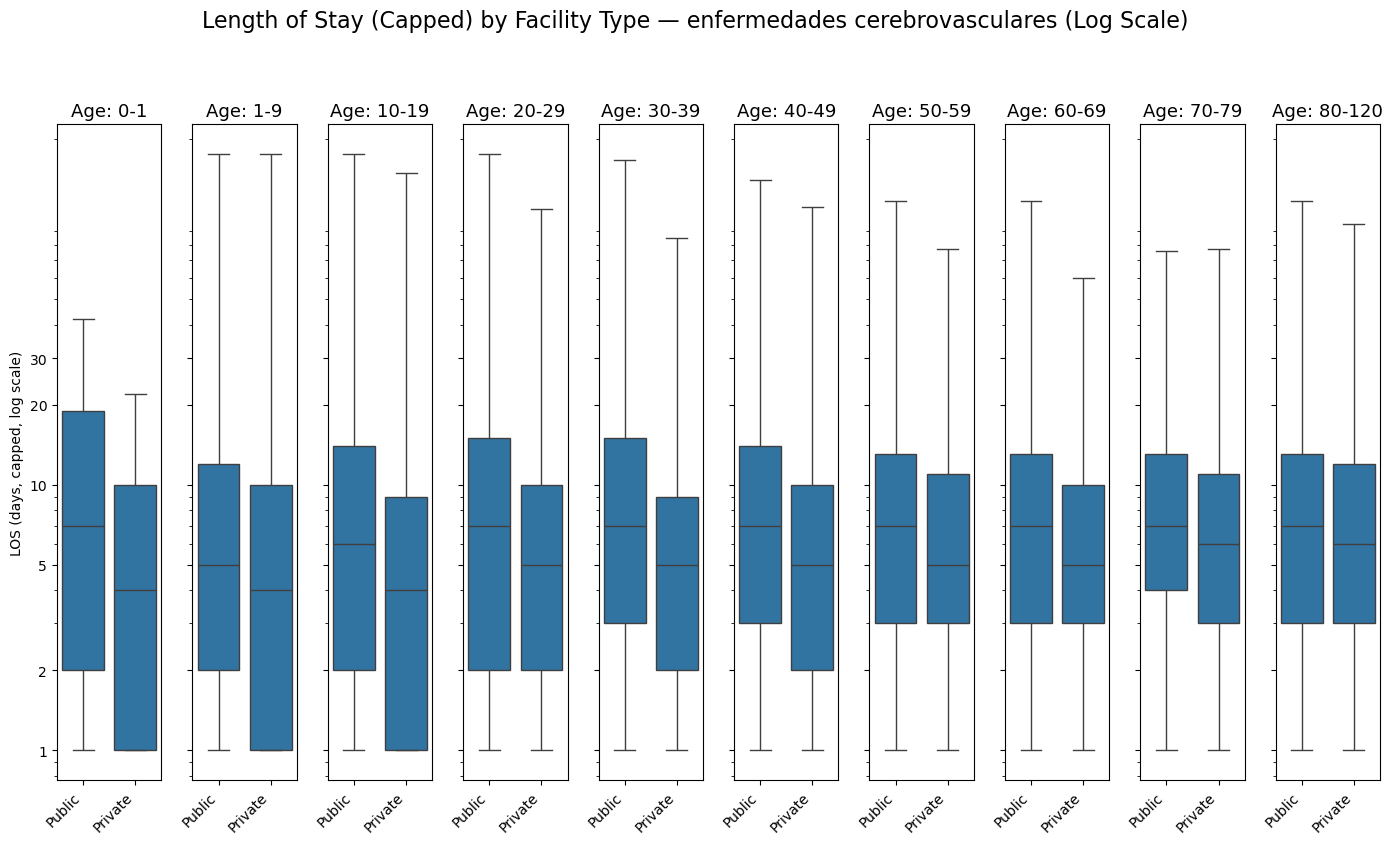

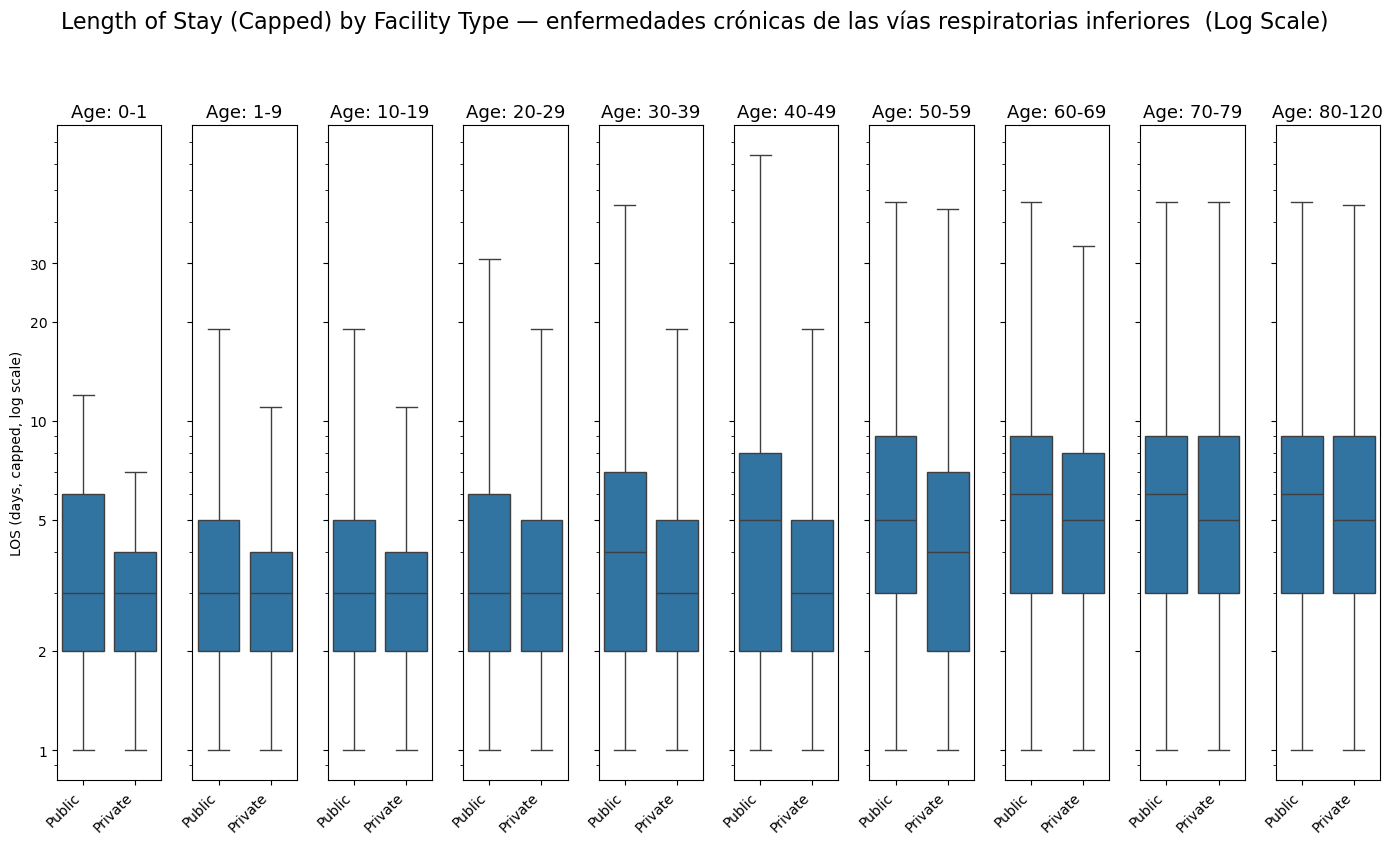

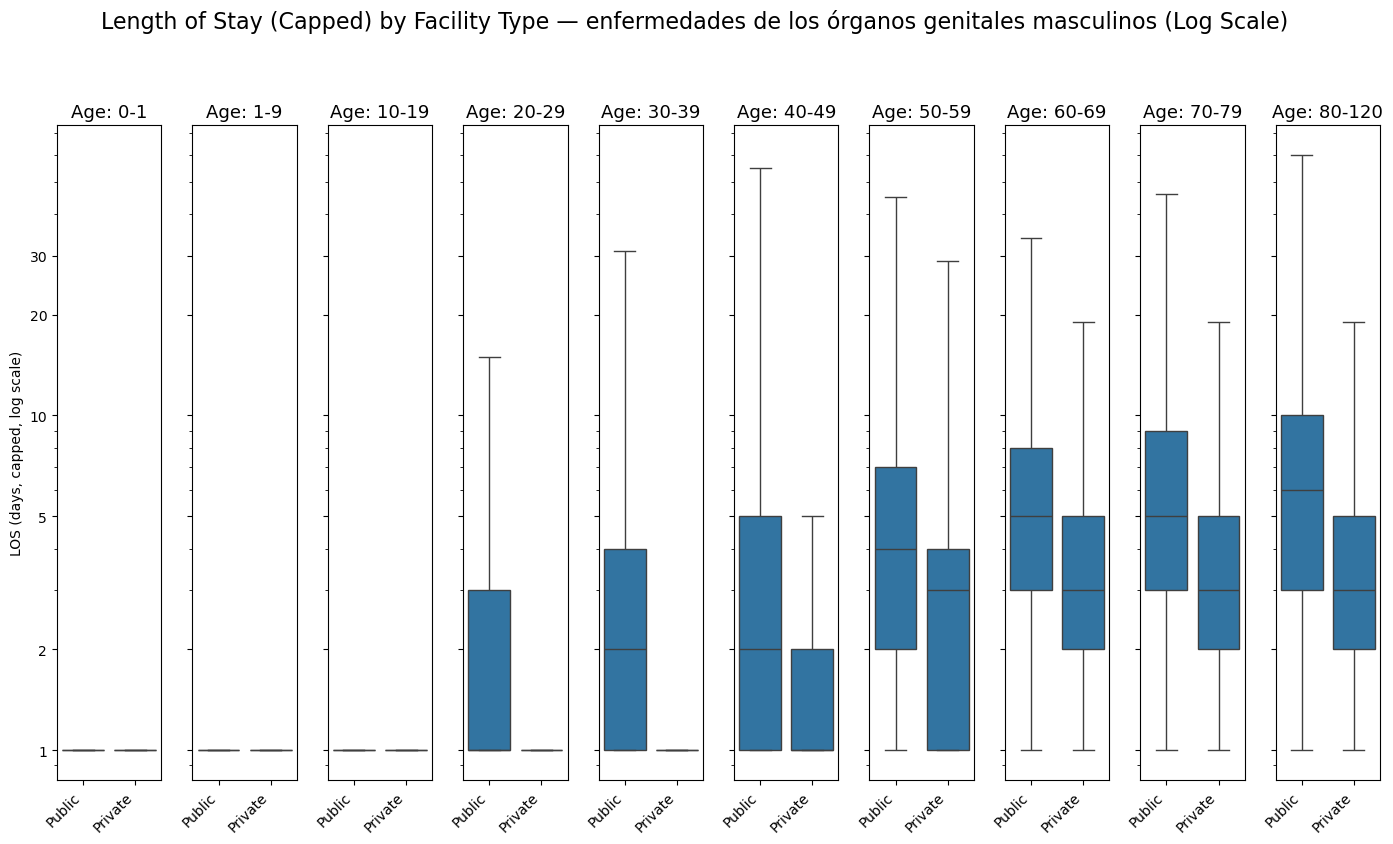

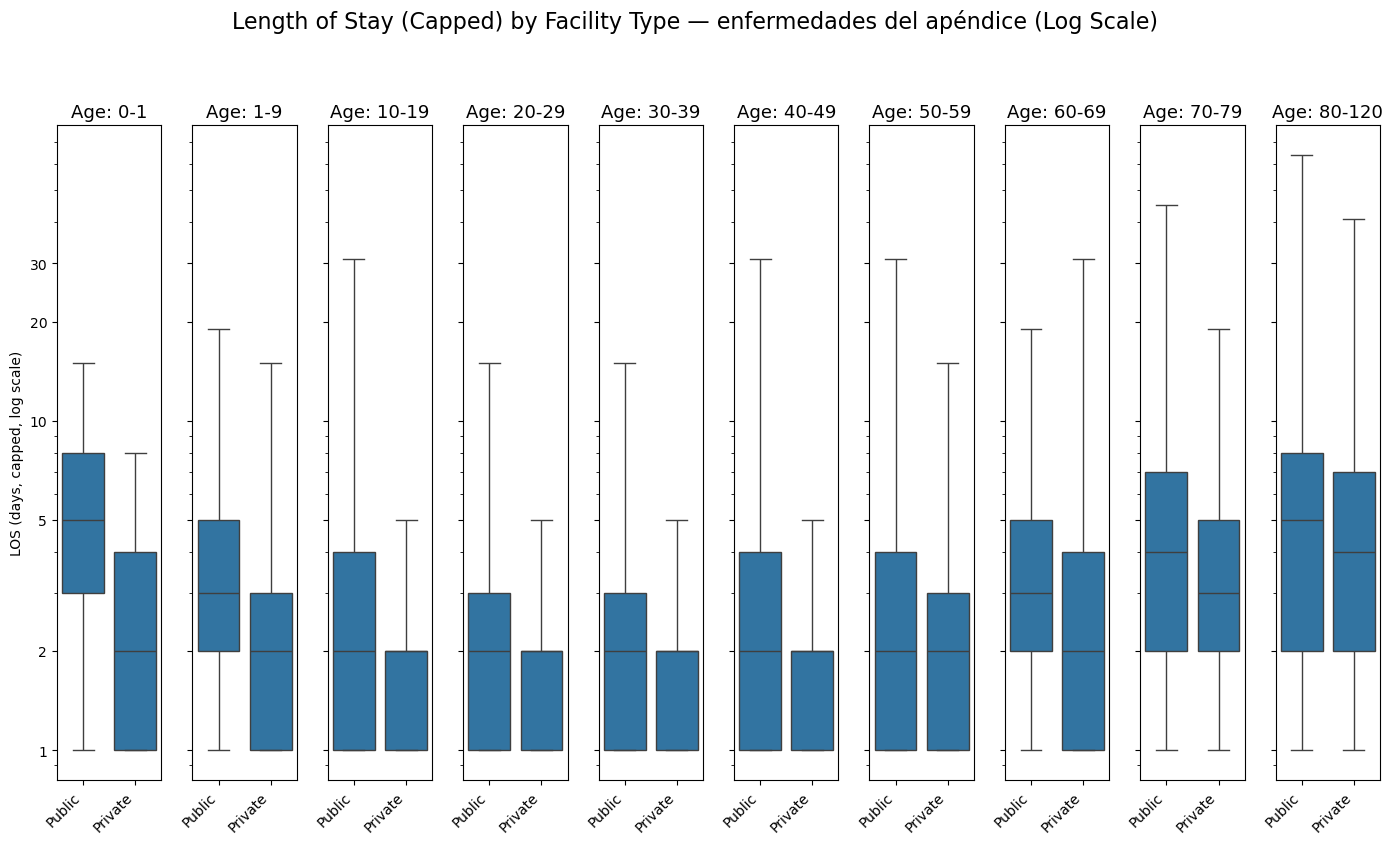

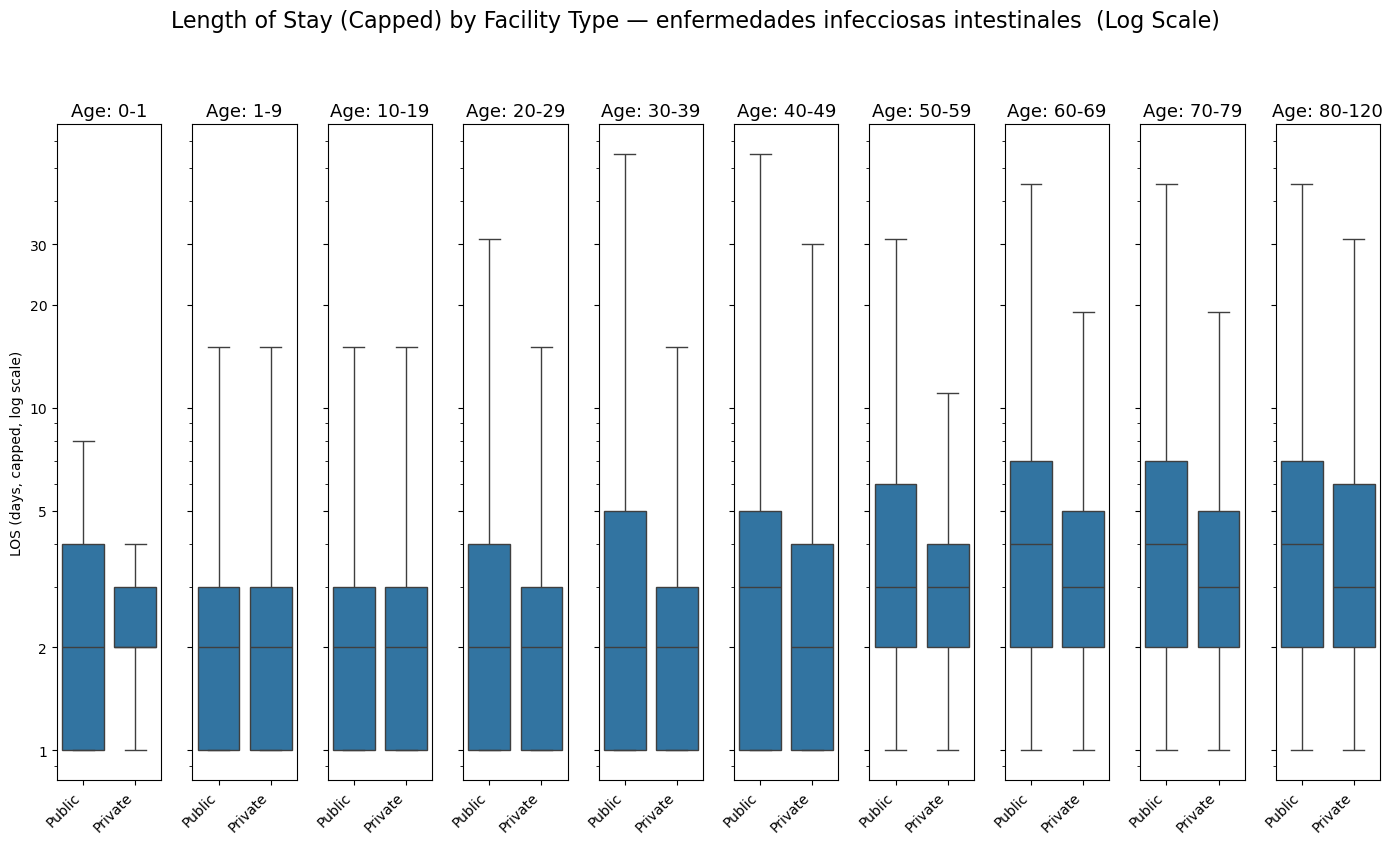

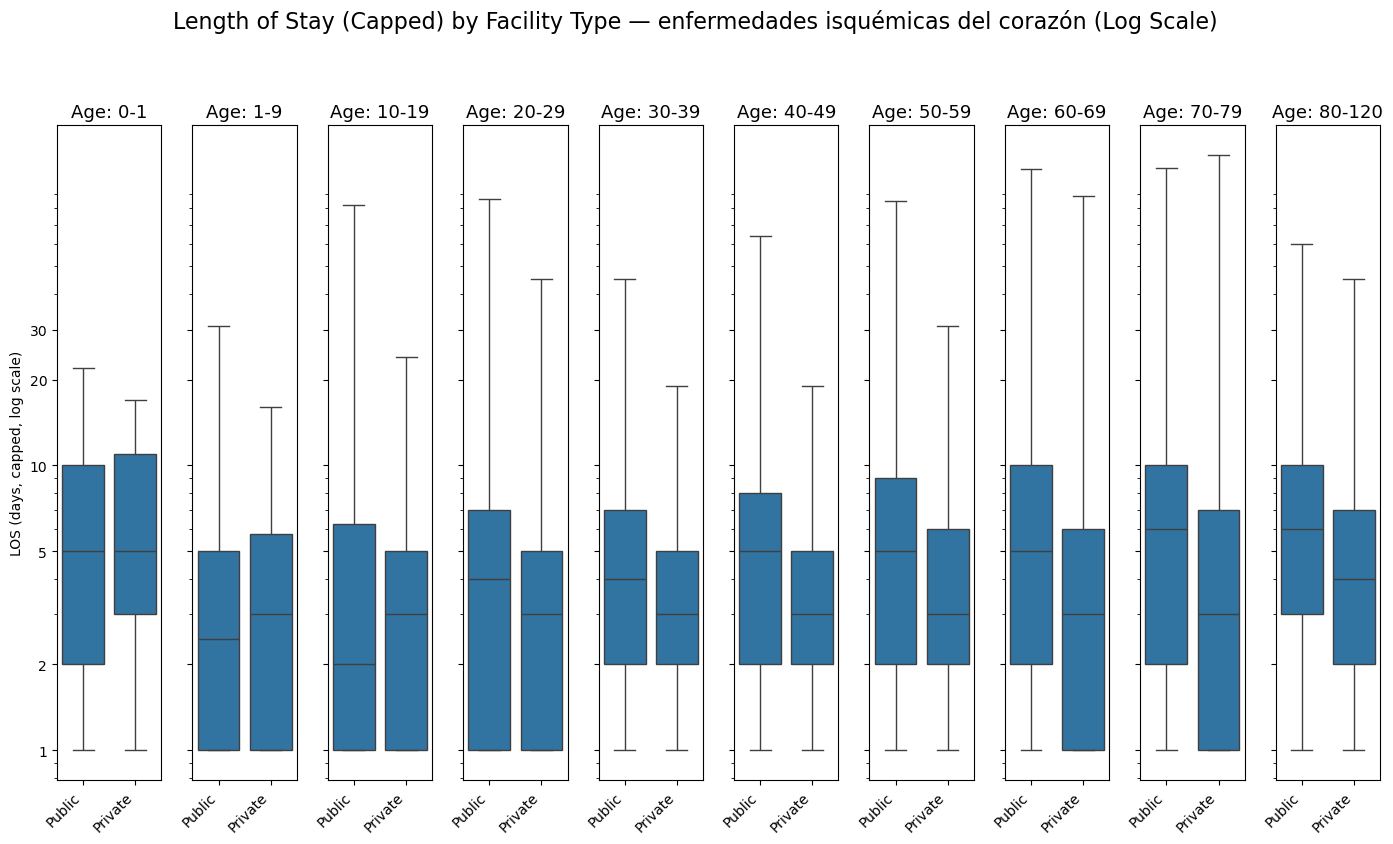

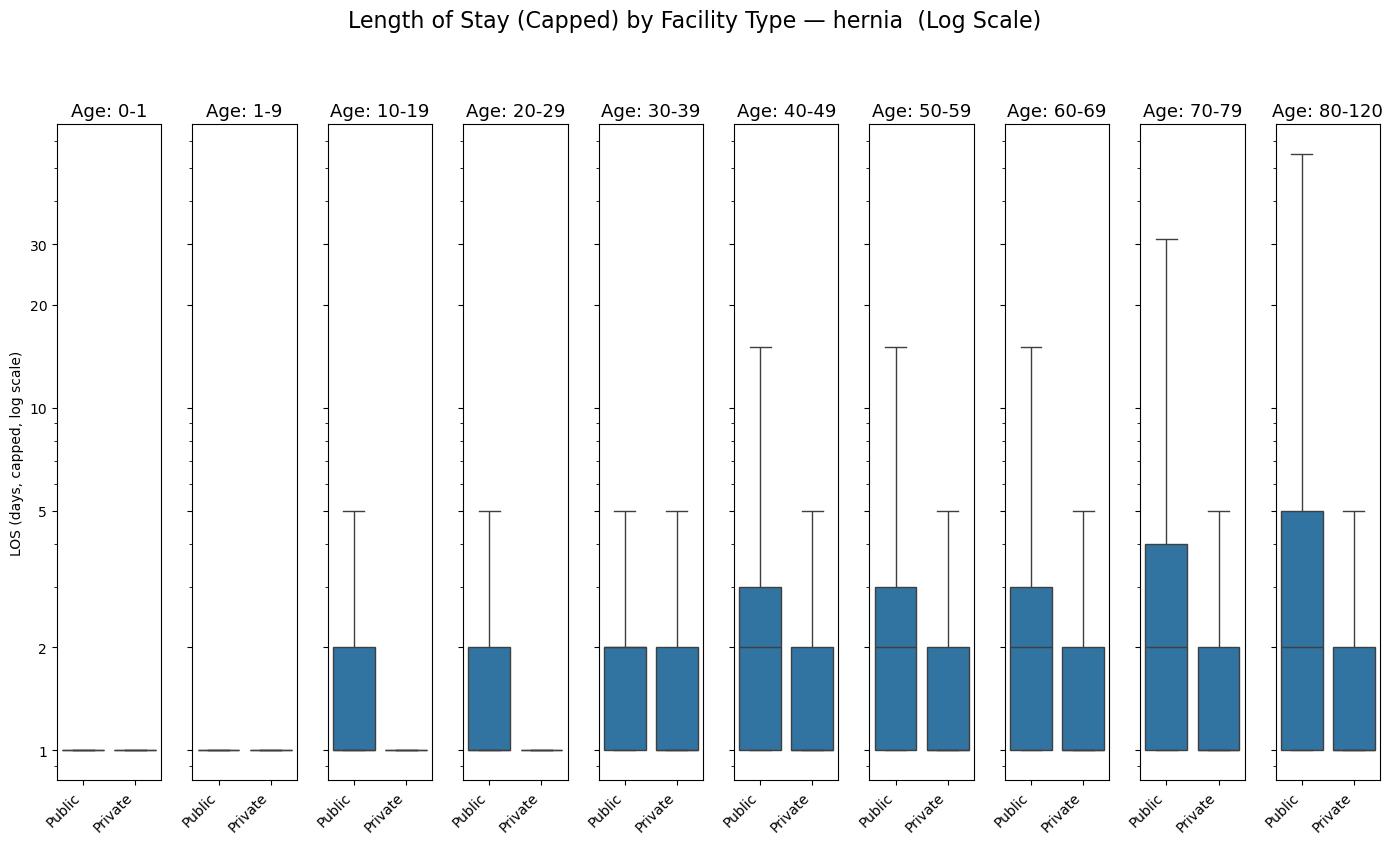

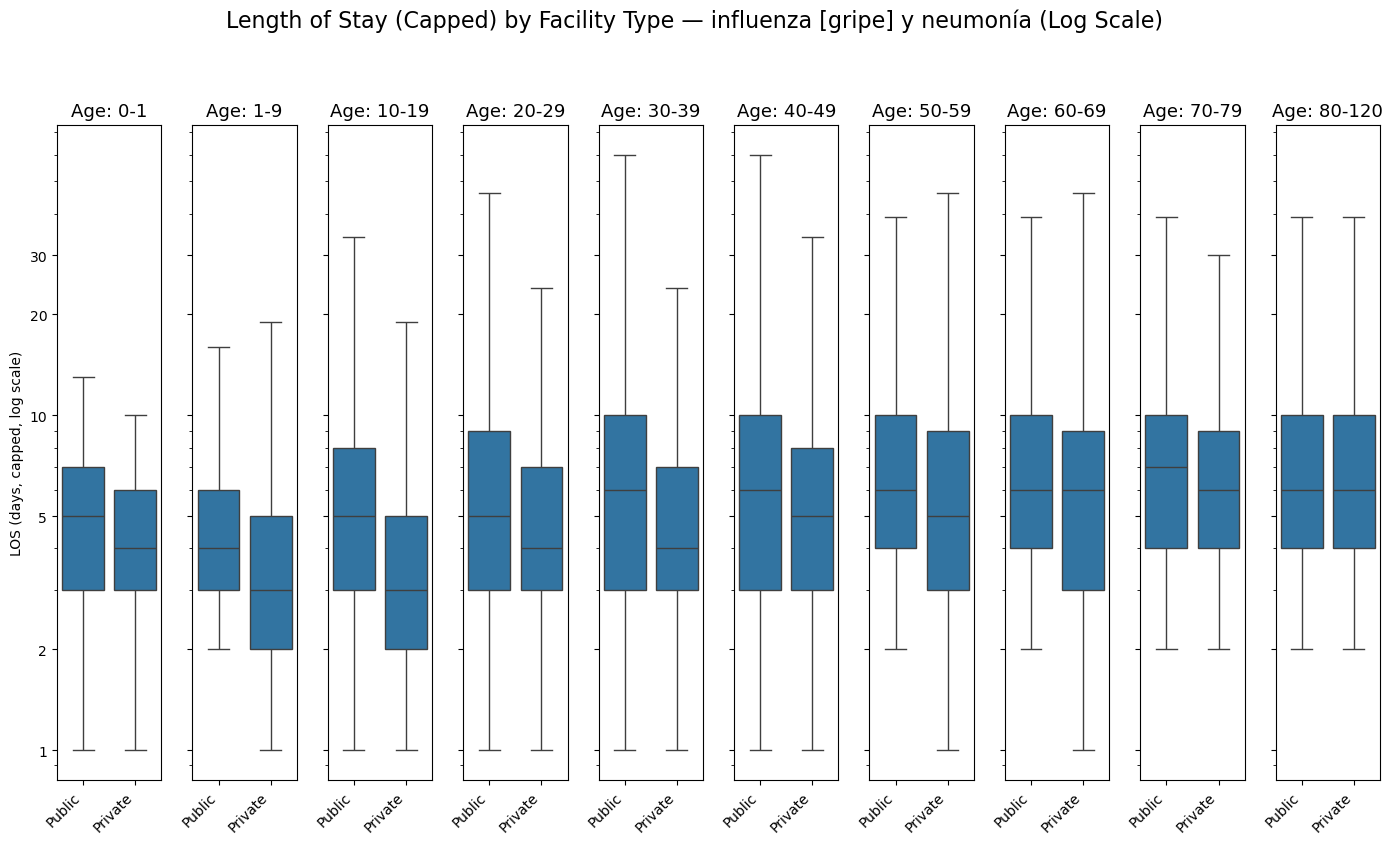

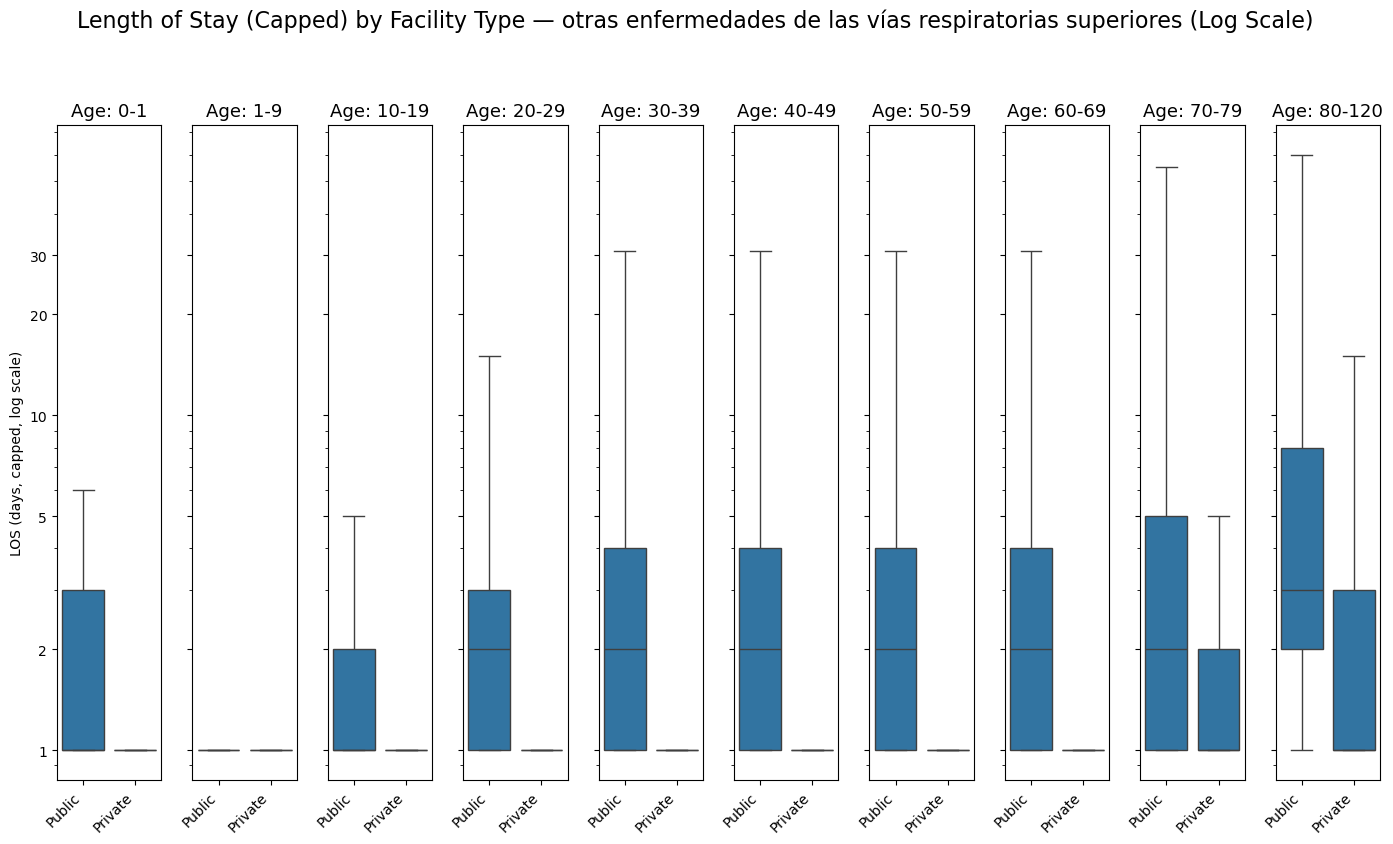

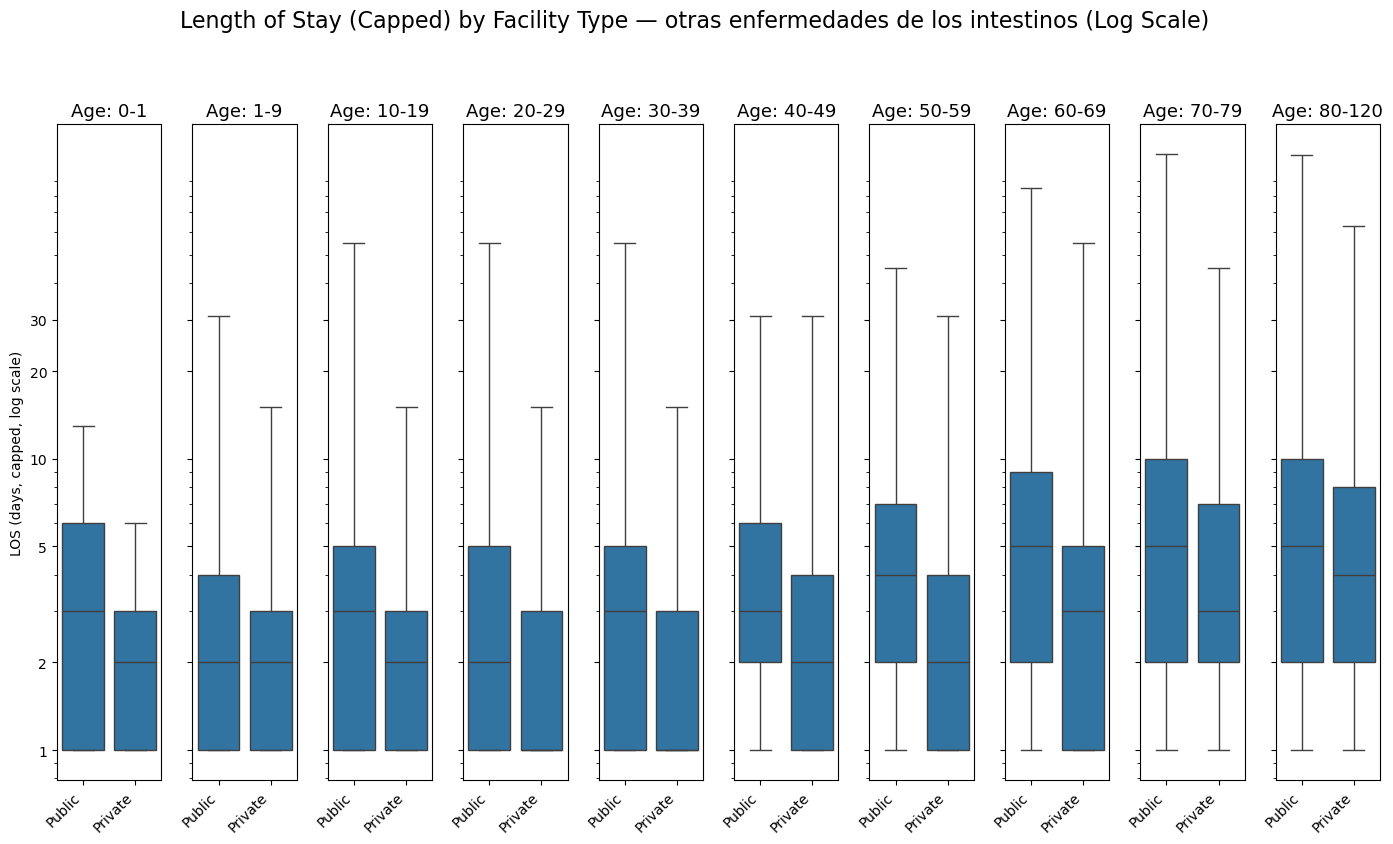

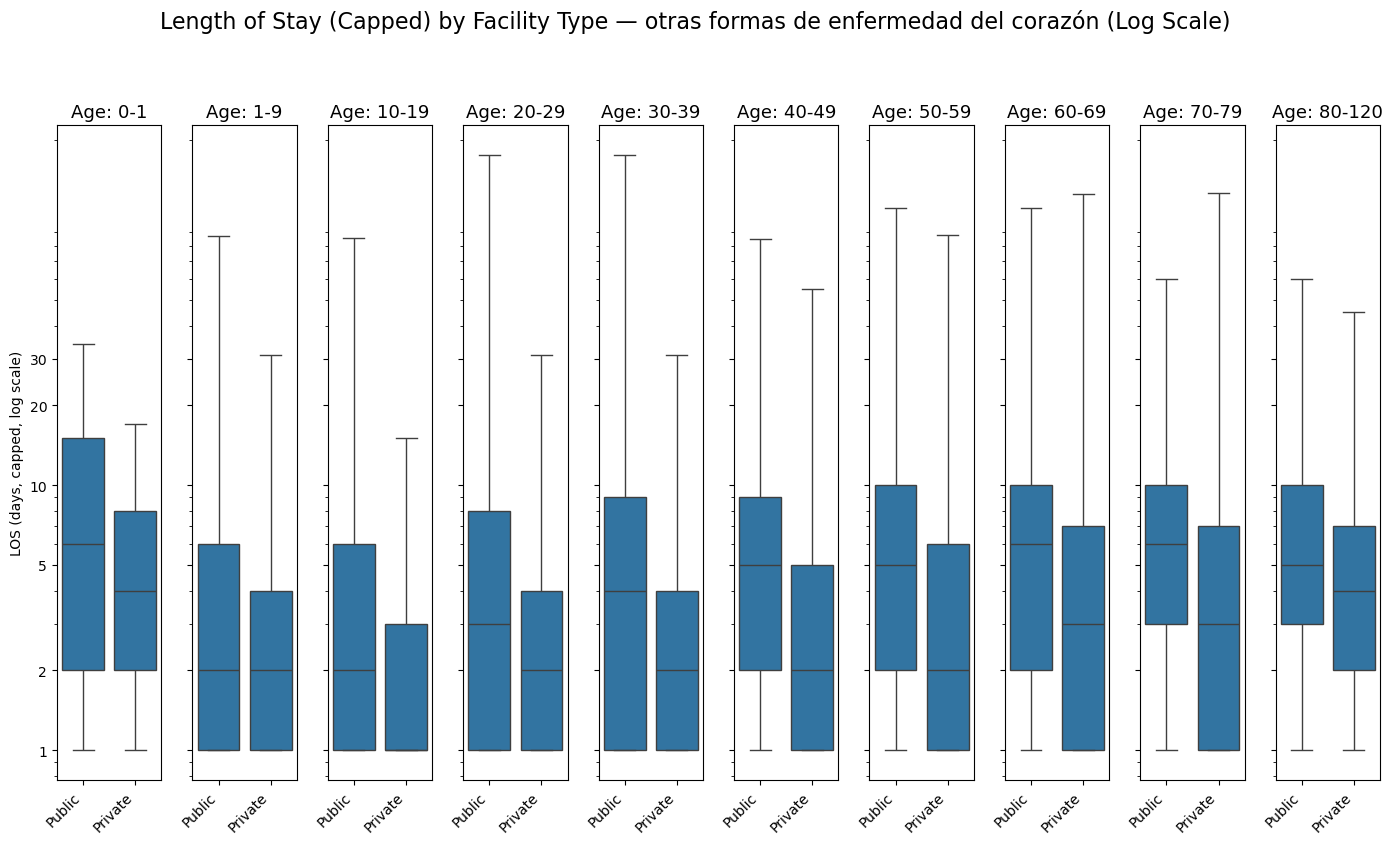

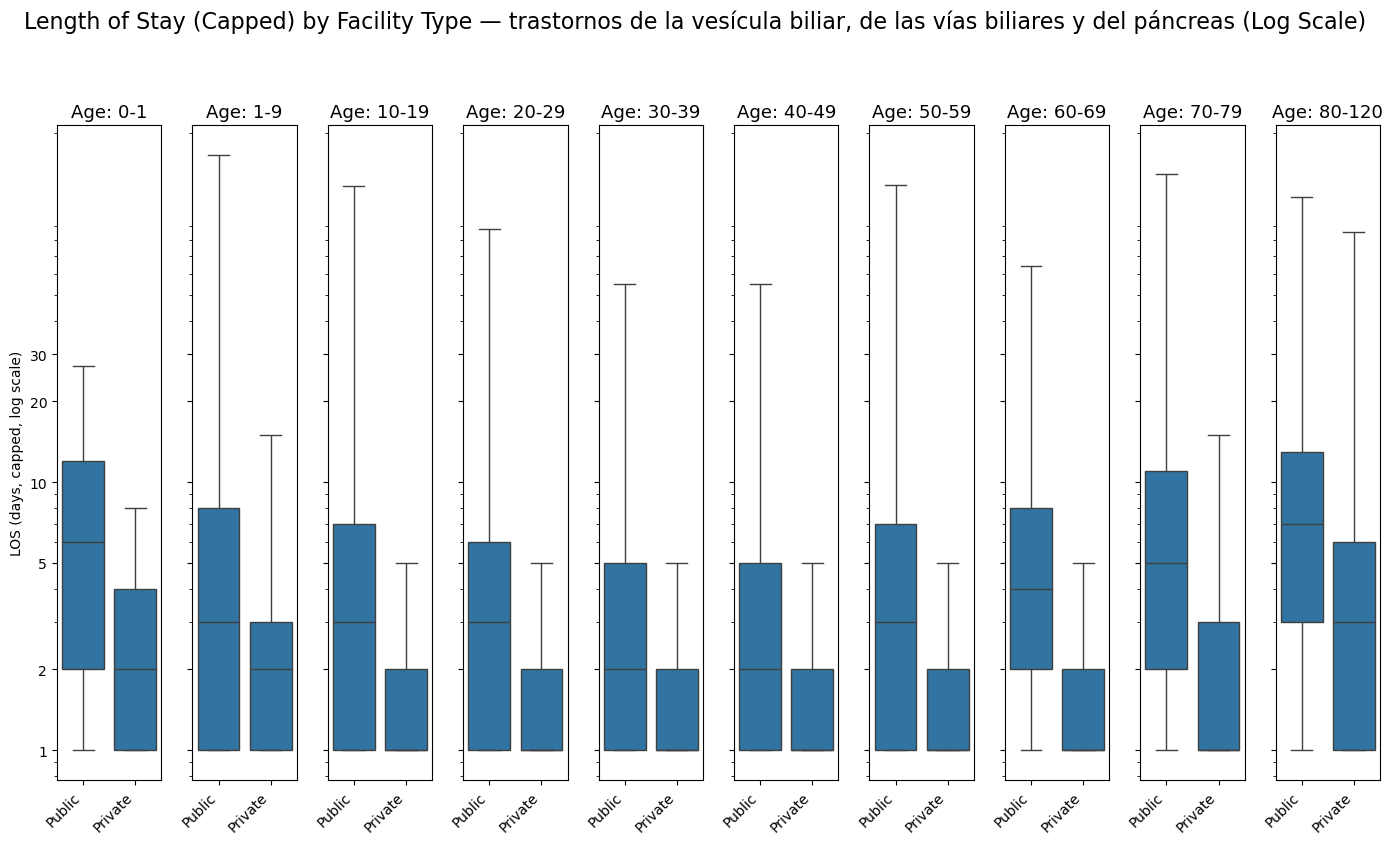

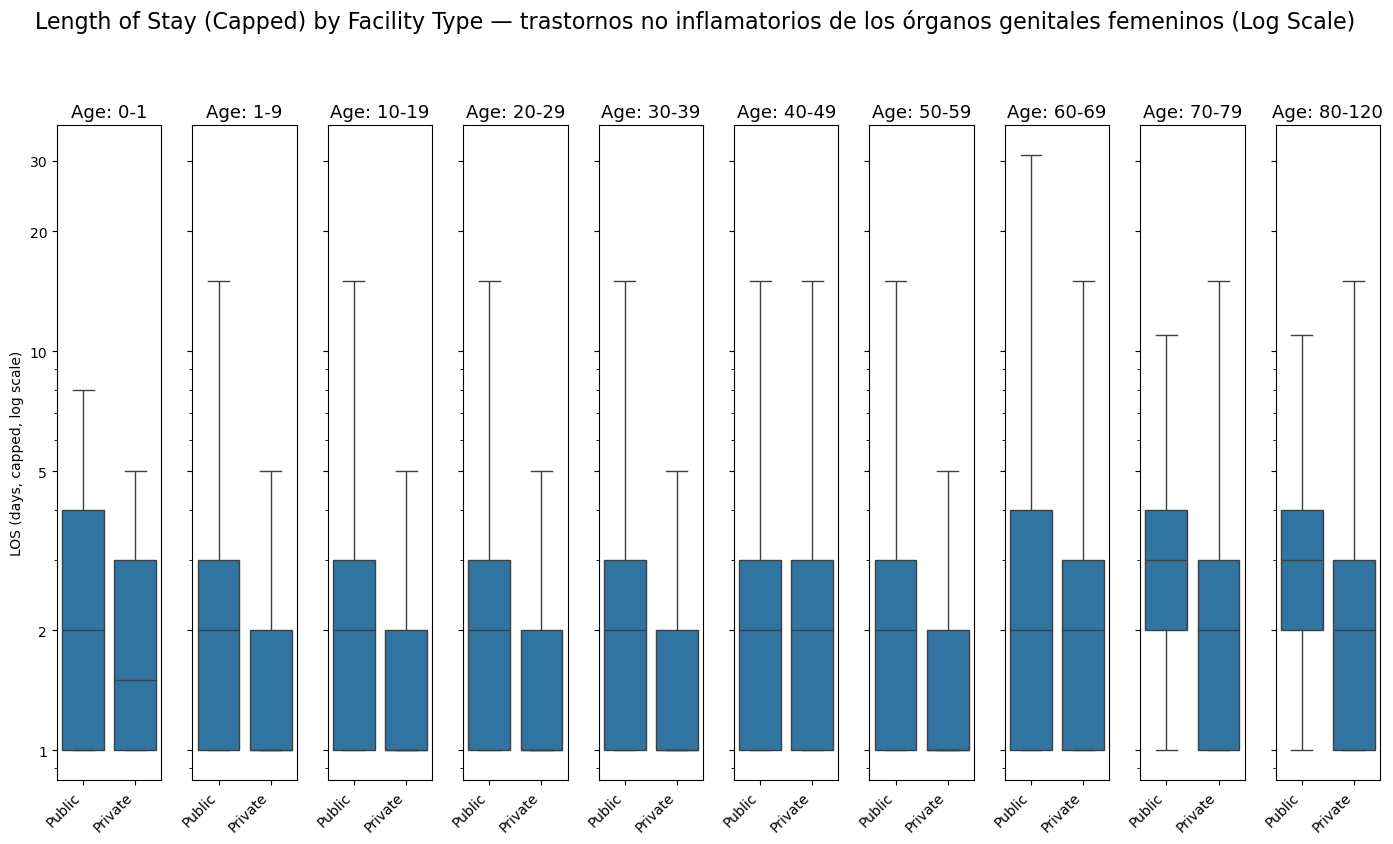

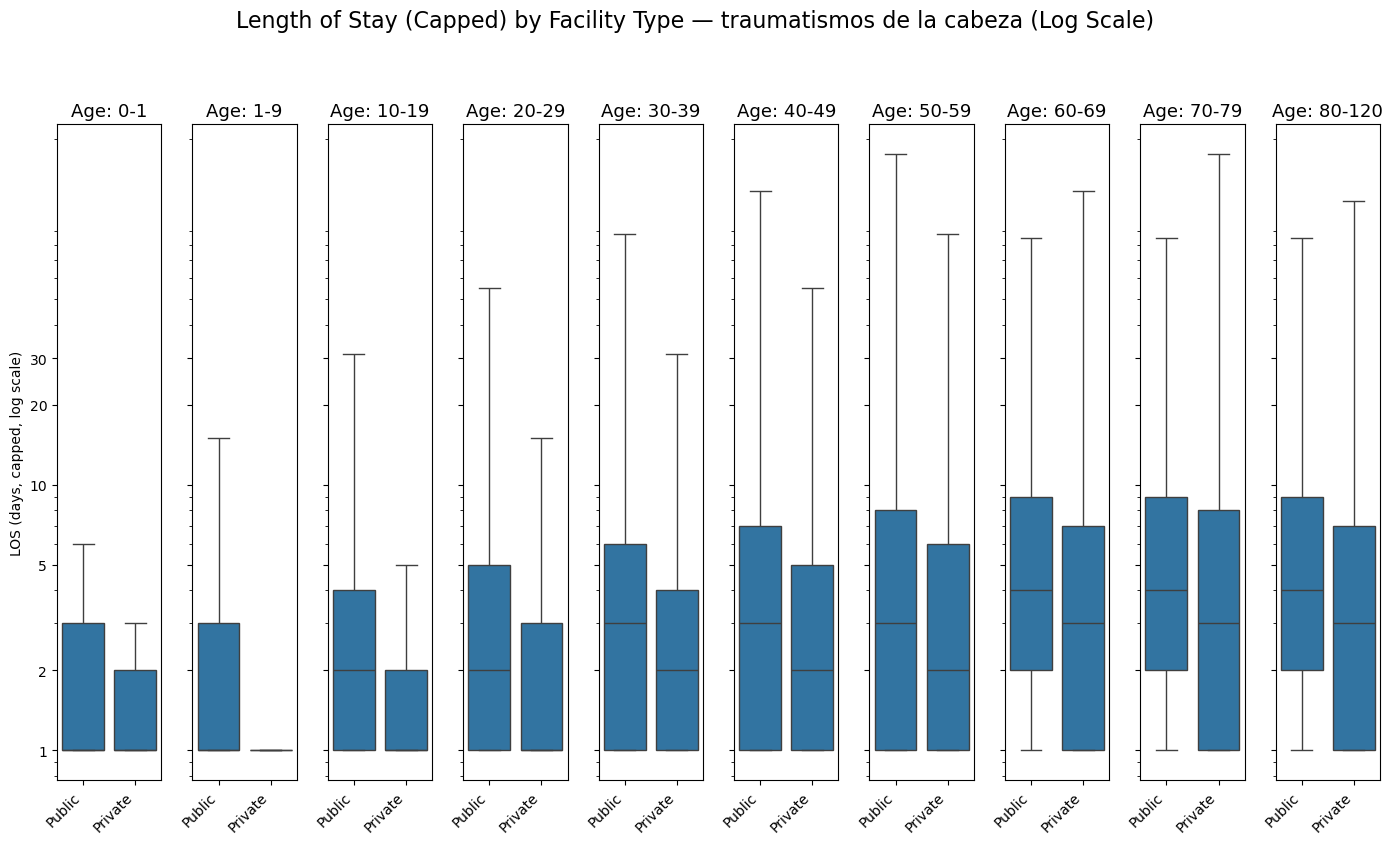

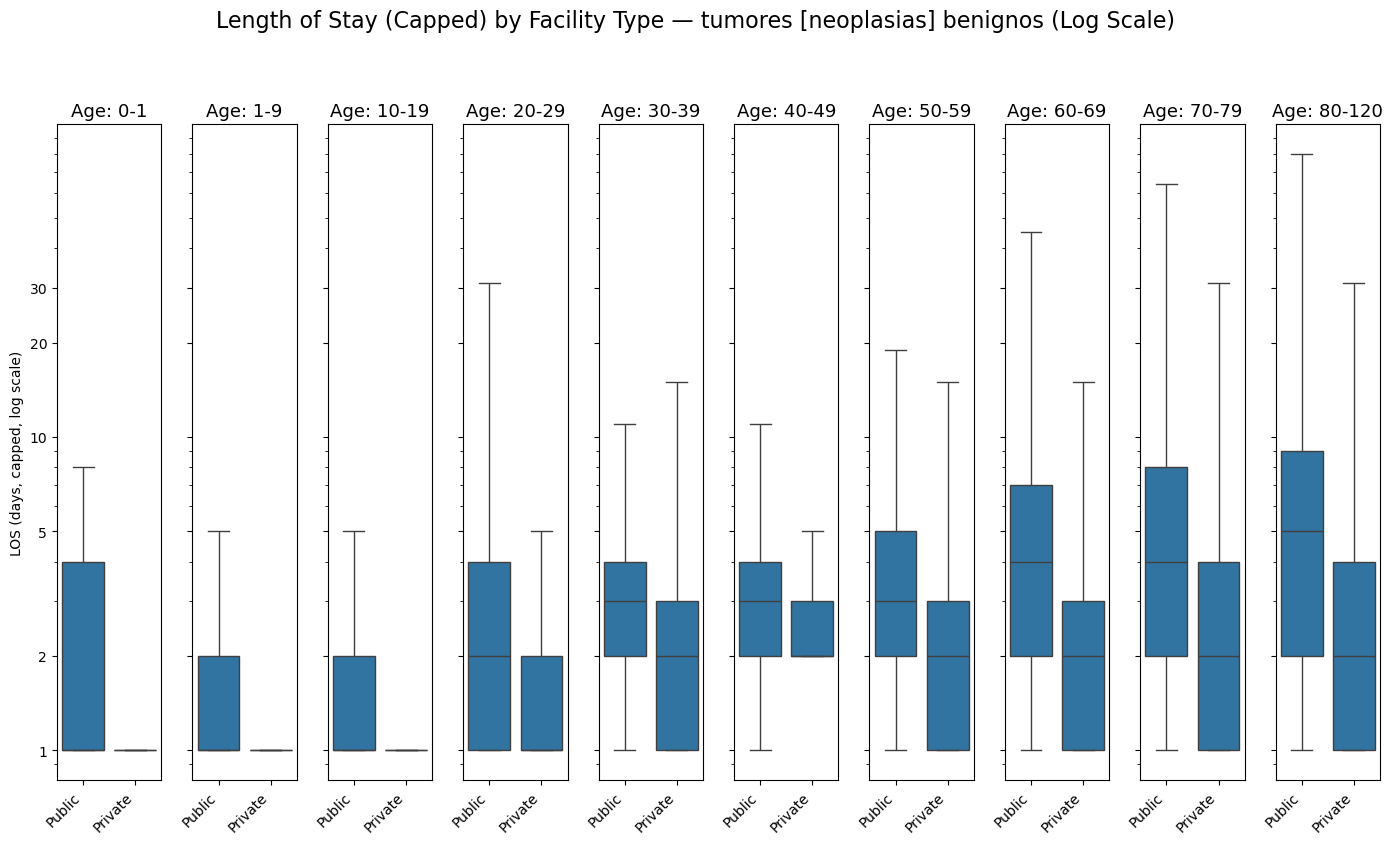

In [228]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

# ------------------------------------------------------
# CLEAN DATA (remove Unknown)
# ------------------------------------------------------
df_clean = top15_df[top15_df["healthcare facility type"] != "Unknown"].copy()

# Unique diagnosis groups
diagnoses = sorted(df_clean["Diagnosis_grouped"].unique())

# Ensure consistent age bin order
age_bins = sorted(df_clean["age"].unique())

# ------------------------------------------------------
# PLOTTING — One figure per diagnosis
# ------------------------------------------------------

for dx in diagnoses:
    
    df_dx = df_clean[df_clean["Diagnosis_grouped"] == dx]

    # Number of age subplots
    n_bins = len(age_bins)

    # Wide figure — SAME AS YOUR REFERENCE
    fig, axes = plt.subplots(
        1, n_bins,
        figsize=(14, 8),
        sharey=True
    )

    # Handle single subplot case
    if n_bins == 1:
        axes = [axes]

    fig.suptitle(f"Length of Stay (Capped) by Facility Type — {dx} (Log Scale)", fontsize=16, y=1.05)

    for ax, age in zip(axes, age_bins):

        df_age = df_dx[df_dx["age"] == age]

        sns.boxplot(
            data=df_age,
            x="healthcare facility type",
            y="LOS_capped",
            ax=ax,
            showfliers=False,
            order=["Public", "Private"]
        )

        # Log scale for skewed LOS
        ax.set_yscale("log")

        # SAME tick normalization as your example
        log_ticks = [1, 2, 5, 10, 20, 30]
        ax.set_yticks(log_ticks)
        ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda v, pos: f"{int(v)}"))

        ax.set_title(f"Age: {age}", fontsize=13)
        ax.set_xlabel("")

        # Left-most subplot shows y-axis label
        if ax is axes[0]:
            ax.set_ylabel("LOS (days, capped, log scale)")
        else:
            ax.set_ylabel("")

        # SAFE tick rotation (no warnings)
        for label in ax.get_xticklabels():
            label.set_rotation(45)
            label.set_ha("right")

    plt.tight_layout()
    plt.show()


# 7. VISUAL 3 — Heatmap of LOS Differences

C:\Users\mirko\AppData\Local\Temp\ipykernel_19400\59414727.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_clean.groupby(["Diagnosis_grouped", "age", "healthcare facility type"])["LOS_capped"]


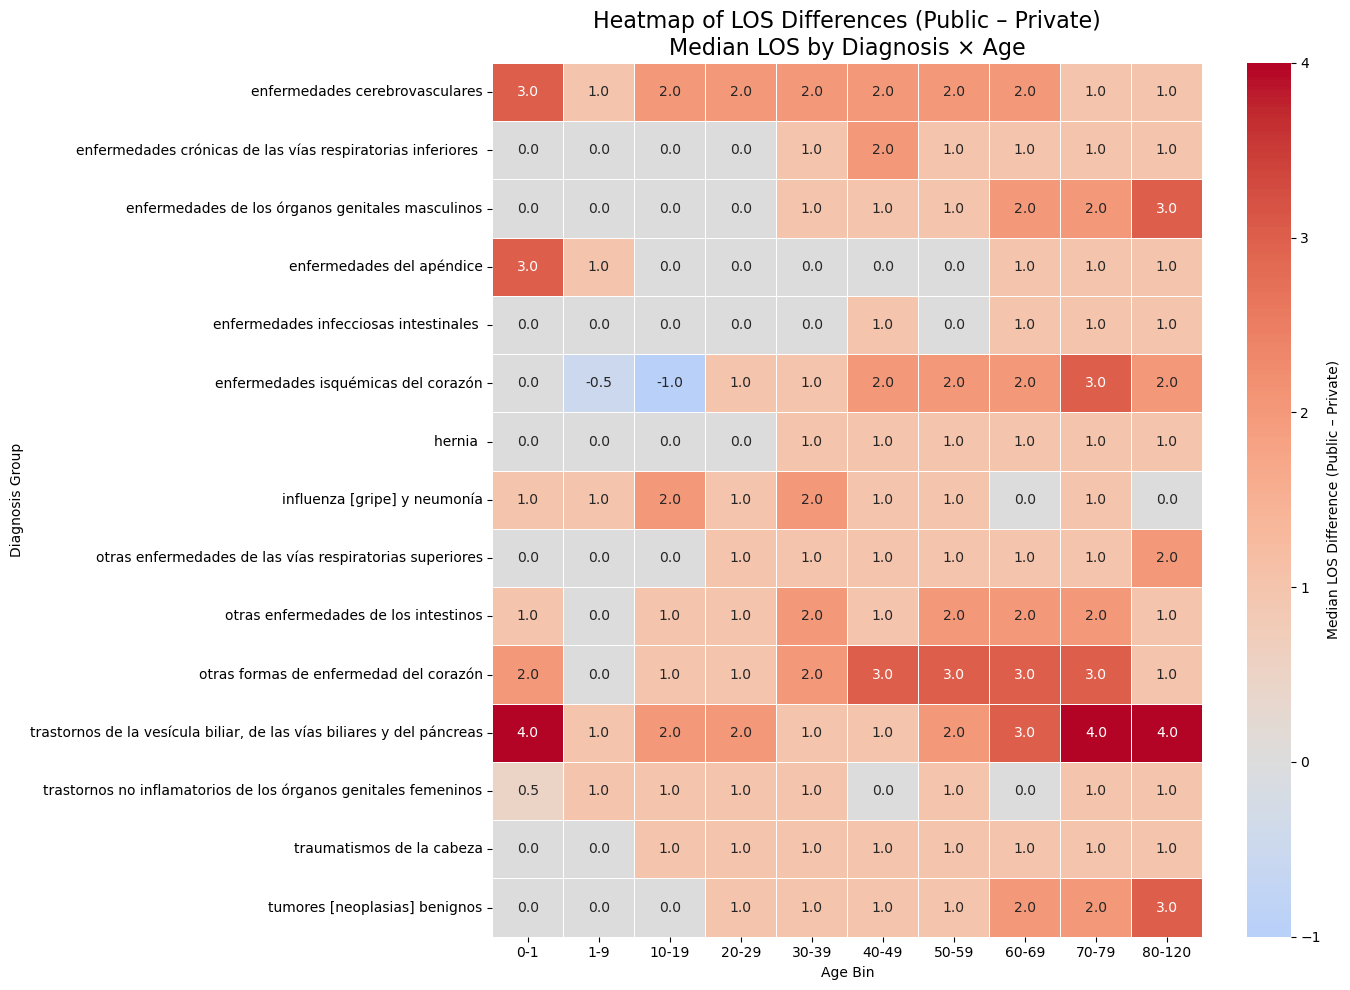

In [231]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# -------------------------------------------------------------
# 1. Use only clean data (remove Unknown)
# -------------------------------------------------------------
df_clean = top15_df[top15_df["healthcare facility type"] != "Unknown"].copy()

# Ensure consistent ordering
diagnoses = sorted(df_clean["Diagnosis_grouped"].unique())
age_bins = sorted(df_clean["age"].unique())

# -------------------------------------------------------------
# 2. Compute median LOS per Diagnosis × Age × Facility
# -------------------------------------------------------------
grouped = (
    df_clean.groupby(["Diagnosis_grouped", "age", "healthcare facility type"])["LOS_capped"]
    .median()
    .unstack("healthcare facility type")
)

# -------------------------------------------------------------
# 3. Compute LOS Difference (Public − Private)
# -------------------------------------------------------------
grouped["Difference"] = grouped["Public"] - grouped["Private"]

# Pivot to heatmap shape:
# Rows = Diagnosis / Columns = Age
heatmap_df = grouped["Difference"].unstack("age").reindex(index=diagnoses, columns=age_bins)

# -------------------------------------------------------------
# 4. Plot the heatmap
# -------------------------------------------------------------
plt.figure(figsize=(14, 10))

sns.heatmap(
    heatmap_df,
    cmap="coolwarm",
    annot=True,
    fmt=".1f",
    center=0,
    linewidths=.5,
    cbar_kws={"label": "Median LOS Difference (Public – Private)"}
)

plt.title("Heatmap of LOS Differences (Public – Private)\nMedian LOS by Diagnosis × Age", fontsize=16)
plt.xlabel("Age Bin")
plt.ylabel("Diagnosis Group")
plt.tight_layout()
plt.show()


# 8. TABLE 4 — Efficiency Flags (Where Public ≠ Private)

In [328]:
# --- PARAMETERS ---
LOS_THRESHOLD = 1.0  # absolute median LOS difference threshold

# --- EMPTY LIST TO COLLECT ROWS ---
rows = []

# --- LOOP OVER DIAGNOSIS GROUPS ---
for dx in top15_df["Diagnosis_grouped"].unique():

    df_dx = top15_df[top15_df["Diagnosis_grouped"] == dx]

    # Compute medians
    pub_median = df_dx[df_dx["healthcare facility type"] == "Public"]["LOS_capped"].median()
    priv_median = df_dx[df_dx["healthcare facility type"] == "Private"]["LOS_capped"].median()

    # Absolute difference
    diff = abs(pub_median - priv_median)

    # --- Assign category based on your sets ---
    if dx in dx_not_comparable:
        flag = "Exclude – case-mix too different"

    elif dx in dx_caution:
        if diff >= LOS_THRESHOLD:
            flag = "Possible efficiency gap – interpret with caution"
        else:
            flag = "No relevant LOS difference (caution category)"

    elif dx in dx_comparable:
        if diff >= LOS_THRESHOLD:
            if pub_median > priv_median:
                flag = "Public slower (efficiency gap)"
            else:
                flag = "Private slower (efficiency gap)"
        else:
            flag = "No meaningful LOS difference"

    else:
        # fallback: should not happen
        flag = "Uncategorized"

    # Store row
    rows.append({
        "Diagnosis_group": dx,
        "Median_LOS_Public": pub_median,
        "Median_LOS_Private": priv_median,
        "Abs_Diff_Days": diff,
        "Category": (
            "Comparable" if dx in dx_comparable else
            "Cautious" if dx in dx_caution else
            "Not Comparable"
        ),
        "Efficiency_Flag": flag
    })

# --- FINAL TABLE ---
table4 = pd.DataFrame(rows).sort_values("Diagnosis_group")
table4


Diagnosis_group  Median_LOS_Public  \
5                      enfermedades cerebrovasculares                7.0   
7   enfermedades crónicas de las vías respiratoria...                5.0   
8    enfermedades de los órganos genitales masculinos                3.0   
3                           enfermedades del apéndice                2.0   
4              enfermedades infecciosas intestinales                 2.0   
6                 enfermedades isquémicas del corazón                5.0   
9                                             hernia                 2.0   
0                        influenza [gripe] y neumonía                5.0   
12  otras enfermedades de las vías respiratorias s...                1.0   
10               otras enfermedades de los intestinos                4.0   
11             otras formas de enfermedad del corazón                5.0   
2   trastornos de la vesícula biliar, de las vías ...                3.0   
14  trastornos no inflamatorios de los órganos gen...                2.0   
1                           traumatismos de la cabeza                2.0   
13                      tumores [neoplasias] benignos                3.0   

    Median_LOS_Private  Abs_Diff_Days        Category  \
5                  5.0            2.0      Comparable   
7                  4.0            1.0      Comparable   
8                  1.0            2.0  Not Comparable   
3                  2.0            0.0      Comparable   
4                  2.0            0.0      Comparable   
6                  3.0            2.0      Comparable   
9                  1.0            1.0      Comparable   
0                  4.0            1.0        Cautious   
12                 1.0            0.0  Not Comparable   
10                 2.0            2.0      Comparable   
11                 3.0            2.0      Comparable   
2                  1.0            2.0      Comparable   
14                 1.0            1.0      Comparable   
1                  1.0            1.0      Comparable   
13                 2.0            1.0      Comparable   

                                     Efficiency_Flag  
5                     Public slower (efficiency gap)  
7                     Public slower (efficiency gap)  
8                   Exclude – case-mix too different  
3                       No meaningful LOS difference  
4                       No meaningful LOS difference  
6                     Public slower (efficiency gap)  
9                     Public slower (efficiency gap)  
0   Possible efficiency gap – interpret with caution  
12                  Exclude – case-mix too different  
10                    Public slower (efficiency gap)  
11                    Public slower (efficiency gap)  
2                     Public slower (efficiency gap)  
14                    Public slower (efficiency gap)  
1                     Public slower (efficiency gap)  
13                    Public slower (efficiency gap)

In [340]:
# -----------------------------
# PARAMETERS
# -----------------------------
MILD = 0.5      # ≥ 0.5 days
MODERATE = 1.0  # ≥ 1.0 days
STRONG = 1.5    # ≥ 1.5 days

# -----------------------------
# FUNCTION: base severity from LOS thresholds
# -----------------------------
def base_severity(diff):
    if diff >= STRONG:
        return "strong"
    elif diff >= MODERATE:
        return "moderate"
    elif diff >= MILD:
        return "mild"
    else:
        return "none"

# -----------------------------
# FUNCTION: severity adjustment using IQR
# -----------------------------
def adjust_with_iqr(sev, diff, iqr):
    if iqr == 0 or pd.isna(iqr):
        return sev  # no adjustment possible

    # thresholds based on pooled IQR
    low = 0.33 * iqr
    mid = 0.50 * iqr

    severity_levels = ["none", "mild", "moderate", "strong", "very strong"]

    # Helper to move severity level
    def shift(sev, steps):
        idx = severity_levels.index(sev)
        idx = max(0, min(idx + steps, len(severity_levels) - 1))
        return severity_levels[idx]

    # Adjustment rules
    if diff < low:
        return shift(sev, -1)      # downgrade
    elif low <= diff < mid:
        return sev                 # no change
    elif mid <= diff < iqr:
        return shift(sev, +1)      # upgrade
    else:
        return shift(sev, +2)      # strong upgrade

# -----------------------------
# BUILD TABLE 4
# -----------------------------
rows = []

for dx in sorted(top15_df["Diagnosis_grouped"].unique()):

    df_dx = top15_df[top15_df["Diagnosis_grouped"] == dx]

    # medians
    pub = df_dx[df_dx["healthcare facility type"] == "Public"]["LOS_capped"]
    priv = df_dx[df_dx["healthcare facility type"] == "Private"]["LOS_capped"]

    pub_median = pub.median()
    priv_median = priv.median()
    diff = abs(pub_median - priv_median)

    # IQRs
    pub_iqr = pub.quantile(0.75) - pub.quantile(0.25)
    priv_iqr = priv.quantile(0.75) - priv.quantile(0.25)
    pooled_iqr = (pub_iqr + priv_iqr) / 2

    # base severity
    sev = base_severity(diff)

    # adjust based on IQR
    sev_adj = adjust_with_iqr(sev, diff, pooled_iqr)

    # assign direction
    if sev_adj == "none":
        direction = "No meaningful LOS difference"
    else:
        if pub_median > priv_median:
            direction = f"Public slower ({sev_adj} gap)"
        else:
            direction = f"Private slower ({sev_adj} gap)"

    # combine with case-mix category
    if dx in dx_not_comparable:
        final_flag = "Exclude – case-mix too different"
    elif dx in dx_caution:
        final_flag = direction + " – interpret with caution"
    else:
        final_flag = direction

    # store row
    rows.append({
        "Diagnosis_group": dx,
        "Median_LOS_Public": pub_median,
        "Median_LOS_Private": priv_median,
        "IQR_Public": pub_iqr,
        "IQR_Private": priv_iqr,
        "Pooled_IQR": pooled_iqr,
        "Abs_Diff": diff,
        "Category": (
            "Comparable" if dx in dx_comparable else
            "Caution" if dx in dx_caution else
            "Not comparable"
        ),
        "Severity": sev_adj,
        "Efficiency_Flag": final_flag
    })

table4 = pd.DataFrame(rows)



In [342]:
table4

Diagnosis_group  Median_LOS_Public  \
0                      enfermedades cerebrovasculares                7.0   
1   enfermedades crónicas de las vías respiratoria...                5.0   
2    enfermedades de los órganos genitales masculinos                3.0   
3                           enfermedades del apéndice                2.0   
4              enfermedades infecciosas intestinales                 2.0   
5                 enfermedades isquémicas del corazón                5.0   
6                                             hernia                 2.0   
7                        influenza [gripe] y neumonía                5.0   
8   otras enfermedades de las vías respiratorias s...                1.0   
9                otras enfermedades de los intestinos                4.0   
10             otras formas de enfermedad del corazón                5.0   
11  trastornos de la vesícula biliar, de las vías ...                3.0   
12  trastornos no inflamatorios de los órganos gen...                2.0   
13                          traumatismos de la cabeza                2.0   
14                      tumores [neoplasias] benignos                3.0   

    Median_LOS_Private  IQR_Public  IQR_Private  Pooled_IQR  Abs_Diff  \
0                  5.0        10.0          8.0         9.0       2.0   
1                  4.0         5.0          4.0         4.5       1.0   
2                  1.0         5.0          2.0         3.5       2.0   
3                  2.0         3.0          1.0         2.0       0.0   
4                  2.0         3.0          2.0         2.5       0.0   
5                  3.0         7.0          4.0         5.5       2.0   
6                  1.0         2.0          1.0         1.5       1.0   
7                  4.0         6.0          4.0         5.0       1.0   
8                  1.0         1.0          0.0         0.5       0.0   
9                  2.0         5.0          3.0         4.0       2.0   
10                 3.0         8.0          5.0         6.5       2.0   
11                 1.0         6.0          1.0         3.5       2.0   
12                 1.0         2.0          1.0         1.5       1.0   
13                 1.0         4.0          2.0         3.0       1.0   
14                 2.0         2.0          2.0         2.0       1.0   

          Category     Severity  \
0       Comparable     moderate   
1       Comparable         mild   
2   Not comparable  very strong   
3       Comparable         none   
4       Comparable         none   
5       Comparable       strong   
6       Comparable       strong   
7          Caution         mild   
8   Not comparable         none   
9       Comparable  very strong   
10      Comparable     moderate   
11      Comparable  very strong   
12      Comparable       strong   
13      Comparable     moderate   
14      Comparable       strong   

                                      Efficiency_Flag  
0                        Public slower (moderate gap)  
1                            Public slower (mild gap)  
2                    Exclude – case-mix too different  
3                        No meaningful LOS difference  
4                        No meaningful LOS difference  
5                          Public slower (strong gap)  
6                          Public slower (strong gap)  
7   Public slower (mild gap) – interpret with caution  
8                    Exclude – case-mix too different  
9                     Public slower (very strong gap)  
10                       Public slower (moderate gap)  
11                    Public slower (very strong gap)  
12                         Public slower (strong gap)  
13                       Public slower (moderate gap)  
14                         Public slower (strong gap)